## EDA - RISK ANALYSIS ON BANKING AND FINANCIAL SERVICES

## Importing Dataset: ##

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [2]:
app_data = pd.read_csv('application_data.csv')

In [3]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [4]:
col_des = pd.read_csv('columns_description.csv', encoding = 'latin1', skiprows = 1)

In [5]:
col_des.head()

1  application_data          SK_ID_CURR  \
0  2  application_data              TARGET   
1  5  application_data  NAME_CONTRACT_TYPE   
2  6  application_data         CODE_GENDER   
3  7  application_data        FLAG_OWN_CAR   
4  8  application_data     FLAG_OWN_REALTY   

                            ID of loan in our sample Unnamed: 4  
0  Target variable (1 - client with payment diffi...        NaN  
1        Identification if loan is cash or revolving        NaN  
2                               Gender of the client        NaN  
3                      Flag if the client owns a car        NaN  
4                Flag if client owns a house or flat        NaN

In [6]:
pre_app = pd.read_csv('previous_application.csv')

In [7]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

## Understanding the dataset:

In [8]:
print("app_data :",app_data.shape)
print("pre_app :",pre_app.shape)
print("cols_des :",col_des.shape)

app_data : (307511, 122)
pre_app : (1670214, 37)
cols_des : (159, 5)


In [9]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [10]:
col_des

1          application_data                    SK_ID_CURR  \
0      2          application_data                        TARGET   
1      5          application_data            NAME_CONTRACT_TYPE   
2      6          application_data                   CODE_GENDER   
3      7          application_data                  FLAG_OWN_CAR   
4      8          application_data               FLAG_OWN_REALTY   
5      9          application_data                  CNT_CHILDREN   
6     10          application_data              AMT_INCOME_TOTAL   
7     11          application_data                    AMT_CREDIT   
8     12          application_data                   AMT_ANNUITY   
9     13          application_data               AMT_GOODS_PRICE   
10    14          application_data               NAME_TYPE_SUITE   
11    15          application_data              NAME_INCOME_TYPE   
12    16          application_data           NAME_EDUCATION_TYPE   
13    17          application_data            NAME_FAMILY_STATUS   
14    18          application_data             NAME_HOUSING_TYPE   
15    19          application_data    REGION_POPULATION_RELATIVE   
16    20          application_data                    DAYS_BIRTH   
17    21          application_data                 DAYS_EMPLOYED   
18    22          application_data             DAYS_REGISTRATION   
19    23          application_data               DAYS_ID_PUBLISH   
20    24          application_data                   OWN_CAR_AGE   
21    25          application_data                    FLAG_MOBIL   
22    26          application_data                FLAG_EMP_PHONE   
23    27          application_data               FLAG_WORK_PHONE   
24    28          application_data              FLAG_CONT_MOBILE   
25    29          application_data                    FLAG_PHONE   
26    30          application_data                    FLAG_EMAIL   
27    31          application_data               OCCUPATION_TYPE   
28    32          application_data               CNT_FAM_MEMBERS   
29    33          application_data          REGION_RATING_CLIENT   
30    34          application_data   REGION_RATING_CLIENT_W_CITY   
31    35          application_data    WEEKDAY_APPR_PROCESS_START   
32    36          application_data       HOUR_APPR_PROCESS_START   
33    37          application_data    REG_REGION_NOT_LIVE_REGION   
34    38          application_data    REG_REGION_NOT_WORK_REGION   
35    39          application_data   LIVE_REGION_NOT_WORK_REGION   
36    40          application_data        REG_CITY_NOT_LIVE_CITY   
37    41          application_data        REG_CITY_NOT_WORK_CITY   
38    42          application_data       LIVE_CITY_NOT_WORK_CITY   
39    43          application_data             ORGANIZATION_TYPE   
40    44          application_data                  EXT_SOURCE_1   
41    45          application_data                  EXT_SOURCE_2   
42    46          application_data                  EXT_SOURCE_3   
43    47          application_data                APARTMENTS_AVG   
44    48          application_data              BASEMENTAREA_AVG   
45    49          application_data   YEARS_BEGINEXPLUATATION_AVG   
46    50          application_data               YEARS_BUILD_AVG   
47    51          application_data                COMMONAREA_AVG   
48    52          application_data                 ELEVATORS_AVG   
49    53          application_data                 ENTRANCES_AVG   
50    54          application_data                 FLOORSMAX_AVG   
51    55          application_data                 FLOORSMIN_AVG   
52    56          application_data                  LANDAREA_AVG   
53    57          application_data          LIVINGAPARTMENTS_AVG   
54    58          application_data                LIVINGAREA_AVG   
55    59          application_data       NONLIVINGAPARTMENTS_AVG   
56    60          application_data             NONLIVINGAREA_AVG   
57    61          application_data               APARTMENTS_MOD

In [11]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [12]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [13]:
display(pre_app.columns)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [14]:
display(app_data.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

## Missing values in Previous_application ##

In [15]:
pre_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## Percentage Missing values in Previous_application ##

In [16]:
100 * pre_app.isnull().mean()

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [17]:
missing_pre_app = (pre_app.isnull().mean()*100)

In [18]:
missing_pre_app

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [19]:
missing_pre_app = missing_pre_app.reset_index()

In [20]:
missing_pre_app.columns

Index(['index', 0], dtype='object')

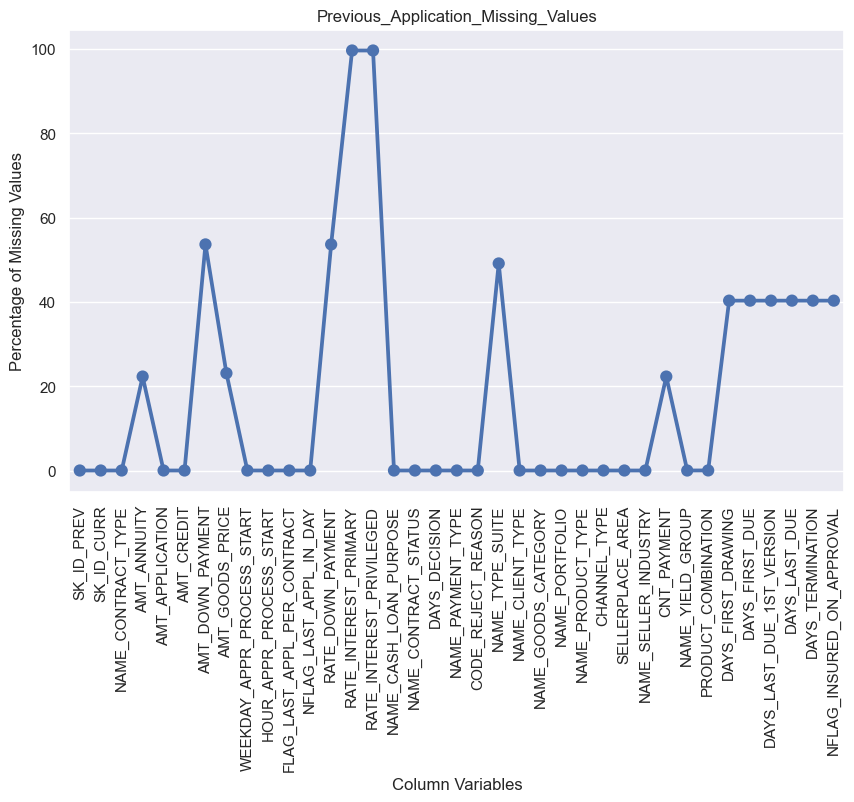

In [21]:
plt.figure(figsize = [10,6])

sns.set(style = "darkgrid")

sns.pointplot(x= 'index',y = 0, data = missing_pre_app)


plt.xticks(rotation = 90)

plt.title("Previous_Application_Missing_Values")
plt.ylabel("Percentage of Missing Values")

plt.xlabel("Column Variables")
plt.show()

**Dropping columns where percentage of missing values is above 50 % and which is considered as 'MISSING COMPLETELY AT RANDOM'**

MISSING COLUMN VALUES GREATER THAN 50%:

1. RATE_INTEREST_PRIMARY
2. RATE_INTEREST_PRIVILEGED
3. AMT_DOWN_PAYMENT
4. RATE_DOWN_PAYMENT

In [22]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [23]:
pre_app.shape

(1670214, 37)

In [24]:
pre_app = pre_app.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT'], axis =1 )


In [25]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

In [26]:
pre_app.shape

(1670214, 33)

In [27]:
missing_pre_app = pre_app.isnull().mean() * 100

In [28]:
missing_pre_app = missing_pre_app.reset_index()

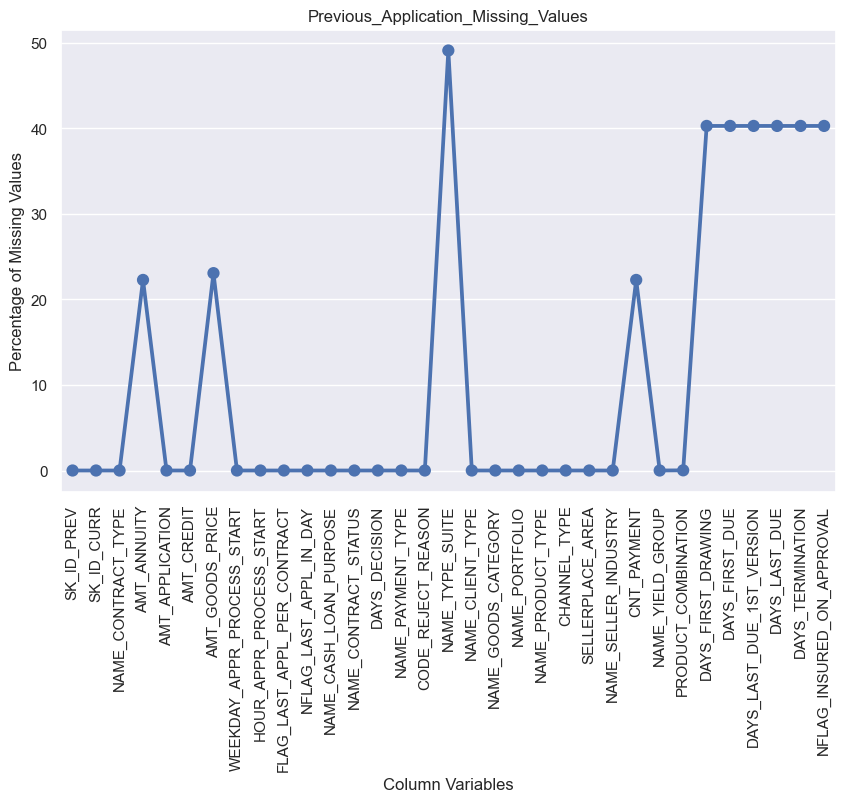

In [29]:
plt.figure(figsize = [10,6])

sns.set(style = "darkgrid")

sns.pointplot(x= 'index',y = 0, data = missing_pre_app)


plt.xticks(rotation = 90)

plt.title("Previous_Application_Missing_Values")
plt.ylabel("Percentage of Missing Values")

plt.xlabel("Column Variables")
plt.show()

## Handling missing values:

In [30]:
missing_pre_app[missing_pre_app[0]>0]

index          0
3                 AMT_ANNUITY  22.286665
5                  AMT_CREDIT   0.000060
6             AMT_GOODS_PRICE  23.081773
16            NAME_TYPE_SUITE  49.119754
24                CNT_PAYMENT  22.286366
26        PRODUCT_COMBINATION   0.020716
27         DAYS_FIRST_DRAWING  40.298129
28             DAYS_FIRST_DUE  40.298129
29  DAYS_LAST_DUE_1ST_VERSION  40.298129
30              DAYS_LAST_DUE  40.298129
31           DAYS_TERMINATION  40.298129
32  NFLAG_INSURED_ON_APPROVAL  40.298129

In [31]:
pre_app.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [32]:
pre_app['AMT_ANNUITY'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1670214 entries, 0 to 1670213
Series name: AMT_ANNUITY
Non-Null Count    Dtype  
--------------    -----  
1297979 non-null  float64
dtypes: float64(1)
memory usage: 12.7 MB


In [33]:
pre_app['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [34]:
mean_value1 = pre_app['AMT_ANNUITY'].mean()

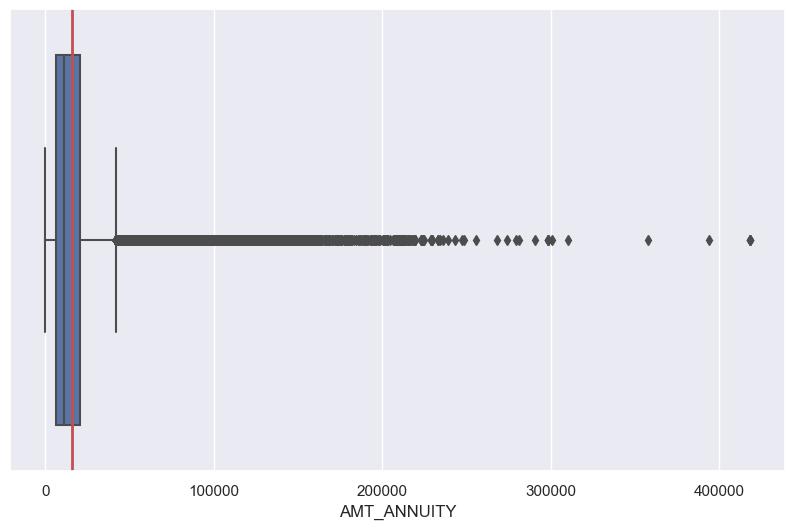

In [35]:
plt.figure(figsize = [10,6])

sns.boxplot(x = pre_app['AMT_ANNUITY'])

plt.axvline(x = mean_value1, color = 'r', linewidth = 2, label = 'mean')

plt.show()

In [36]:
pre_app['AMT_ANNUITY'].mean()

15955.120659452119

**AMT_ANNUITY**

**A lot of outliers are present and distribution of values are close to mean, 
so imputing mean values to the missing 'AMT_ANNUITY' column**



    mean = 15955.120659452119

In [37]:
pre_app['AMT_ANNUITY'].fillna(pre_app['AMT_ANNUITY'].mean(), inplace = True)

In [38]:
pre_app['AMT_ANNUITY'].isnull().sum()

0

In [39]:
pre_app['AMT_CREDIT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1670214 entries, 0 to 1670213
Series name: AMT_CREDIT
Non-Null Count    Dtype  
--------------    -----  
1670213 non-null  float64
dtypes: float64(1)
memory usage: 12.7 MB


In [40]:
pre_app['AMT_CREDIT'].head()

0     17145.0
1    679671.0
2    136444.5
3    470790.0
4    404055.0
Name: AMT_CREDIT, dtype: float64

In [41]:
pre_app['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [42]:
mean_value2 = pre_app['AMT_CREDIT'].mean()

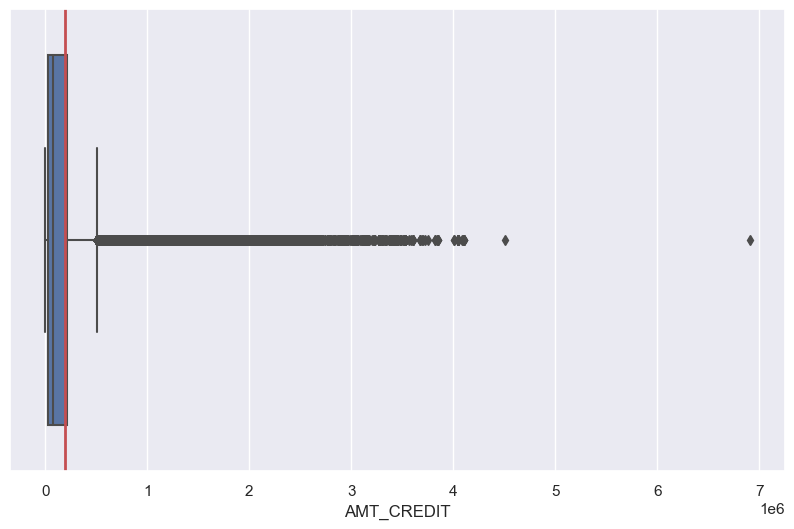

In [43]:
plt.figure(figsize = [10,6])

sns.boxplot(x = pre_app['AMT_CREDIT'] )

plt.axvline(x = mean_value2, color = 'r', linewidth = 2, label = 'Mean')

plt.show()

In [44]:
pre_app['AMT_CREDIT'].isnull().sum()

1

**AMT_CREDIT**

AMT_CREDIT column has only one missing values, we can impute use median value.

In [45]:
pre_app['AMT_CREDIT'].median()

80541.0

In [46]:
pre_app['AMT_CREDIT'].fillna(pre_app['AMT_CREDIT'].median(), inplace = True)

In [47]:
pre_app['AMT_CREDIT'].isnull().sum()

0

In [48]:
pre_app['AMT_GOODS_PRICE'].isnull().sum()

385515

In [49]:
pre_app['AMT_GOODS_PRICE'].head()

0     17145.0
1    607500.0
2    112500.0
3    450000.0
4    337500.0
Name: AMT_GOODS_PRICE, dtype: float64

In [50]:
pre_app['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

**AMT_GOODS_PRICE**

Imputing median values to missing values, as median is close to distribution of values.

In [51]:
pre_app['AMT_GOODS_PRICE'].fillna(pre_app['AMT_GOODS_PRICE'].median(), inplace = True)


In [52]:
pre_app['AMT_GOODS_PRICE'].isnull().sum()

0

In [53]:
pre_app['NAME_TYPE_SUITE'].isnull().sum()

820405

In [54]:
pre_app['NAME_TYPE_SUITE'].head()

0                NaN
1      Unaccompanied
2    Spouse, partner
3                NaN
4                NaN
Name: NAME_TYPE_SUITE, dtype: object

In [55]:
pre_app['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: count, dtype: int64

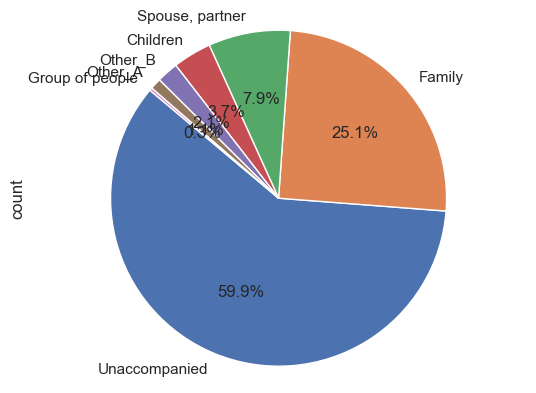

In [56]:
pre_app['NAME_TYPE_SUITE'].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 140)

plt.axis('equal')

plt.show()

**NAME_TYPE_SUITE**


we can impute most repeated value i.e mode to the missing values.

In [57]:
pre_app['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [58]:
pre_app['NAME_TYPE_SUITE'].fillna(pre_app['NAME_TYPE_SUITE'].mode()[0], inplace = True )

In [59]:
pre_app['NAME_TYPE_SUITE'].isnull().sum()

0

In [60]:
pre_app['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      1329375
Family              213263
Spouse, partner      67069
Children             31566
Other_B              17624
Other_A               9077
Group of people       2240
Name: count, dtype: int64

In [61]:
pre_app['CNT_PAYMENT'].isnull().sum()

372230

In [62]:
pre_app['CNT_PAYMENT'].head()

0    12.0
1    36.0
2    12.0
3    12.0
4    24.0
Name: CNT_PAYMENT, dtype: float64

In [63]:
pre_app['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

**CNT_PAYMENT**

We can impute median value to missing values in 'CNT_PAYMENT'

In [64]:
pre_app['CNT_PAYMENT'].median()

12.0

In [65]:
pre_app['CNT_PAYMENT'].fillna(pre_app['CNT_PAYMENT'].median(), inplace = True)

In [66]:
pre_app['CNT_PAYMENT'].isnull().sum()

0

In [67]:
pre_app['PRODUCT_COMBINATION'].isnull().sum()

346

In [68]:
pre_app['PRODUCT_COMBINATION'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1670214 entries, 0 to 1670213
Series name: PRODUCT_COMBINATION
Non-Null Count    Dtype 
--------------    ----- 
1669868 non-null  object
dtypes: object(1)
memory usage: 12.7+ MB


In [69]:
pre_app['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [70]:
pre_app['PRODUCT_COMBINATION'].mode()[0]

'Cash'

**PRODUCT_COMBINATION**


we can impute most repeated value i.e mode to the missing values('Cash').

In [71]:
pre_app['PRODUCT_COMBINATION'].fillna(pre_app['PRODUCT_COMBINATION'].mode()[0], inplace = True)

In [72]:
pre_app['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              286336
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [73]:
pre_app['DAYS_FIRST_DRAWING'].head()

0    365243.0
1    365243.0
2    365243.0
3    365243.0
4         NaN
Name: DAYS_FIRST_DRAWING, dtype: float64

In [74]:
pre_app['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

**DAYS_FIRST_DRAWING**

Imputing median values to missing values, as median is close to distribution of values.

In [75]:
pre_app['DAYS_FIRST_DRAWING'].median()

365243.0

In [76]:
pre_app['DAYS_FIRST_DRAWING'].fillna(pre_app['DAYS_FIRST_DRAWING'].median(), inplace = True)

In [77]:
pre_app['DAYS_FIRST_DRAWING'].isnull().sum()

0

In [78]:
pre_app['DAYS_FIRST_DUE'].isnull().sum()

673065

In [79]:
pre_app['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

**DAYS_FIRST_DUE**

Imputing median values to missing values, as median is close to distribution of values.

In [80]:
pre_app['DAYS_FIRST_DUE'].median()

-831.0

In [81]:
pre_app['DAYS_FIRST_DUE'].fillna(pre_app['DAYS_FIRST_DUE'].median(), inplace = True)

In [82]:
pre_app['DAYS_FIRST_DUE'].isnull().sum()

0

In [83]:
pre_app['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()

673065

In [84]:
pre_app['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

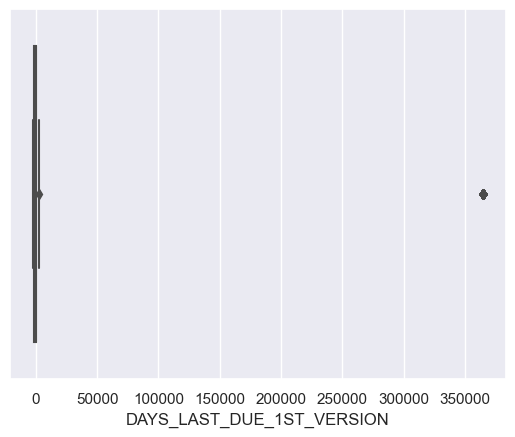

In [85]:
sns.boxplot(x = pre_app['DAYS_LAST_DUE_1ST_VERSION'] )
plt.show()

**DAYS_LAST_DUE_1ST_VERSION**

Imputing median values to missing values, as median is close to distribution of values.

In [86]:
pre_app['DAYS_LAST_DUE_1ST_VERSION'].median()

-361.0

In [87]:
pre_app['DAYS_LAST_DUE_1ST_VERSION'].fillna(pre_app['DAYS_LAST_DUE_1ST_VERSION'].median(), inplace = True)

In [88]:
pre_app['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()

0

In [89]:
pre_app['DAYS_LAST_DUE'].isnull().sum()

673065

In [90]:
pre_app['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

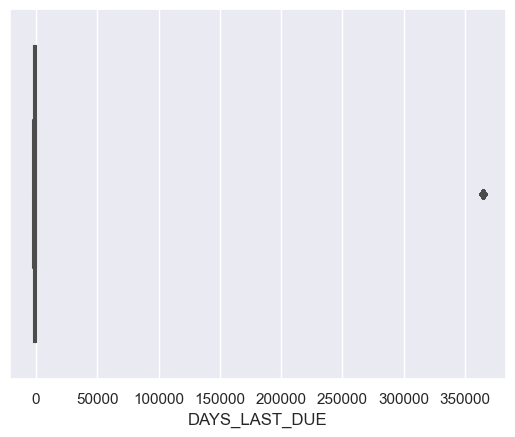

In [91]:
sns.boxplot(x = pre_app['DAYS_LAST_DUE'] )
plt.show()

In [92]:
pre_app['DAYS_LAST_DUE'].median()

-537.0

**DAYS_LAST_DUE**

Imputing median values to missing values, as median is close to distribution of values.

In [93]:
pre_app['DAYS_LAST_DUE'].fillna(pre_app['DAYS_LAST_DUE'].median(), inplace = True)

In [94]:
pre_app['DAYS_LAST_DUE'].isnull().sum()

0

In [95]:
pre_app['DAYS_TERMINATION'].isnull().sum()

673065

In [96]:
pre_app['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

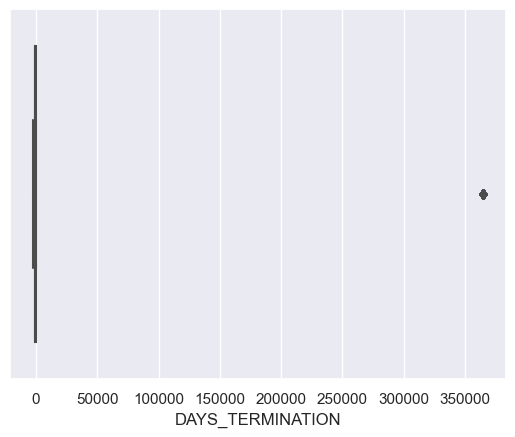

In [97]:
sns.boxplot(x = pre_app['DAYS_TERMINATION'] )
plt.show()

**DAYS_TERMINATION**

Imputing median values to missing values, as median is close to distribution of values.

In [98]:
pre_app['DAYS_TERMINATION'].median()

-499.0

In [99]:
pre_app['DAYS_TERMINATION'].fillna(pre_app['DAYS_TERMINATION'].median(), inplace = True)

In [100]:
pre_app['DAYS_TERMINATION'].isnull().sum()

0

In [101]:
pre_app['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

673065

In [102]:
pre_app['NFLAG_INSURED_ON_APPROVAL'].value_counts()

NFLAG_INSURED_ON_APPROVAL
0.0    665527
1.0    331622
Name: count, dtype: int64

In [103]:
pre_app['NFLAG_INSURED_ON_APPROVAL'].value_counts(normalize = True)

NFLAG_INSURED_ON_APPROVAL
0.0    0.66743
1.0    0.33257
Name: proportion, dtype: float64

In [104]:
pre_app['NFLAG_INSURED_ON_APPROVAL'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1670214 entries, 0 to 1670213
Series name: NFLAG_INSURED_ON_APPROVAL
Non-Null Count   Dtype  
--------------   -----  
997149 non-null  float64
dtypes: float64(1)
memory usage: 12.7 MB


In [105]:
pre_app['NFLAG_INSURED_ON_APPROVAL'].mode()[0]

0.0

**NFLAG_INSURED_ON_APPROVAL**


we can impute most repeated value i.e mode to the missing values('0').

In [106]:
pre_app['NFLAG_INSURED_ON_APPROVAL'].fillna(pre_app['NFLAG_INSURED_ON_APPROVAL'].mode()[0], inplace = True)

In [107]:
pre_app['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

0

In [108]:
pre_app.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [109]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP    Unaccompanied   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP    Unaccompanied   
4           -781  Cash through the bank                 HC    Unaccompanied   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4          -831.0                     -361.0         -537.0            -499.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

**Converting XAP & XNA to NaN**

In [483]:
my_list = []
for item in pre_app.columns:
    if pre_app[item].isin(["XAP","XNA"]).sum()>0:
        my_list.append(item)

for i in my_list:
    pre_app[i] = pre_app[i].replace(["XAP","XNA"], np.NaN)

In [484]:
pre_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    NaN             Approved   
1                       1                    NaN             Approved   
2                       1                    NaN             Approved   
3                       1                    NaN             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                NaN    Unaccompanied   
1           -164                    NaN                NaN    Unaccompanied   
2           -301  Cash through the bank                NaN  Spouse, partner   
3           -512  Cash through the bank                NaN    Unaccompanied   
4           -781  Cash through the bank                 HC    Unaccompanied   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               NaN   
1         Repeater                 NaN           Cash            x-sell   
2         Repeater                 NaN           Cash            x-sell   
3         Repeater                 NaN           Cash            x-sell   
4         Repeater                 NaN           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  NaN   
2  Credit and cash offices                -1                  NaN   
3  Credit and cash offices                -1                  NaN   
4  Credit and cash offices                -1                  NaN   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high            365243.0   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4          -831.0                     -361.0         -537.0            -499.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

**Converting DAYS into absolute values**

In [486]:
my_list = []
for item in pre_app.columns:
    if item[:4]=="DAYS":
        my_list.append(item)

for i in my_list:
    pre_app[i] = pre_app[i].abs()

In [487]:
pre_app.isnull().mean()

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000207
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.958308
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.375631
CODE_REJECT_REASON             0.813271
NAME_TYPE_SUITE                0.000000
NAME_CLIENT_TYPE               0.001162
NAME_GOODS_CATEGORY            0.569274
NAME_PORTFOLIO                 0.222864
NAME_PRODUCT_TYPE              0.636844
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.512342
CNT_PAYMENT                    0.000000


**Dropping columns with more than 35% NaN values**

In [488]:
pre_app1 = pre_app.copy()


drop_col = (pre_app.isnull().sum())/len(pre_app)
drop_col = list(drop_col[drop_col.values>=0.35].index)
pre_app1.drop(labels = drop_col,axis =1,inplace=True)

In [489]:
pre_app1.isnull().mean()

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000207
AMT_ANNUITY                    0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_TYPE_SUITE                0.000000
NAME_CLIENT_TYPE               0.001162
NAME_PORTFOLIO                 0.222864
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
CNT_PAYMENT                    0.000000
NAME_YIELD_GROUP               0.309670
PRODUCT_COMBINATION            0.000000
DAYS_FIRST_DRAWING             0.000000
DAYS_FIRST_DUE                 0.000000
DAYS_LAST_DUE_1ST_VERSION      0.000000
DAYS_LAST_DUE                  0.000000


**Replacing NaN values with Mode**

In [490]:
pre_app1.NAME_CONTRACT_TYPE.value_counts()             

NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: count, dtype: int64

In [491]:
pre_app1.NAME_CONTRACT_TYPE.mode()[0] 

'Cash loans'

In [492]:
pre_app1.NAME_CONTRACT_TYPE.fillna(pre_app1.NAME_CONTRACT_TYPE.mode()[0] , inplace = True)

In [493]:
pre_app1.NAME_CONTRACT_TYPE.isnull().sum()

0

In [494]:
pre_app1.NAME_CLIENT_TYPE.value_counts()

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
Name: count, dtype: int64

In [495]:
pre_app1.NAME_CLIENT_TYPE.fillna(pre_app1.NAME_CLIENT_TYPE.mode()[0] , inplace = True)

In [496]:
pre_app1.NAME_CLIENT_TYPE.isnull().sum()

0

In [498]:
pre_app1.NAME_PORTFOLIO.value_counts()

NAME_PORTFOLIO
POS      691011
Cash     461563
Cards    144985
Cars        425
Name: count, dtype: int64

In [499]:
pre_app1.NAME_PORTFOLIO.fillna(pre_app1.NAME_PORTFOLIO.mode()[0] , inplace = True)

In [500]:
pre_app1.NAME_PORTFOLIO.isnull().sum()

0

In [501]:
pre_app1.NAME_YIELD_GROUP.value_counts()

NAME_YIELD_GROUP
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64

In [502]:
pre_app1.NAME_YIELD_GROUP.fillna(pre_app1.NAME_YIELD_GROUP.mode()[0] , inplace = True)

In [503]:
pre_app1.NAME_YIELD_GROUP.isnull().sum()

0

In [504]:
pre_app1.isnull().mean()

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_TYPE_SUITE                0.0
NAME_CLIENT_TYPE               0.0
NAME_PORTFOLIO                 0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
DAYS_FIRST_DRAWING             0.0
DAYS_FIRST_DUE                 0.0
DAYS_LAST_DUE_1ST_VERSION      0.0
DAYS_LAST_DUE                  0.0
DAYS_TERMINATION               0.0
NFLAG_INSURED_ON_APPROVAL      0.0
dtype: float64

## Univariate Analysis:

## 1.DISTRIBUTION OF LOAN APPLICANTS BASED ON LOAN TYPE

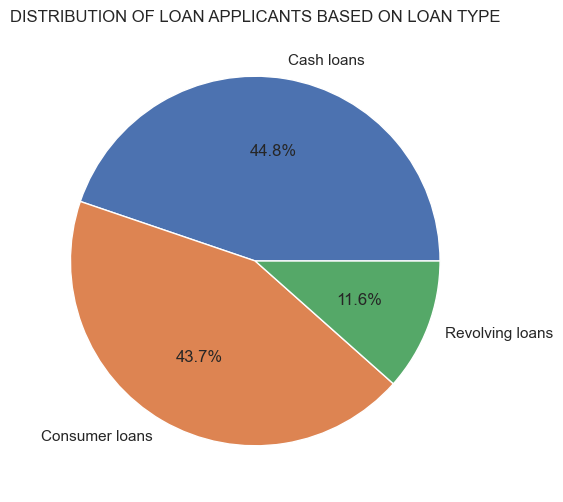

In [505]:
plt.figure(figsize=[12,6])
pre_app1.NAME_CONTRACT_TYPE.value_counts().plot.pie(title="DISTRIBUTION OF LOAN APPLICANTS BASED ON LOAN TYPE",
                                      ylabel='', autopct='%1.1f%%')
plt.show()

## 2. STATUS OF PREVIOUS APPLICATION

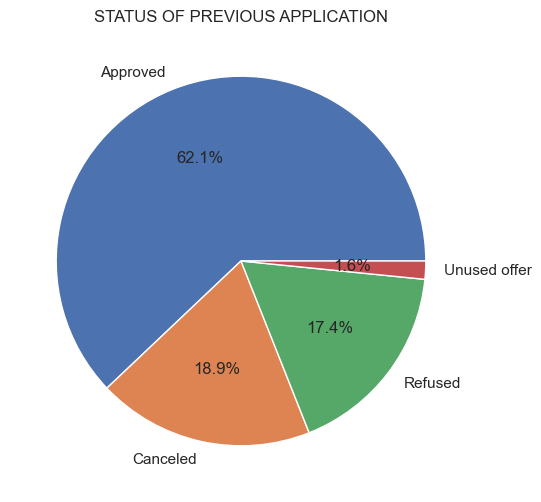

In [506]:
plt.figure(figsize=[12,6])
pre_app1.NAME_CONTRACT_STATUS.value_counts().plot.pie(title="STATUS OF PREVIOUS APPLICATION",
                                      ylabel='', autopct='%1.1f%%')
plt.show()

## 3. TYPES OF CLIENTS

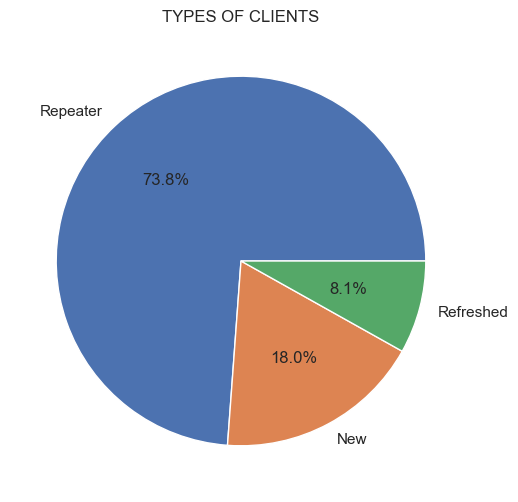

In [507]:
plt.figure(figsize=[12,6])
pre_app1.NAME_CLIENT_TYPE.value_counts().plot.pie(title="TYPES OF CLIENTS",
                                      ylabel='', autopct='%1.1f%%')
plt.show()

## 4. PURPOSE OF LOAN

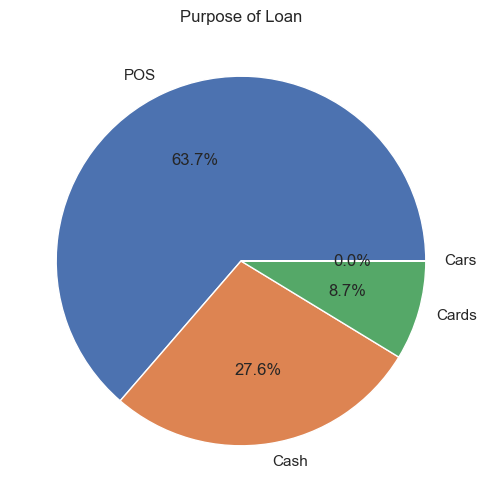

In [508]:
plt.figure(figsize=[12,6])
pre_app1.NAME_PORTFOLIO.value_counts().plot.pie(title="Purpose of Loan",
                                                 ylabel='', autopct='%1.1f%%')
plt.show()

## Importing Application data:

In [110]:
app_data = pd.read_csv('application_data.csv', )

In [111]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [112]:
col_des = pd.read_csv("columns_description.csv", encoding = 'latin1', skiprows = 1 )

In [113]:
col_des

1          application_data                    SK_ID_CURR  \
0      2          application_data                        TARGET   
1      5          application_data            NAME_CONTRACT_TYPE   
2      6          application_data                   CODE_GENDER   
3      7          application_data                  FLAG_OWN_CAR   
4      8          application_data               FLAG_OWN_REALTY   
5      9          application_data                  CNT_CHILDREN   
6     10          application_data              AMT_INCOME_TOTAL   
7     11          application_data                    AMT_CREDIT   
8     12          application_data                   AMT_ANNUITY   
9     13          application_data               AMT_GOODS_PRICE   
10    14          application_data               NAME_TYPE_SUITE   
11    15          application_data              NAME_INCOME_TYPE   
12    16          application_data           NAME_EDUCATION_TYPE   
13    17          application_data            NAME_FAMILY_STATUS   
14    18          application_data             NAME_HOUSING_TYPE   
15    19          application_data    REGION_POPULATION_RELATIVE   
16    20          application_data                    DAYS_BIRTH   
17    21          application_data                 DAYS_EMPLOYED   
18    22          application_data             DAYS_REGISTRATION   
19    23          application_data               DAYS_ID_PUBLISH   
20    24          application_data                   OWN_CAR_AGE   
21    25          application_data                    FLAG_MOBIL   
22    26          application_data                FLAG_EMP_PHONE   
23    27          application_data               FLAG_WORK_PHONE   
24    28          application_data              FLAG_CONT_MOBILE   
25    29          application_data                    FLAG_PHONE   
26    30          application_data                    FLAG_EMAIL   
27    31          application_data               OCCUPATION_TYPE   
28    32          application_data               CNT_FAM_MEMBERS   
29    33          application_data          REGION_RATING_CLIENT   
30    34          application_data   REGION_RATING_CLIENT_W_CITY   
31    35          application_data    WEEKDAY_APPR_PROCESS_START   
32    36          application_data       HOUR_APPR_PROCESS_START   
33    37          application_data    REG_REGION_NOT_LIVE_REGION   
34    38          application_data    REG_REGION_NOT_WORK_REGION   
35    39          application_data   LIVE_REGION_NOT_WORK_REGION   
36    40          application_data        REG_CITY_NOT_LIVE_CITY   
37    41          application_data        REG_CITY_NOT_WORK_CITY   
38    42          application_data       LIVE_CITY_NOT_WORK_CITY   
39    43          application_data             ORGANIZATION_TYPE   
40    44          application_data                  EXT_SOURCE_1   
41    45          application_data                  EXT_SOURCE_2   
42    46          application_data                  EXT_SOURCE_3   
43    47          application_data                APARTMENTS_AVG   
44    48          application_data              BASEMENTAREA_AVG   
45    49          application_data   YEARS_BEGINEXPLUATATION_AVG   
46    50          application_data               YEARS_BUILD_AVG   
47    51          application_data                COMMONAREA_AVG   
48    52          application_data                 ELEVATORS_AVG   
49    53          application_data                 ENTRANCES_AVG   
50    54          application_data                 FLOORSMAX_AVG   
51    55          application_data                 FLOORSMIN_AVG   
52    56          application_data                  LANDAREA_AVG   
53    57          application_data          LIVINGAPARTMENTS_AVG   
54    58          application_data                LIVINGAREA_AVG   
55    59          application_data       NONLIVINGAPARTMENTS_AVG   
56    60          application_data             NONLIVINGAREA_AVG   
57    61          application_data               APARTMENTS_MOD

In [114]:
app_data.shape

(307511, 122)

In [115]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [116]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [117]:
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [118]:
100 * app_data.isnull().mean()

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

##  Dropping columns with null values percentage greater than 35%

In [119]:
missing_app_data =  100 * app_data.isnull().mean()

In [120]:
missing_app_data

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [121]:
missing_cols = missing_app_data[missing_app_data>35]

In [122]:
missing_cols

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [123]:
missing_cols.count()

49

In [124]:
list_missing = list(missing_cols.index)

In [125]:
list_missing

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [126]:
len(list_missing)

49

In [127]:
app_data.shape

(307511, 122)

In [128]:
app_data = app_data.drop(['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE'], axis = 1)

In [129]:
122-49

73

In [130]:
app_data.shape

(307511, 73)

## Handling Missing Values in the Application data set:

In [131]:
100 * app_data.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [132]:
missing_app_data = 100 * app_data.isnull().mean()

In [133]:
missing_app_data

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [134]:
app_data['AMT_ANNUITY'].isnull().sum()

12

In [135]:
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [136]:
app_data['AMT_ANNUITY'].median()

24903.0

In [137]:
app_data['AMT_ANNUITY'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: AMT_ANNUITY
Non-Null Count   Dtype  
--------------   -----  
307499 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


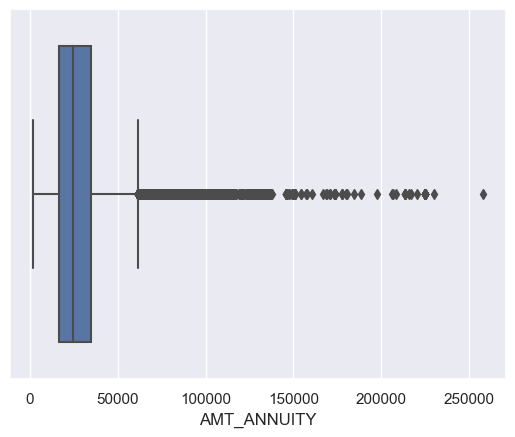

In [138]:
sns.boxplot(x = app_data['AMT_ANNUITY'])

plt.show()

**Imputing median of 'AMT_ANNUITY' to its missed values**

In [139]:
app_data['AMT_ANNUITY'].fillna(app_data['AMT_ANNUITY'].median(), inplace = True)

In [140]:
app_data['AMT_ANNUITY'].isnull().sum()

0

In [141]:
app_data['AMT_GOODS_PRICE'].isnull().sum()

278

In [142]:
app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [143]:
app_data['AMT_GOODS_PRICE'].median()

450000.0

In [144]:
mean_goods = app_data['AMT_GOODS_PRICE'].mean()

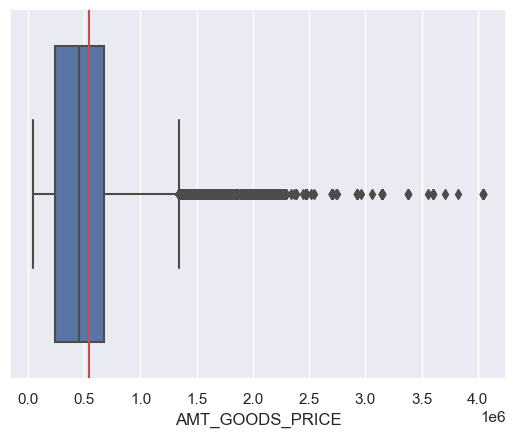

In [145]:
sns.boxplot(x = app_data['AMT_GOODS_PRICE'])

plt.axvline(x = mean_goods, color = 'r' )


plt.show()

**Imputing median of 'AMT_GOODS_PRICE' to its missed values**

In [146]:
app_data['AMT_GOODS_PRICE'].fillna(app_data['AMT_GOODS_PRICE'].median(), inplace = True)

In [147]:
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [148]:
app_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

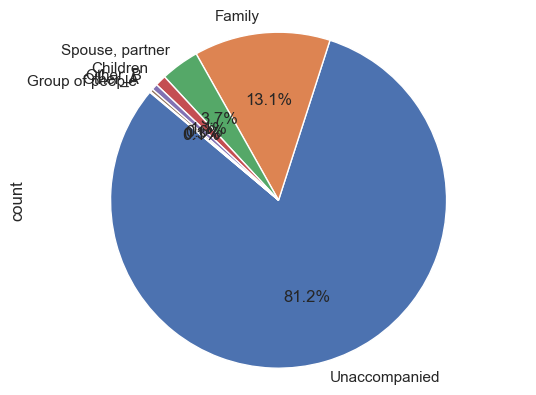

In [149]:
app_data['NAME_TYPE_SUITE'].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 140)

plt.axis('equal')

plt.show()

In [150]:
app_data['NAME_TYPE_SUITE'].isnull().sum()

1292

**Imputing 'NAME_TYPE_SUITE' missing values with most repeated values**

In [151]:
app_data['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [152]:
app_data['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [153]:
app_data['NAME_TYPE_SUITE'].fillna(app_data['NAME_TYPE_SUITE'].mode()[0], inplace = True)

In [154]:
app_data['NAME_TYPE_SUITE'].isnull().sum()

0

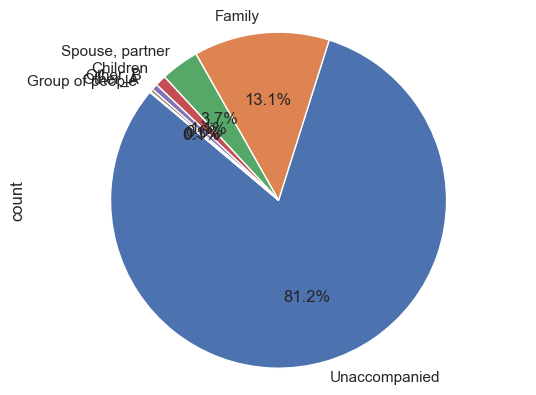

In [155]:
app_data['NAME_TYPE_SUITE'].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 140)

plt.axis('equal')

plt.show()

In [156]:
app_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [157]:
app_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [158]:
app_data['OCCUPATION_TYPE'].isnull().sum()

96391

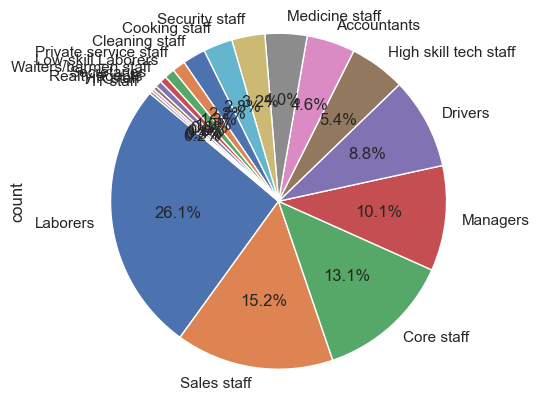

In [159]:
app_data['OCCUPATION_TYPE'].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 140)

plt.axis('equal')

plt.show()

**Imputing 'OCCUPATION_TYPE' missing values with most repeated values**

In [160]:
app_data['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [161]:
app_data['OCCUPATION_TYPE'].fillna(app_data['OCCUPATION_TYPE'].mode()[0], inplace = True)

In [162]:
app_data['OCCUPATION_TYPE'].isnull().sum()

0

In [163]:
app_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: count, dtype: int64

In [164]:
app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [165]:
col_des = pd.read_csv('columns_description.csv', encoding = 'latin1') 

In [166]:
col_des

Unnamed: 0                     Table                           Row  \
0             1          application_data                    SK_ID_CURR   
1             2          application_data                        TARGET   
2             5          application_data            NAME_CONTRACT_TYPE   
3             6          application_data                   CODE_GENDER   
4             7          application_data                  FLAG_OWN_CAR   
5             8          application_data               FLAG_OWN_REALTY   
6             9          application_data                  CNT_CHILDREN   
7            10          application_data              AMT_INCOME_TOTAL   
8            11          application_data                    AMT_CREDIT   
9            12          application_data                   AMT_ANNUITY   
10           13          application_data               AMT_GOODS_PRICE   
11           14          application_data               NAME_TYPE_SUITE   
12           15          application_data              NAME_INCOME_TYPE   
13           16          application_data           NAME_EDUCATION_TYPE   
14           17          application_data            NAME_FAMILY_STATUS   
15           18          application_data             NAME_HOUSING_TYPE   
16           19          application_data    REGION_POPULATION_RELATIVE   
17           20          application_data                    DAYS_BIRTH   
18           21          application_data                 DAYS_EMPLOYED   
19           22          application_data             DAYS_REGISTRATION   
20           23          application_data               DAYS_ID_PUBLISH   
21           24          application_data                   OWN_CAR_AGE   
22           25          application_data                    FLAG_MOBIL   
23           26          application_data                FLAG_EMP_PHONE   
24           27          application_data               FLAG_WORK_PHONE   
25           28          application_data              FLAG_CONT_MOBILE   
26           29          application_data                    FLAG_PHONE   
27           30          application_data                    FLAG_EMAIL   
28           31          application_data               OCCUPATION_TYPE   
29           32          application_data               CNT_FAM_MEMBERS   
30           33          application_data          REGION_RATING_CLIENT   
31           34          application_data   REGION_RATING_CLIENT_W_CITY   
32           35          application_data    WEEKDAY_APPR_PROCESS_START   
33           36          application_data       HOUR_APPR_PROCESS_START   
34           37          application_data    REG_REGION_NOT_LIVE_REGION   
35           38          application_data    REG_REGION_NOT_WORK_REGION   
36           39          application_data   LIVE_REGION_NOT_WORK_REGION   
37           40          application_data        REG_CITY_NOT_LIVE_CITY   
38           41          application_data        REG_CITY_NOT_WORK_CITY   
39           42          application_data       LIVE_CITY_NOT_WORK_CITY   
40           43          application_data             ORGANIZATION_TYPE   
41           44          application_data                  EXT_SOURCE_1   
42           45          application_data                  EXT_SOURCE_2   
43           46          application_data                  EXT_SOURCE_3   
44           47          application_data                APARTMENTS_AVG   
45           48          application_data              BASEMENTAREA_AVG   
46           49          application_data   YEARS_BEGINEXPLUATATION_AVG   
47           50          application_data               YEARS_BUILD_AVG   
48           51          application_data                COMMONAREA_AVG   
49           52          application_data                 ELEVATORS_AVG   
50           53          application_data                 ENTRANCES_AVG   
51           54          application_data                 FLOORSMAX_AVG   
52           55          appli

In [167]:
list(col_des.Description[col_des.Row.isin(['CNT_FAM_MEMBERS'])])

['How many family members does client have']

In [168]:
app_data['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

In [169]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [170]:
app_data['CNT_FAM_MEMBERS'].mode()[0]

2.0

**Imputing 'CNT_FAM_MEMBERS' missing values with most repeated values**

In [171]:
app_data['CNT_FAM_MEMBERS'].fillna(app_data['CNT_FAM_MEMBERS'].mode()[0], inplace = True)

In [172]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [173]:
app_data['EXT_SOURCE_2'].isnull().sum()

660

In [174]:
list(col_des.Description[col_des.Row.isin(['EXT_SOURCE_2'])])

['Normalized score from external data source']

In [175]:
app_data['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [176]:
app_data['EXT_SOURCE_2'].median()

0.5659614260608526

**Imputing 'EXT_SOURCE_2' missing values with its median value**

In [177]:
app_data['EXT_SOURCE_2'].fillna(app_data['EXT_SOURCE_2'].median(), inplace = True)

In [178]:
app_data['EXT_SOURCE_2'].isnull().sum()

0

In [179]:
app_data['EXT_SOURCE_3'].isnull().sum()

60965

In [180]:
list(col_des.Description[col_des.Row.isin(['EXT_SOURCE_3'])])

['Normalized score from external data source']

In [181]:
app_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

**Imputing 'EXT_SOURCE_3' missing values with its median value**

In [182]:
app_data['EXT_SOURCE_3'].median()

0.5352762504724826

In [183]:
app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].median(), inplace = True)

In [184]:
app_data['EXT_SOURCE_3'].isnull().sum()

0

In [185]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [186]:
list(col_des.Description[col_des.Row.isin(['OBS_30_CNT_SOCIAL_CIRCLE'])])

["How many observation of client's social surroundings with observable 30 DPD (days past due) default"]

In [187]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [188]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [189]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

**Imputing 'OBS_30_CNT_SOCIAL_CIRCLE' missing values with most repeated values**

In [190]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_data['OBS_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace = True)

In [191]:
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [192]:
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [193]:
list(col_des.Description[col_des.Row.isin(['DEF_30_CNT_SOCIAL_CIRCLE'])])

["How many observation of client's social surroundings defaulted on 30 DPD (days past due) "]

**Imputing 'DEF_30_CNT_SOCIAL_CIRCLE' missing values with most repeated values**

In [194]:
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [195]:
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

In [196]:
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode()[0], inplace = True)

In [197]:
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [198]:
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [199]:
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

**Imputing 'OBS_60_CNT_SOCIAL_CIRCLE' missing values with most repeated values**

In [200]:
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace = True)

In [201]:
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [202]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [203]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0]

0.0

**Imputing 'DEF_60_CNT_SOCIAL_CIRCLE' missing values with most repeated values**

In [204]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0], inplace = True)

In [205]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [206]:
app_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [207]:
list(col_des.Description[col_des.Row.isin(['DAYS_LAST_PHONE_CHANGE'])])

['How many days before application did client change phone']

In [208]:
app_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [209]:
app_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

DAYS_LAST_PHONE_CHANGE
 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-358.0       203
-329.0       203
-293.0       202
-350.0       201
-441.0       200
-399.0       200
-404.0       199
-9.0         198
-463.0       198
-11.0        198
-301.0       197
-362.0       195
-304.0       195
-496.0       195
-308.0       195
-483.0       195
-500.0       194
-355.0       194
-427.0       193
-391.0       193
-334.0       193
-448.0       192
-347.0       192
-413.0       191
-415.0       191
-447.0       190
-469.0       190
-546.0       190
-499.0       189
-353.0       188
-566.0       188
-428.0       187
-420.0       187
-417.0       186
-315.0       186
-475.0       186
-574.0       186
-454.0       185
-511.0       185
-484.0       185
-296.0       185
-534.0       185
-509.0       184
-609.0  

In [210]:
app_data['DAYS_LAST_PHONE_CHANGE'].mode()[0]

0.0

**Imputing 'DAYS_LAST_PHONE_CHANGE' missing values with most repeated values**

In [211]:
app_data['DAYS_LAST_PHONE_CHANGE'].fillna(app_data['DAYS_LAST_PHONE_CHANGE'].mode()[0], inplace = True)

In [212]:
app_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [213]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [214]:
list(col_des.Description[col_des.Row.isin(['AMT_REQ_CREDIT_BUREAU_HOUR'])])

['Number of enquiries to Credit Bureau about the client one hour before application']

In [215]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [216]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [217]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

0.0

**Imputing 'AMT_REQ_CREDIT_BUREAU_HOUR' missing values with most repeated values**

In [218]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace = True)

In [219]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [220]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41519

In [221]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [222]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0]

0.0

**Imputing 'AMT_REQ_CREDIT_BUREAU_DAY' missing values with most repeated values**

In [223]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace = True)

In [224]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [225]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [226]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]

0.0

In [227]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

**Imputing 'AMT_REQ_CREDIT_BUREAU_WEEK' missing values with most repeated values**

In [228]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace = True)

In [229]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [230]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [231]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [232]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]

0.0

**Imputing 'AMT_REQ_CREDIT_BUREAU_MON' missing values with most repeated values**

In [233]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace = True)

In [234]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [235]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [236]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [237]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]

0.0

**Imputing 'AMT_REQ_CREDIT_BUREAU_QRT' missing values with most repeated values**

In [238]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace = True)

In [239]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [240]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      256936
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [241]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41519

In [242]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

**Imputing 'AMT_REQ_CREDIT_BUREAU_YEAR' missing values with most repeated values**

In [243]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]

0.0

In [244]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0], inplace = True)

In [245]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

## Checking whether all missing values are handled or not

In [246]:
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RAT

## Standardizing the dataset

In [247]:
app_data.columns[app_data.dtypes =='object']

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [248]:
app_data['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [249]:
app_data['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

**Replacing XNA with mode value**

In [250]:
app_data[app_data.CODE_GENDER.isin(['XNA'])]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657             Laborers              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640            Laborers              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

In [251]:
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].replace("XNA", "F")

In [252]:
app_data['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [253]:
app_data['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

In [254]:
app_data['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

In [255]:
app_data['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [256]:
app_data['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [257]:
app_data['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [258]:
app_data['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [259]:
app_data['NAME_HOUSING_TYPE'].value_counts()

NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

In [260]:
app_data['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: count, dtype: int64

In [261]:
app_data['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: count, dtype: int64

In [262]:
app_data['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

**Replacing XNA values as NaN in Organization Type**

In [263]:
app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].replace("XNA", np.NaN)

In [264]:
app_data['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [265]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [266]:
list_days = []

for i in app_data.columns:
    if i[0:4] == "DAYS":
        list_days.append(i)
print(list_days)

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']


In [267]:
app_data['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
-10292    40
-14267    39
-13263    39
-11664    39
-14395    39
-13891    38
-13480    38
-15565    38
-13634    38
-15042    38
-13788    38
-14791    38
-13584    38
-10136    37
-14790    37
-10107    37
-14890    37
-10192    37
-11108    37
-16257    37
-20074    37
-14767    37
-16690    37
-15048    37
-13217    37
-12806    37
-14276    37
-15563    37
-15450    37
-14386    36
-10519    36
-11524    36
-13904    36
-14926    36
-14137    36
-13643    36
-13271    36
-13706    36
-15322    36
-14776    36
-13708    36
-15009    35
-11135    35
-12776    35
-11266    35
-14120    35
-16830    35
-14099    35
-15901    35
-16185    35
-12682    35
-15073    35
-14384    35
-11588    35
-10978    35
-10088    35
-11097    35
-14825    35
-13254    35
-13687    35
-17873    35
-13922    35
-10223    35
-12433    35
-15164    35
-10123    35
-15155    35
-10213    35
-15044    35
-14350    35
-9981     35
-

In [268]:
app_data['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
-212         150
-384         143
-229         143
-231         140
-215         138
-207         138
-216         137
-188         137
-196         136
-116         136
-222         135
-193         134
-195         133
-214         132
-254         131
-213         131
-201         130
-381         130
-233         128
-185         128
-194         127
-237         127
-184         126
-234         126
-209         125
-348         125
-241         124
-745         123
-137         123
-382         122
-139         122
-198         122
-238         122
-218         120
-240         120
-205         120
-191         120
-118         119
-223         119
-225         119
-181         118
-430         118
-244         118
-227         118
-268         117
-370         117
-133         117
-132         117
-228         117
-115         117
-119         116
-204         116
-129         116


In [269]:
app_data['DAYS_ID_PUBLISH'].value_counts()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
-4032    157
-4151    157
-4200    156
-4171    155
-4214    155
-4270    154
-4285    154
-4096    154
-4047    154
-4263    153
-4375    152
-4291    151
-4220    150
-4074    150
-4144    150
-4166    149
-4389    148
-4320    148
-4319    148
-4130    148
-4312    147
-4081    147
-4221    147
-4264    146
-4073    146
-4109    146
-4215    146
-4039    146
-4536    145
-4061    144
-4017    144
-4123    143
-4100    143
-4025    143
-4186    143
-4193    142
-4298    142
-4445    141
-4262    141
-4145    141
-4452    141
-4382    141
-4305    141
-4103    141
-4376    140
-4236    140
-4390    140
-4586    140
-4250    140
-4396    140
-4368    139
-4410    139
-4143    139
-4571    139
-4137    139
-4438    138
-4067    138
-4129    138
-4354    138
-4172    138
-4370    138
-4333    138
-4066    138
-4158    138
-4271    137
-4087    137
-4126    137
-4080    137
-4194    137
-4325    136
-4054    

In [270]:
app_data['DAYS_REGISTRATION'].value_counts()

DAYS_REGISTRATION
-1.000000        113
-7.000000         98
-6.000000         96
-4.000000         92
-2.000000         92
-5.000000         86
-3.000000         84
-9.000000         84
-14.000000        80
-21.000000        80
 0.000000         80
-10.000000        79
-11.000000        67
-511.000000       66
-15.000000        66
-8.000000         65
-56.000000        65
-23.000000        64
-41.000000        63
-621.000000       63
-13.000000        62
-70.000000        62
-34.000000        62
-69.000000        62
-19.000000        62
-20.000000        62
-742.000000       61
-812.000000       61
-29.000000        61
-735.000000       61
-679.000000       61
-389.000000       60
-569.000000       60
-827.000000       60
-342.000000       60
-42.000000        60
-4606.000000      60
-889.000000       59
-542.000000       59
-923.000000       59
-393.000000       59
-47.000000        59
-630.000000       59
-251.000000       59
-490.000000       58
-434.000000       58
-973.000000     

In [271]:
app_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

DAYS_LAST_PHONE_CHANGE
 0.0       37673
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-358.0       203
-329.0       203
-293.0       202
-350.0       201
-441.0       200
-399.0       200
-404.0       199
-9.0         198
-463.0       198
-11.0        198
-301.0       197
-362.0       195
-304.0       195
-496.0       195
-308.0       195
-483.0       195
-500.0       194
-355.0       194
-427.0       193
-391.0       193
-334.0       193
-448.0       192
-347.0       192
-413.0       191
-415.0       191
-447.0       190
-469.0       190
-546.0       190
-499.0       189
-353.0       188
-566.0       188
-428.0       187
-420.0       187
-417.0       186
-315.0       186
-475.0       186
-574.0       186
-454.0       185
-511.0       185
-484.0       185
-296.0       185
-534.0       185
-509.0       184
-609.0  

## Converting Negative values to Absolute values:

In [272]:
app_data['DAYS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE'].abs()

In [273]:
app_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

DAYS_LAST_PHONE_CHANGE
0.0       37673
1.0        2812
2.0        2318
3.0        1763
4.0        1285
5.0         824
6.0         537
7.0         442
8.0         278
476.0       222
352.0       213
392.0       211
364.0       209
479.0       204
358.0       203
329.0       203
293.0       202
350.0       201
441.0       200
399.0       200
404.0       199
9.0         198
463.0       198
11.0        198
301.0       197
362.0       195
304.0       195
496.0       195
308.0       195
483.0       195
500.0       194
355.0       194
427.0       193
391.0       193
334.0       193
448.0       192
347.0       192
413.0       191
415.0       191
447.0       190
469.0       190
546.0       190
499.0       189
353.0       188
566.0       188
428.0       187
420.0       187
417.0       186
315.0       186
475.0       186
574.0       186
454.0       185
511.0       185
484.0       185
296.0       185
534.0       185
509.0       184
609.0       183
291.0       183
360.0       183
344.0       183
4

In [274]:
app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].abs()

In [275]:
app_data['DAYS_REGISTRATION'].value_counts()

DAYS_REGISTRATION
1.000000        113
7.000000         98
6.000000         96
4.000000         92
2.000000         92
5.000000         86
3.000000         84
9.000000         84
14.000000        80
21.000000        80
0.000000         80
10.000000        79
11.000000        67
511.000000       66
15.000000        66
8.000000         65
56.000000        65
23.000000        64
41.000000        63
621.000000       63
13.000000        62
70.000000        62
34.000000        62
69.000000        62
19.000000        62
20.000000        62
742.000000       61
812.000000       61
29.000000        61
735.000000       61
679.000000       61
389.000000       60
569.000000       60
827.000000       60
342.000000       60
42.000000        60
4606.000000      60
889.000000       59
542.000000       59
923.000000       59
393.000000       59
47.000000        59
630.000000       59
251.000000       59
490.000000       58
434.000000       58
973.000000       58
371.000000       58
736.000000       58
61

In [276]:
app_data['DAYS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH'].abs()

In [277]:
app_data['DAYS_ID_PUBLISH'].value_counts()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
4032    157
4151    157
4200    156
4171    155
4214    155
4270    154
4285    154
4096    154
4047    154
4263    153
4375    152
4291    151
4220    150
4074    150
4144    150
4166    149
4389    148
4320    148
4319    148
4130    148
4312    147
4081    147
4221    147
4264    146
4073    146
4109    146
4215    146
4039    146
4536    145
4061    144
4017    144
4123    143
4100    143
4025    143
4186    143
4193    142
4298    142
4445    141
4262    141
4145    141
4452    141
4382    141
4305    141
4103    141
4376    140
4236    140
4390    140
4586    140
4250    140
4396    140
4368    139
4410    139
4143    139
4571    139
4137    139
4438    138
4067    138
4129    138
4354    138
4172    138
4370    138
4333    138
4066    138
4158    138
4271    137
4087    137
4126    137
4080    137
4194    137
4325    136
4054    136
4102    136
4150    136
4283    136
4369    135
4383    135
4404    135


In [278]:
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].abs()

In [279]:
app_data['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
212         150
384         143
229         143
231         140
215         138
207         138
216         137
188         137
196         136
116         136
222         135
193         134
195         133
214         132
254         131
213         131
201         130
381         130
233         128
185         128
194         127
237         127
184         126
234         126
209         125
348         125
241         124
745         123
137         123
382         122
139         122
198         122
238         122
218         120
240         120
205         120
191         120
118         119
223         119
225         119
181         118
430         118
244         118
227         118
268         117
370         117
133         117
132         117
228         117
115         117
119         116
204         116
129         116
109         115
391         115
236         115
206       

In [280]:
app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].abs()

In [281]:
app_data['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
13749    43
13481    42
18248    41
10020    41
15771    40
10292    40
14267    39
13263    39
11664    39
14395    39
13891    38
13480    38
15565    38
13634    38
15042    38
13788    38
14791    38
13584    38
10136    37
14790    37
10107    37
14890    37
10192    37
11108    37
16257    37
20074    37
14767    37
16690    37
15048    37
13217    37
12806    37
14276    37
15563    37
15450    37
14386    36
10519    36
11524    36
13904    36
14926    36
14137    36
13643    36
13271    36
13706    36
15322    36
14776    36
13708    36
15009    35
11135    35
12776    35
11266    35
14120    35
16830    35
14099    35
15901    35
16185    35
12682    35
15073    35
14384    35
11588    35
10978    35
10088    35
11097    35
14825    35
13254    35
13687    35
17873    35
13922    35
10223    35
12433    35
15164    35
10123    35
15155    35
10213    35
15044    35
14350    35
9981     35
14297    35
13273    35
14131    35
16490    35
16721    34
14061    34
14848

## Handling Outliers

**There is one outlier present in the above graph**

**Removing the same in the below**

In [282]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

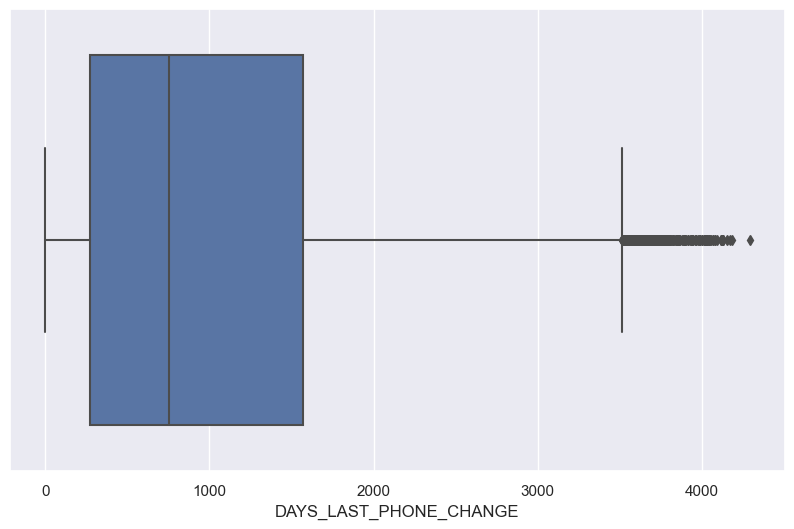

In [283]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['DAYS_LAST_PHONE_CHANGE'] )

plt.show()

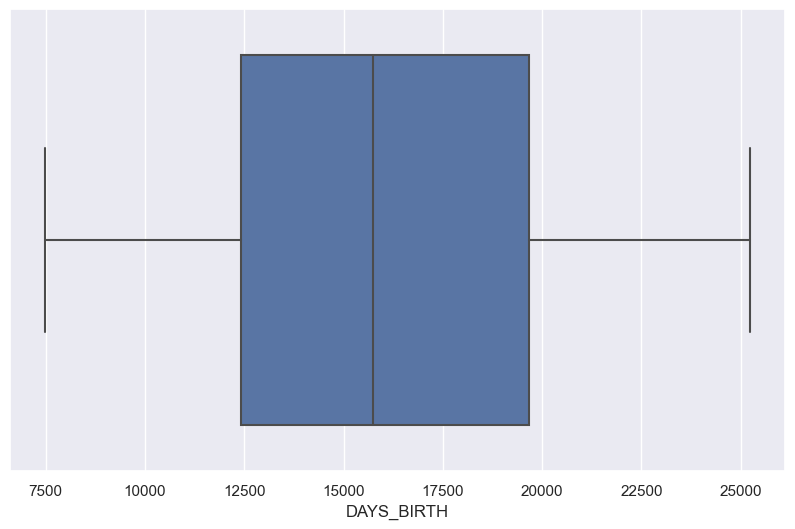

In [284]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['DAYS_BIRTH'] )

plt.show()

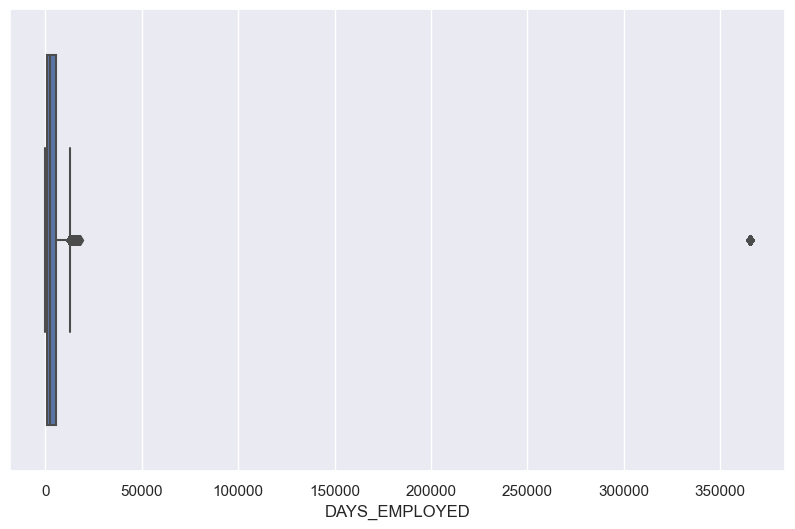

In [285]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['DAYS_EMPLOYED'] )

plt.show()

**One outlier is present in above graph**

**Removing the same below**

In [286]:
app_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [287]:
app_data = app_data[~(app_data['DAYS_EMPLOYED']>365000)]

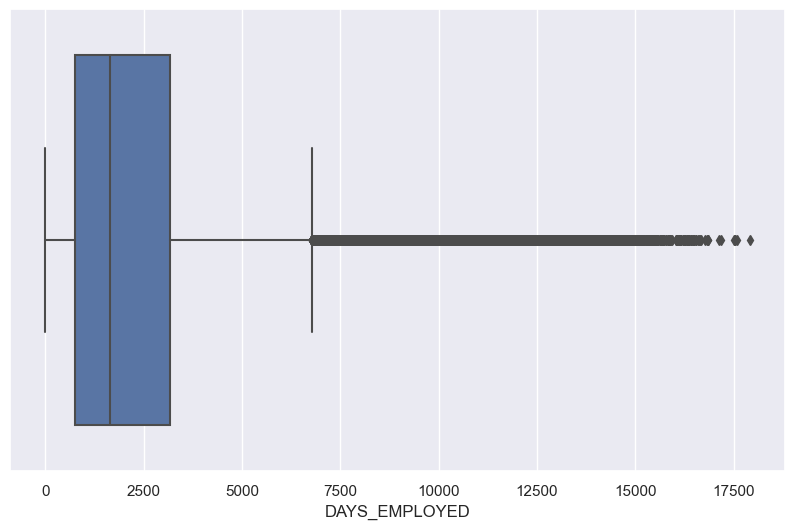

In [288]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['DAYS_EMPLOYED'] )

plt.show()

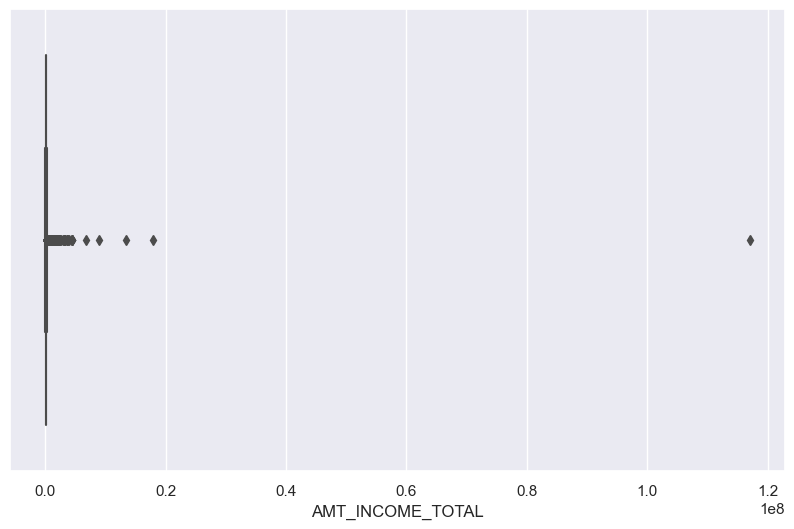

In [289]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['AMT_INCOME_TOTAL'] )

plt.show()

**One outlier is present in above graph**

**Removing the same below**

In [290]:
app_data['AMT_INCOME_TOTAL'].describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [291]:
app_data = app_data[~(app_data['AMT_INCOME_TOTAL']>110000000)]

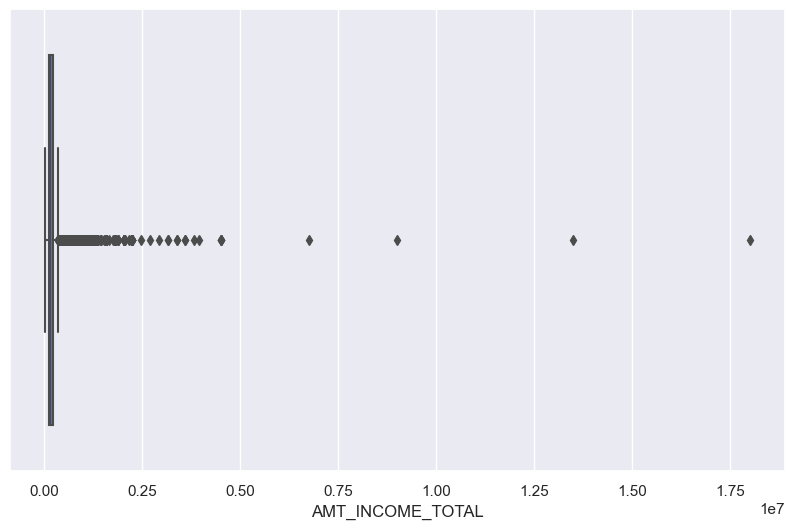

In [292]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['AMT_INCOME_TOTAL'] )

plt.show()

In [293]:
app_data['AMT_INCOME_TOTAL'].describe()

count    2.521360e+05
mean     1.754507e+05
std      1.134680e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

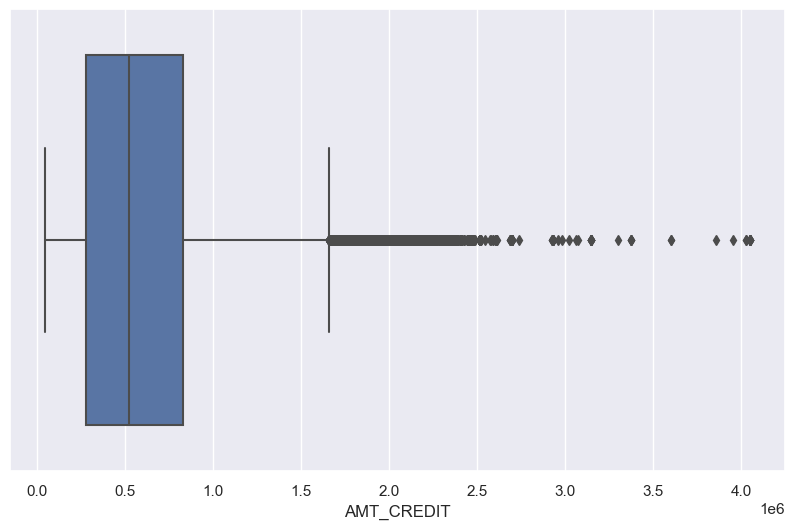

In [294]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['AMT_CREDIT'] )

plt.show()

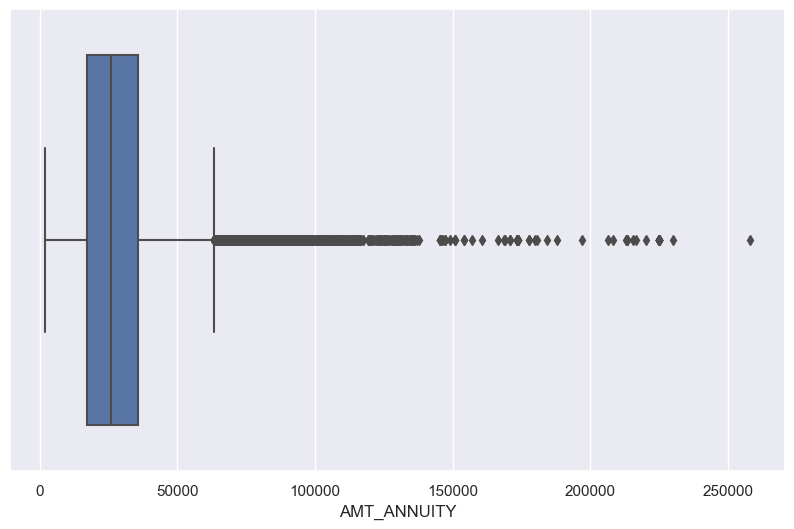

In [295]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['AMT_ANNUITY'] )

plt.show()

In [296]:
app_data['AMT_ANNUITY'].describe()

count    252136.000000
mean      27812.193120
std       14647.452974
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

**One outlier is present in above graph**

**Removing the same below**

In [297]:
app_data = app_data[~(app_data['AMT_ANNUITY']>240000)]

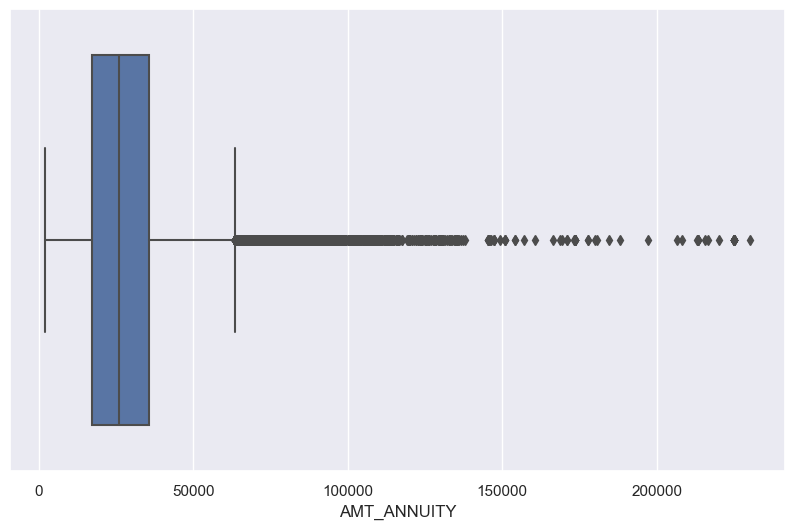

In [298]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['AMT_ANNUITY'] )

plt.show()

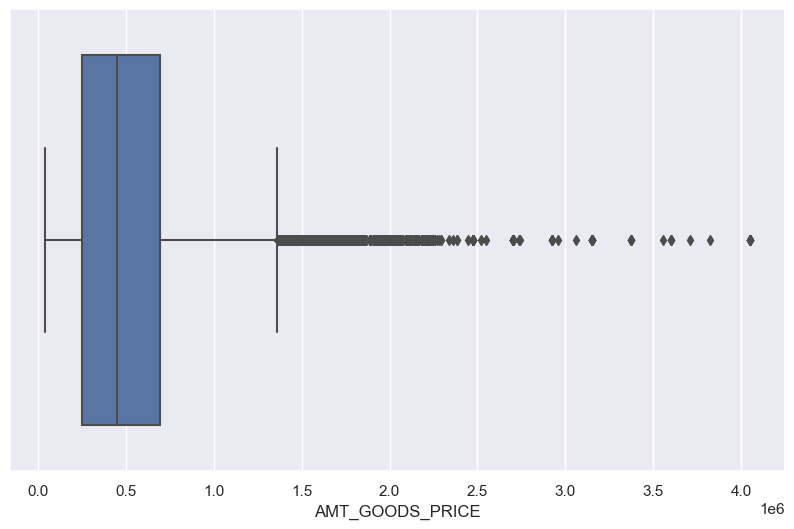

In [299]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['AMT_GOODS_PRICE'] )

plt.show()

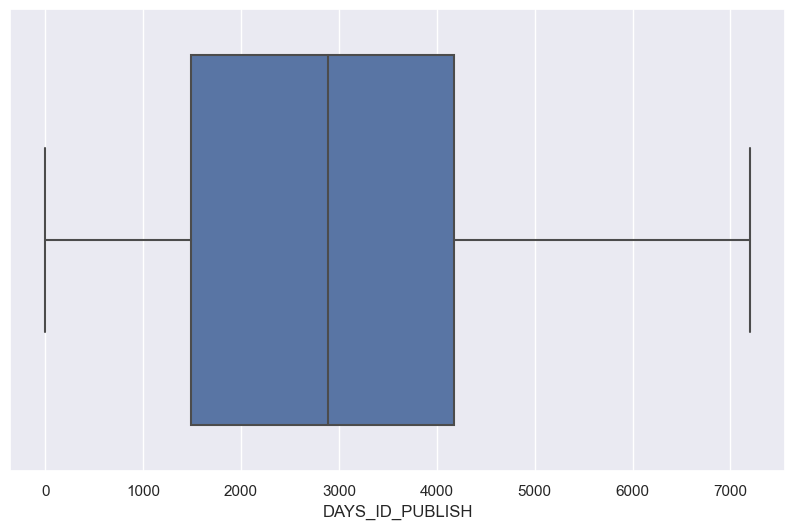

In [300]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['DAYS_ID_PUBLISH'] )

plt.show()

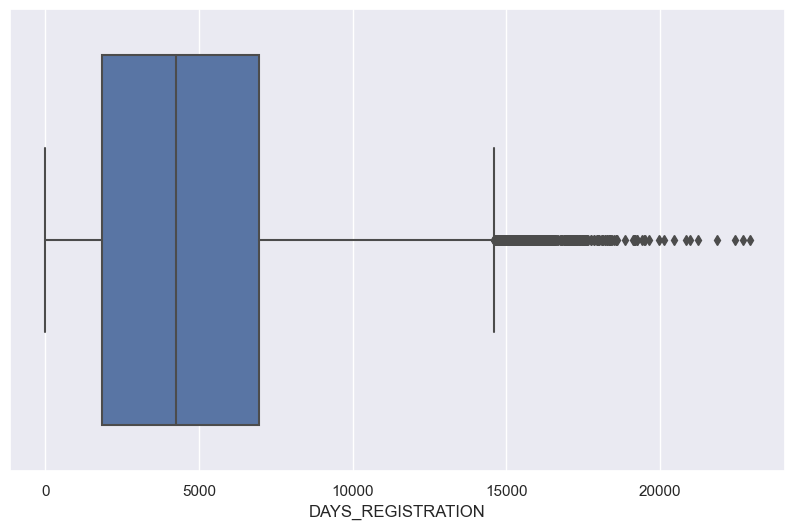

In [301]:
plt.figure(figsize = [10,6])

sns.boxplot(x = app_data['DAYS_REGISTRATION'] )

plt.show()

## Grouping the Application Dataset into Meaningful groups

In [302]:
pd.set_option('display.max_columns', None)

In [303]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

## Converting DAYS_BIRTH into years and age group

In [304]:
app_data['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [305]:
app_data['AGE'] = round((app_data['DAYS_BIRTH'])/365)

In [306]:
app_data['AGE'].head(15)

0     26.0
1     46.0
2     52.0
3     52.0
4     55.0
5     46.0
6     38.0
7     52.0
9     40.0
10    28.0
12    37.0
13    39.0
14    40.0
15    24.0
16    35.0
Name: AGE, dtype: float64

In [307]:
app_data["AGE_GROUPS"] = app_data.AGE.apply(lambda x: "Very Young" if 10<x<20 else ("Young" if 20<x<30 else
                                                                                    ("Middle Age" if 30<x<40 
                                                                                     else("Old" if 40<x<60 else("Very Old")))))

In [308]:
app_data['AGE_GROUPS'].head(15)

0          Young
1            Old
2            Old
3            Old
4            Old
5            Old
6     Middle Age
7            Old
9       Very Old
10         Young
12    Middle Age
13    Middle Age
14      Very Old
15         Young
16    Middle Age
Name: AGE_GROUPS, dtype: object

In [309]:
app_data['AGE_GROUPS'].value_counts()

AGE_GROUPS
Old           114007
Middle Age     73733
Young          40970
Very Old       23425
Name: count, dtype: int64

## Grouping Income

In [310]:
app_data['AMT_INCOME_TOTAL'].describe()

count    2.521350e+05
mean     1.754483e+05
std      1.134618e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

In [311]:
app_data['INCOME_RANGE'] = app_data.AMT_INCOME_TOTAL.apply( lambda x: 
                            "Very Low" if x<=25650 else("Low" if 25650<x<112500 
                                                        else ("Average" if 112500<x<157500 else ("High" if 157500<x<211500 else("Very High")))))

In [312]:
app_data['INCOME_RANGE'].head(15)

0          High
1     Very High
2           Low
3       Average
4       Average
5           Low
6          High
7     Very High
9       Average
10    Very High
12          Low
13    Very High
14         High
15    Very High
16          Low
Name: INCOME_RANGE, dtype: object

## Grouping Region Population

In [313]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [314]:
app_data.REGION_POPULATION_RELATIVE.describe()

count    252135.000000
mean          0.020894
std           0.013874
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [315]:
app_data['REGION_POPULATION_TYPE'] = app_data.REGION_POPULATION_RELATIVE.apply(lambda x : "Very less populated" if x<= 0.000290 else("Less populated" if 0.000290<x<0.010006 else("Average populated" if 0.010006<x<0.018850 else ("High populated" if 0.018850<x<0.028663 else("Very High populated") ) )))

In [316]:
app_data.REGION_POPULATION_TYPE.head(15)

0       Average populated
1          Less populated
2       Average populated
3          Less populated
4     Very High populated
5     Very High populated
6     Very High populated
7          Less populated
9          High populated
10         High populated
12    Very High populated
13      Average populated
14    Very High populated
15         High populated
16      Average populated
Name: REGION_POPULATION_TYPE, dtype: object

## Categorizing Family members

In [317]:
app_data.CNT_FAM_MEMBERS.value_counts()

CNT_FAM_MEMBERS
2.0     123332
3.0      51466
1.0      49049
4.0      24359
5.0       3417
6.0        396
7.0         78
8.0         19
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
13.0         1
15.0         1
16.0         1
11.0         1
Name: count, dtype: int64

In [318]:
app_data.CNT_FAM_MEMBERS.describe()

count    252135.000000
mean          2.252512
std           0.942109
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [319]:
app_data['FAMILY_SIZE']= app_data.CNT_FAM_MEMBERS.apply(lambda x: "Very small" if x<=1 else("Small" if 1<x<=3 else("Medium"  if 3<x<=5 else("Big" if 5<x<=8 else("Very Big")))))

In [320]:
app_data.FAMILY_SIZE.head(15)

0     Very small
1          Small
2     Very small
3          Small
4     Very small
5          Small
6          Small
7          Small
9     Very small
10         Small
12         Small
13         Small
14         Small
15    Very small
16         Small
Name: FAMILY_SIZE, dtype: object

## Dropping Unnecessary columns from the Application dataset

In [321]:
app_data1 = app_data.copy()

In [322]:
app_data1.shape

(252135, 78)

In [323]:
app_data1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [324]:
app_data1.drop(['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 
                'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 
                'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 
                'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
                'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 
                'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 
                'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
                'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
                'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
                'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 
                'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 
                'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'], inplace=True, axis=1)

In [325]:
app_data1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_EMPLOYED OCCUPATION_TYPE  REGION_RATING_CLIENT  \
0            637        Laborers                     2   
1           1188      Core staff                     1   
2            225        Laborers                     2   
3           3039        Laborers                     2   
4           3038      Core staff                     2   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                            2  Business Entity Type 3   
1                            1                  School   
2                            2              Government   
3                            2  Business Entity Type 3   
4                            2                Religion   

   DAYS_LAST_PHONE_CHANGE AGE_GROUPS INCOME_RANGE REGION_POPULATION_TYPE  \
0                  1134.0      Young         High      Average populated   
1                   828.0        Old    Very High         Less populated   
2                   815.0        Old          Low      Average populated   
3                   617.0        Old      Average         Less populated   
4                  1106.0        Old      Average    Very High populated   

  FAMILY_SIZE  
0  Very small  
1       Small  
2  Very small  
3       Small  
4  Very small

In [326]:
app_data1.shape

(252135, 26)

## Checking TARGET VARIABLE

In [327]:
list(col_des.Description[col_des.Row.isin(['TARGET'])])

['Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)']

In [328]:
app_data1.TARGET.value_counts()

TARGET
0    230301
1     21834
Name: count, dtype: int64

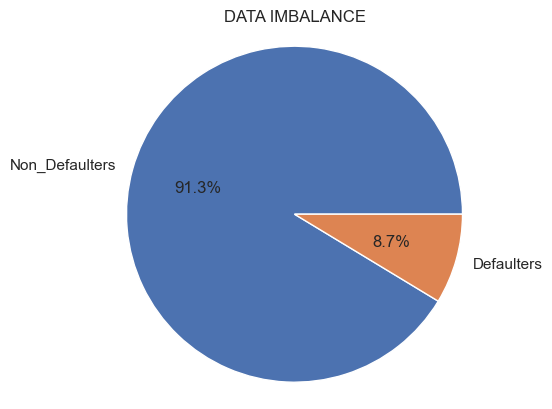

In [329]:
app_data1.TARGET.value_counts().plot.pie(autopct = '%1.1f%%', title = "DATA IMBALANCE", labels = ["Non_Defaulters", "Defaulters"], ylabel = "")

plt.axis("equal")
plt.show()

## The Above chart depicts that there is huge imbalance between Non_Defaulters and Defaulters.

## UNIVARIATE ANALYSIS

<font color ="green"> **1. Distribution of Loan Applicants based on Gender** </font>

In [330]:
app_data1.CODE_GENDER.value_counts()

CODE_GENDER
F    157180
M     94955
Name: count, dtype: int64

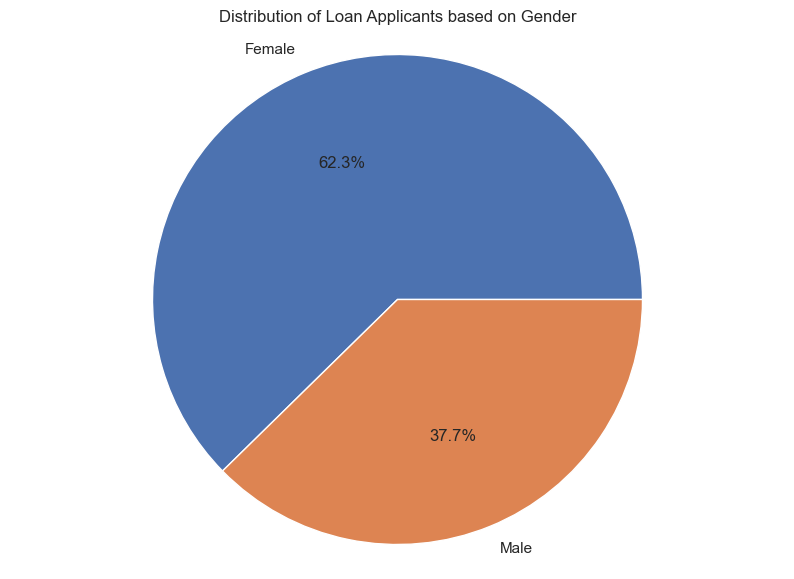

In [331]:
plt.figure(figsize = [10,7])

app_data1.CODE_GENDER.value_counts().plot.pie(autopct = '%1.1f%%', title = "Distribution of Loan Applicants based on Gender", labels = ["Female", "Male"], ylabel = "")

plt.axis("equal")
plt.show()

## The Above chart depicts that Female Applicants are more than Male Applicants.

<font color ="green"> **2. Distribution of Loan Applicants based on Owning a Car** </font>

In [332]:
app_data1.FLAG_OWN_CAR.value_counts()

FLAG_OWN_CAR
N    157718
Y     94417
Name: count, dtype: int64

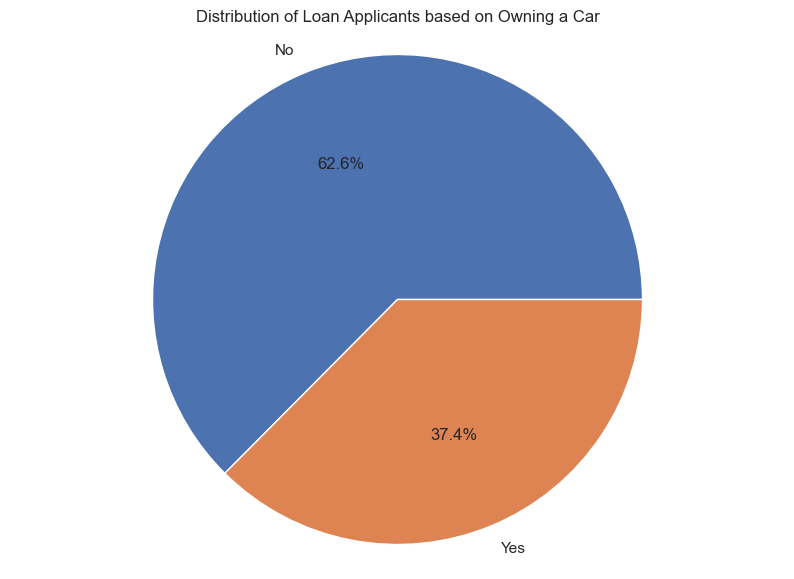

In [333]:
plt.figure(figsize = [10,7])
app_data1.FLAG_OWN_CAR.value_counts().plot.pie(autopct = '%1.1f%%', title = "Distribution of Loan Applicants based on Owning a Car", labels = ["No", "Yes"], ylabel = "")

plt.axis("equal")
plt.show()

## The Above chart depicts that people who doesn't own a Car have applied for loans than people who owns a car.

<font color ="green"> **3. Distribution of Loan Applicants based on Owning a Housing Property** </font>

In [334]:

app_data1.FLAG_OWN_REALTY.value_counts()

FLAG_OWN_REALTY
Y    171081
N     81054
Name: count, dtype: int64

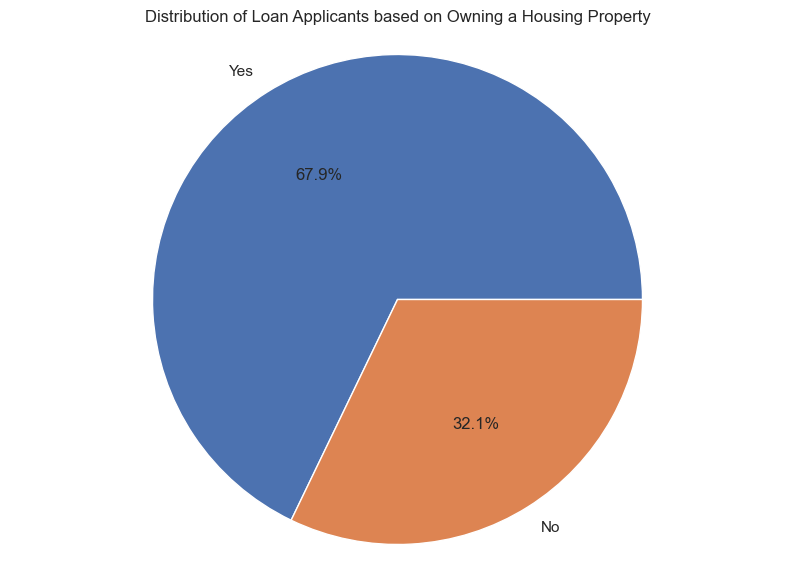

In [335]:

plt.figure(figsize = [10,7])
app_data1.FLAG_OWN_REALTY.value_counts().plot.pie(autopct = '%1.1f%%', title = "Distribution of Loan Applicants based on Owning a Housing Property", labels = ["Yes", "No"], ylabel = "")

plt.axis("equal")
plt.show()

## From the above graph, we can depict that the people owning a realty have applied for loans more than the people not owning a realty.

<font color ="green"> **4. Distribution of Loan Applicants based on Source of Income** </font>

In [336]:
app_data1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_EMPLOYED OCCUPATION_TYPE  REGION_RATING_CLIENT  \
0            637        Laborers                     2   
1           1188      Core staff                     1   
2            225        Laborers                     2   
3           3039        Laborers                     2   
4           3038      Core staff                     2   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                            2  Business Entity Type 3   
1                            1                  School   
2                            2              Government   
3                            2  Business Entity Type 3   
4                            2                Religion   

   DAYS_LAST_PHONE_CHANGE AGE_GROUPS INCOME_RANGE REGION_POPULATION_TYPE  \
0                  1134.0      Young         High      Average populated   
1                   828.0        Old    Very High         Less populated   
2                   815.0        Old          Low      Average populated   
3                   617.0        Old      Average         Less populated   
4                  1106.0        Old      Average    Very High populated   

  FAMILY_SIZE  
0  Very small  
1       Small  
2  Very small  
3       Small  
4  Very small

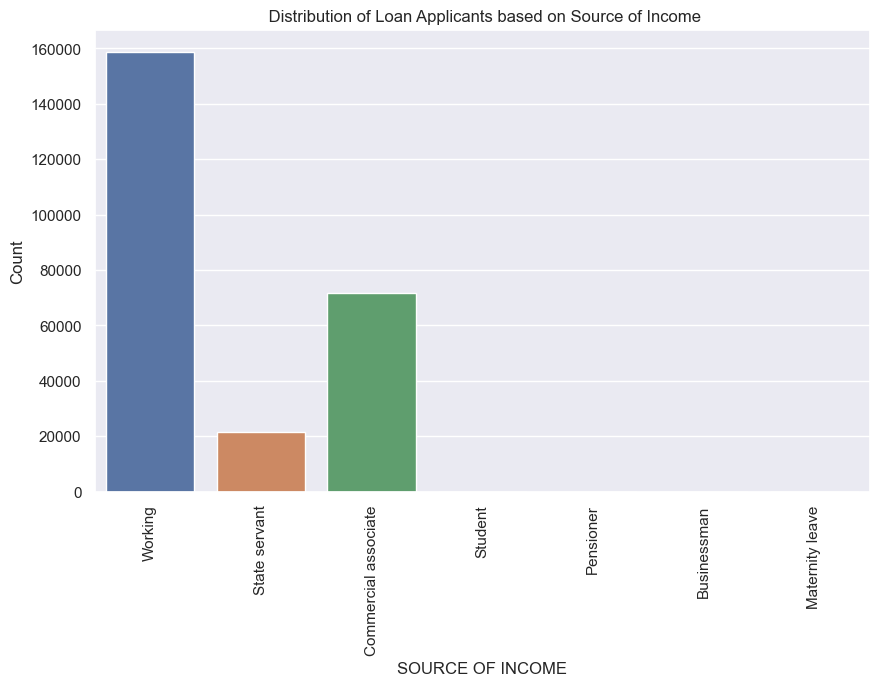

In [337]:
plt.figure(figsize = [10,6])

sns.countplot(x = app_data1.NAME_INCOME_TYPE)
plt.title(" Distribution of Loan Applicants based on Source of Income")

plt.xlabel("SOURCE OF INCOME")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## From the above graph, we can depict that the loan applications are higher from people whose source of income is by working.

<font color ="green"> **5. Distribution of Loan Applicants based on Education** </font>

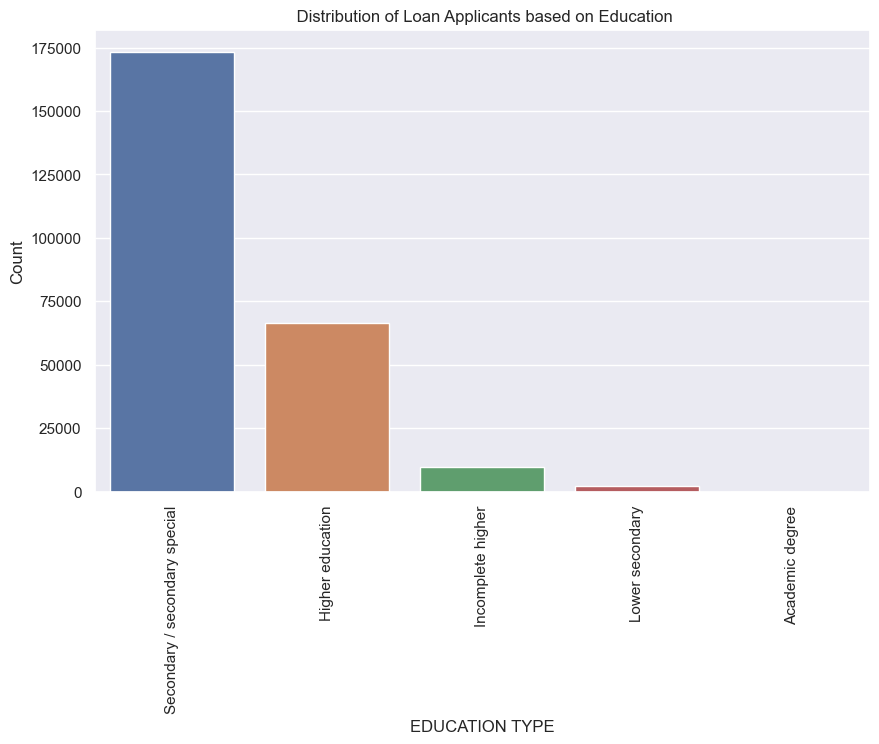

In [338]:
plt.figure(figsize = [10,6])

sns.countplot(x = app_data1.NAME_EDUCATION_TYPE)
plt.title(" Distribution of Loan Applicants based on Education")

plt.xlabel("EDUCATION TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## From the above graph, we can depict that the people who have completed Secondary education have applied for loans more than any other Education type.

<font color ="green"> **6. Distribution of Loan Applicants based on Marital Status** </font>

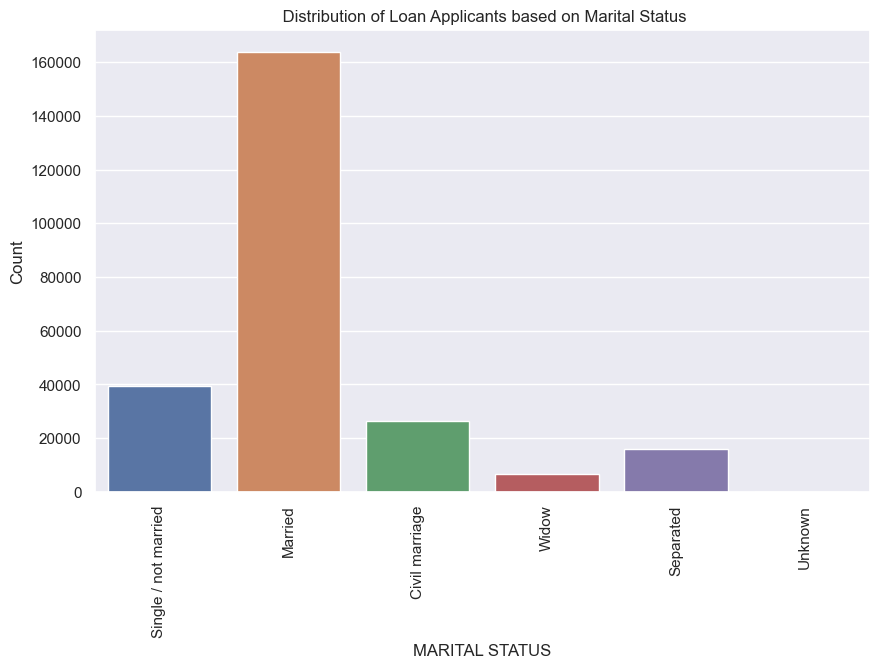

In [339]:
plt.figure(figsize = [10,6])

sns.countplot(x = app_data1.NAME_FAMILY_STATUS)
plt.title(" Distribution of Loan Applicants based on Marital Status")

plt.xlabel("MARITAL STATUS")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

<font color ="green"> **7. Distribution of Loan Applicants based on Housing Type** </font>

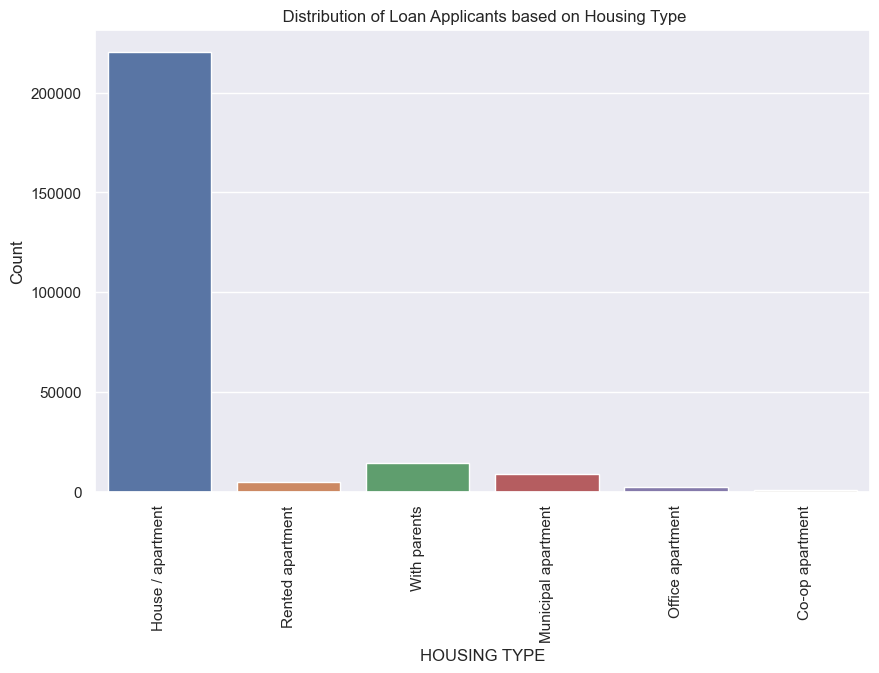

In [340]:
plt.figure(figsize = [10,6])

sns.countplot(x = app_data1.NAME_HOUSING_TYPE)
plt.title(" Distribution of Loan Applicants based on Housing Type")

plt.xlabel("HOUSING TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## From the above graph, we can depict that the people in House/apartment have applied loans more than any other category.

<font color ="green"> **8. Distribution of Loan Applicants based on Occupation** </font>

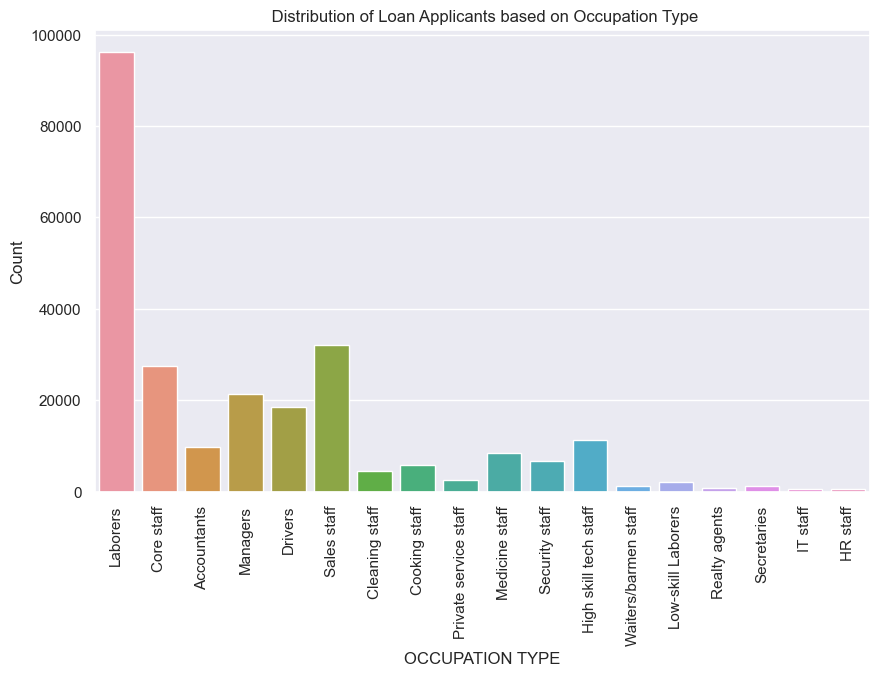

In [341]:
plt.figure(figsize = [10,6])

sns.countplot(x = app_data1.OCCUPATION_TYPE)
plt.title(" Distribution of Loan Applicants based on Occupation Type")

plt.xlabel("OCCUPATION TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## From the above graph, we can depict that the Laborers have applied loans more than any other category.

<font color ="green"> **9. Distribution of Loan Applicants based on Organization Type** </font>

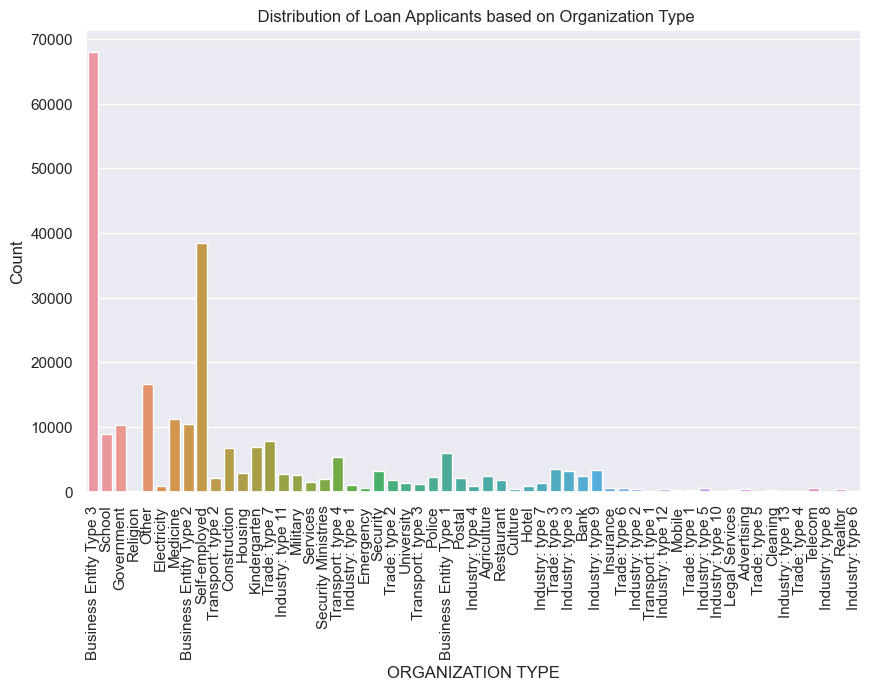

In [342]:
plt.figure(figsize = [10,6])

sns.countplot(x = app_data1.ORGANIZATION_TYPE)
plt.title(" Distribution of Loan Applicants based on Organization Type")

plt.xlabel("ORGANIZATION TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## From the above graph, we can depict that the people working in Business Entity Type 3 have applied loans more than any other category.

<font color ="green"> **10. Distribution of Loan Applicants based on Age Group** </font>

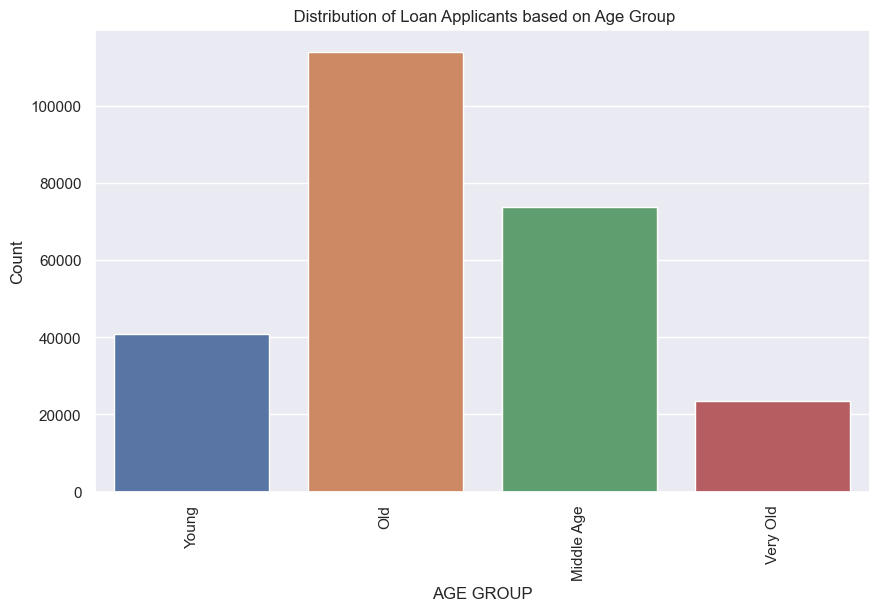

In [343]:
plt.figure(figsize = [10,6])

sns.countplot(x = app_data1.AGE_GROUPS)
plt.title(" Distribution of Loan Applicants based on Age Group")

plt.xlabel("AGE GROUP")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## From the above graph, we can depict that the old age people have applied loans more than any other category.

<font color ="green"> **11. Distribution of Loan Applicants based on Income** </font>

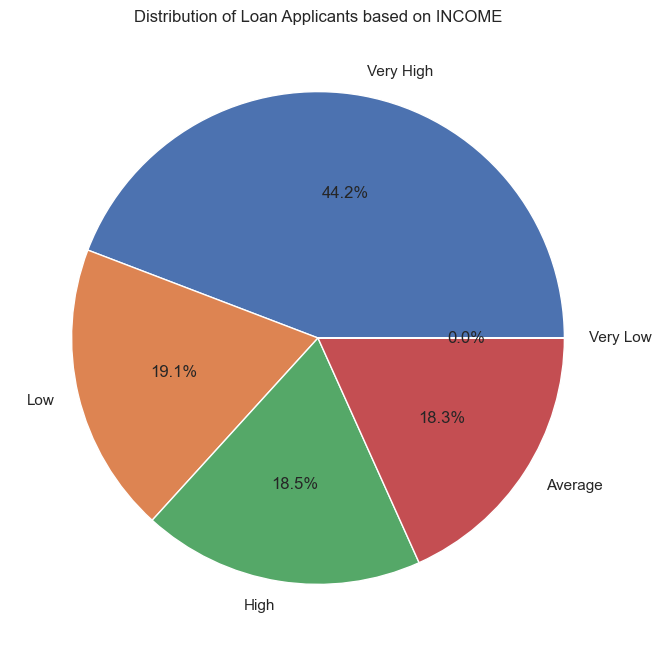

In [344]:
plt.figure(figsize = [12,8])

app_data1['INCOME_RANGE'].value_counts().plot.pie(autopct = '%1.1f%%', title = "Distribution of Loan Applicants based on INCOME", ylabel = "")


plt.show()

## From the above graph, we can depict that the loan applicants are equally distributed in all income range except very low range

<font color ="green"> **12. Distribution of Loan Applicants based on Regional Population** </font>

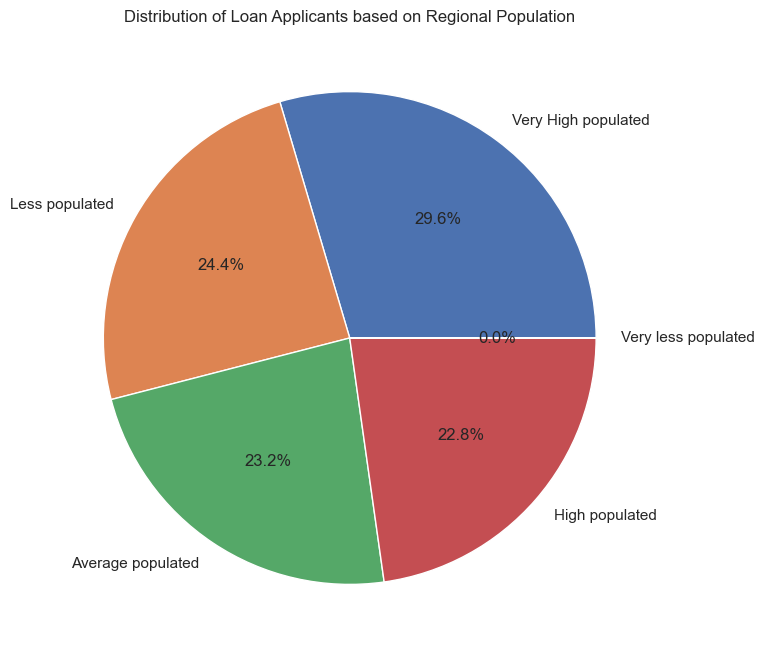

In [345]:
plt.figure(figsize = [12,8])

app_data1['REGION_POPULATION_TYPE'].value_counts().plot.pie(autopct = '%1.1f%%', title = "Distribution of Loan Applicants based on Regional Population", ylabel = "")


plt.show()


## From the above graph,We can depict that the loan applicants are equally distributed population-wise.

<font color ="green"> **13. Distribution of Loan Applicants based on Family Size** </font>

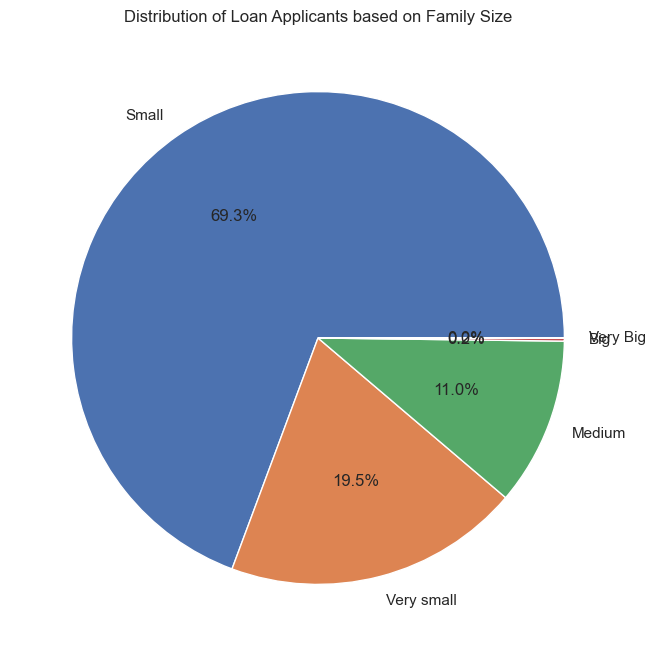

In [347]:
plt.figure(figsize = [12,8])

app_data1['FAMILY_SIZE'].value_counts().plot.pie(autopct = '%1.1f%%', title = "Distribution of Loan Applicants based on Family Size", ylabel = "")


plt.show()

## From the above graph, we can depict that the people with small family size have applied for loans more than any other category.

In [ ]:
<font color ="green"> **14. Distribution of Loan Applicants based on Loan Type** </font>

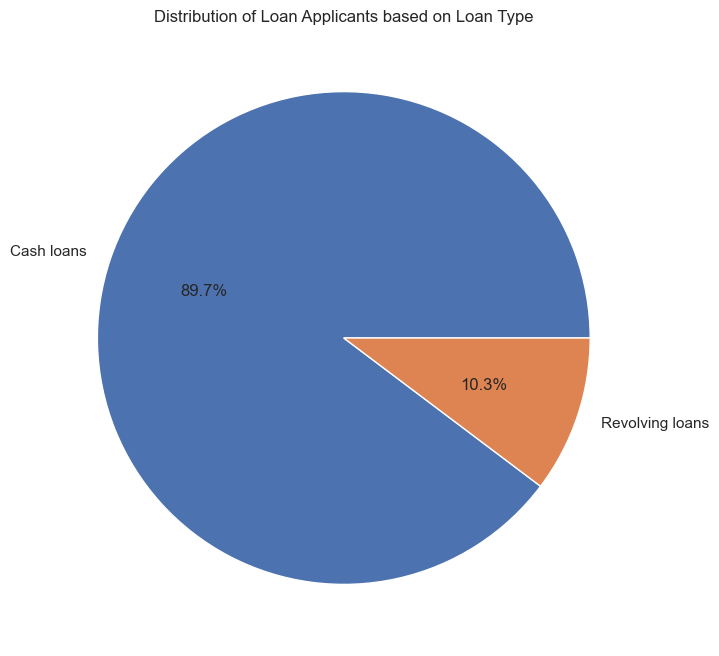

In [348]:
plt.figure(figsize = [12,8])

app_data1['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct = '%1.1f%%', title = "Distribution of Loan Applicants based on Loan Type", ylabel = "")


plt.show()

## From the above graph, we can depict that the cash loan applications are more than the revolving loan applications.

## Segmented Univariate Analysis

**Here we can create two dataset with Target variable 1 and 0, which helps is vizualizing and perform Segmented Univariate Analysis**

In [355]:
list(col_des.Description[col_des.Row.isin(['TARGET'])])

['Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)']

In [361]:
Default = app_data1.loc[app_data1.TARGET == 1]

In [363]:
Default.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
94      100112       1         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
94               Y             0          315000.0    953460.0      64107.0   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
94         900000.0          Family  Commercial associate   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
94              Incomplete higher  Single / not married       With parents   

    DAYS_EMPLOYED OCCUPATION_TYPE  REGION_RATING_CLIENT  \
0             637        Laborers                     2   
26           2628   Cooking staff                     3   
40           1262        Laborers                     2   
42           3597     Sales staff                     3   
94           2015        Laborers                     2   

    REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                             2  Business Entity Type 3   
26                            2  Business Entity Type 3   
40                            2  Business Entity Type 3   
42                            3           Self-employed   
94                            2        Industry: type 4   

    DAYS_LAST_PHONE_CHANGE  AGE_GROUPS INCOME_RANGE REGION_POPULATION_TYPE  \
0                   1134.0       Young         High      Average populated   
26                   161.0         Old    Very High      Average populated   
40                  1075.0         Old         High         High populated   
42                  1480.0  Middle Age      Average         Less populated   
94                   591.0       Young    Very High    Very High populated   

   FAMILY_SIZE  
0   Very small  
26  Very small  
40       Small  
42       Small  
94  Very small

In [364]:
Non_default = app_data1.loc[app_data1.TARGET == 0]

In [365]:
Non_default.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   DAYS_EMPLOYED OCCUPATION_TYPE  REGION_RATING_CLIENT  \
1           1188      Core staff                     1   
2            225        Laborers                     2   
3           3039        Laborers                     2   
4           3038      Core staff                     2   
5           1588        Laborers                     2   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
1                            1                  School   
2                            2              Government   
3                            2  Business Entity Type 3   
4                            2                Religion   
5                            2                   Other   

   DAYS_LAST_PHONE_CHANGE AGE_GROUPS INCOME_RANGE REGION_POPULATION_TYPE  \
1                   828.0        Old    Very High         Less populated   
2                   815.0        Old          Low      Average populated   
3                   617.0        Old      Average         Less populated   
4                  1106.0        Old      Average    Very High populated   
5                  2536.0        Old          Low    Very High populated   

  FAMILY_SIZE  
1       Small  
2  Very small  
3       Small  
4  Very small  
5       Small

## 1. COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON GENDER

In [366]:
x = Default.CODE_GENDER.value_counts()

In [378]:
y = Non_default.CODE_GENDER.value_counts()

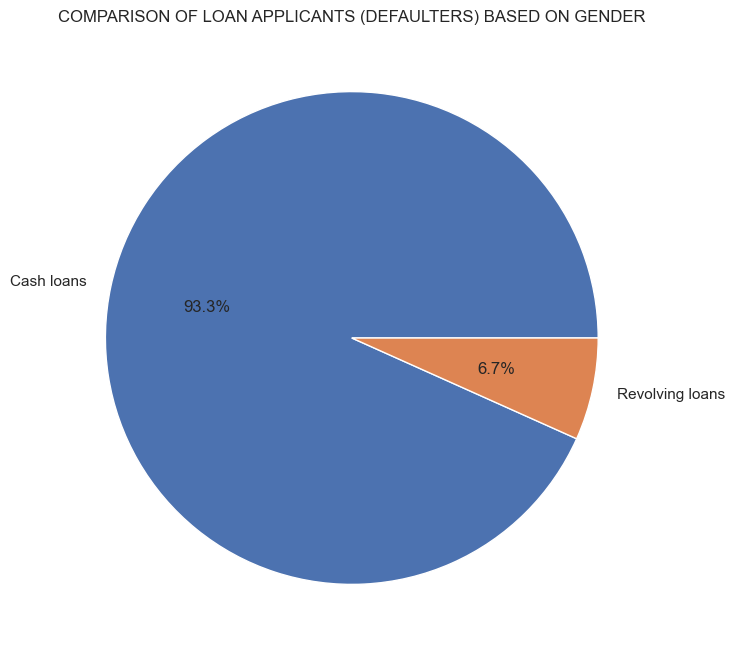

In [383]:
plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON GENDER",
           ylabel='', autopct='%1.1f%%')

plt.show()

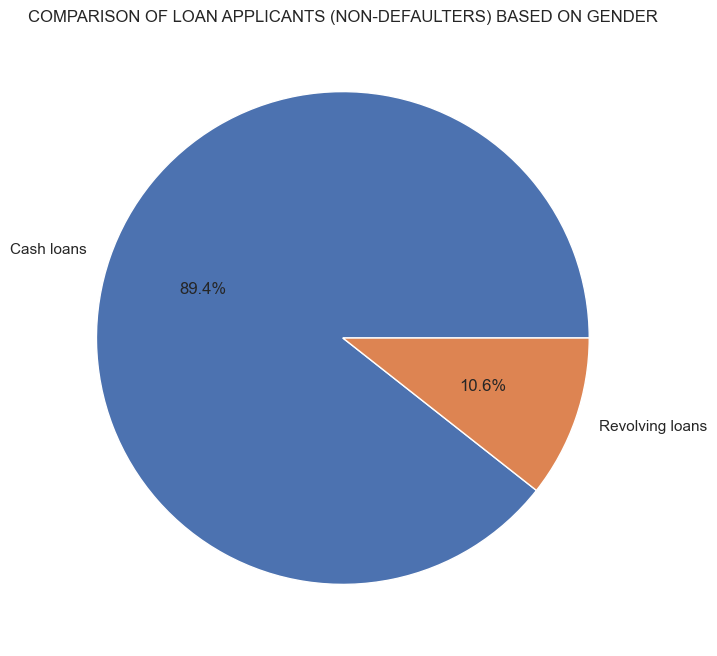

In [384]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON GENDER",
           ylabel='', autopct='%1.1f%%')

plt.show()

## 2. COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON LOAN TYPE

In [380]:
x = Default.NAME_CONTRACT_TYPE.value_counts()

y = Non_default.NAME_CONTRACT_TYPE.value_counts()

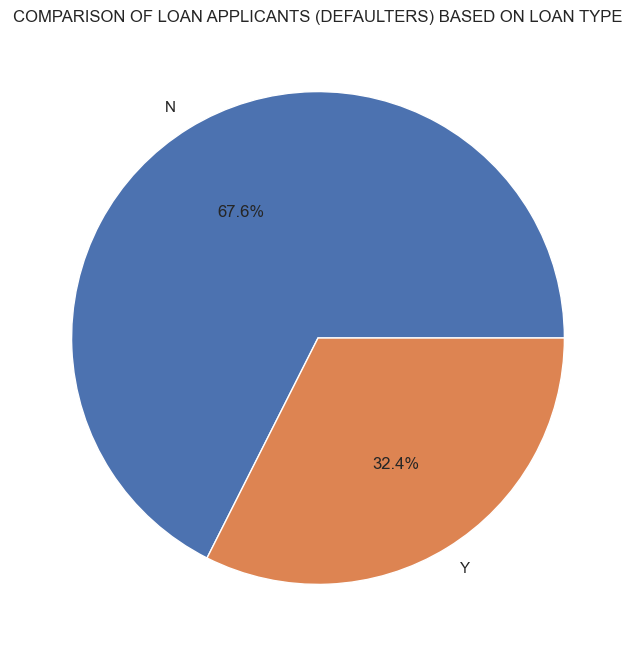

In [388]:
plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON LOAN TYPE",
           ylabel='', autopct='%1.1f%%')

plt.show()

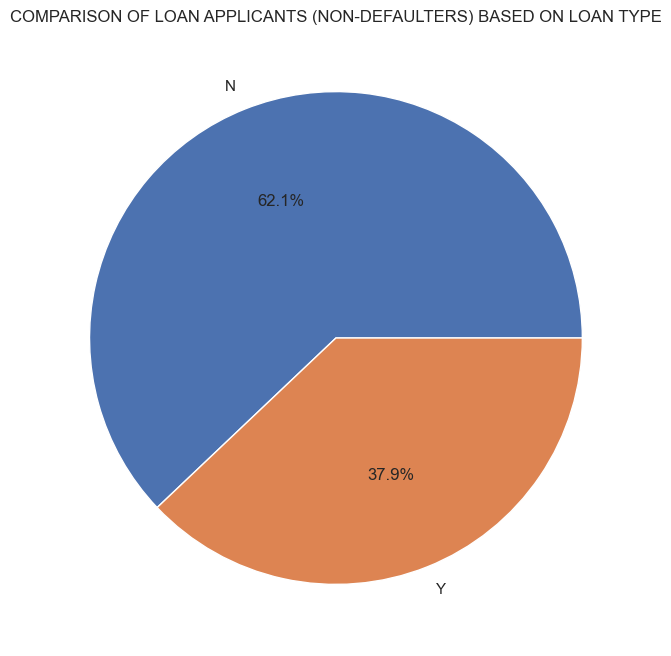

In [389]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON LOAN TYPE",
           ylabel='', autopct='%1.1f%%')

plt.show()

## 3.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON OWNING A CAR

In [390]:
x = Default.FLAG_OWN_CAR.value_counts()

y = Non_default.FLAG_OWN_CAR.value_counts()

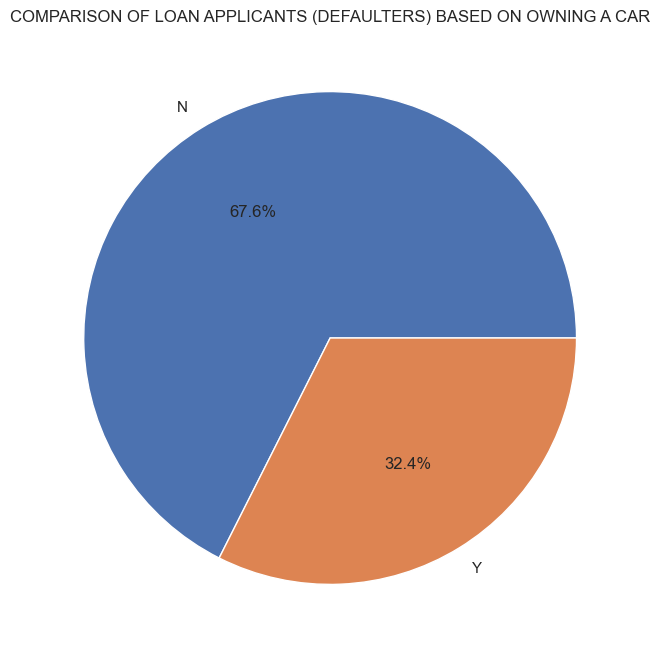

In [391]:
plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON OWNING A CAR",
           ylabel='', autopct='%1.1f%%')

plt.show()

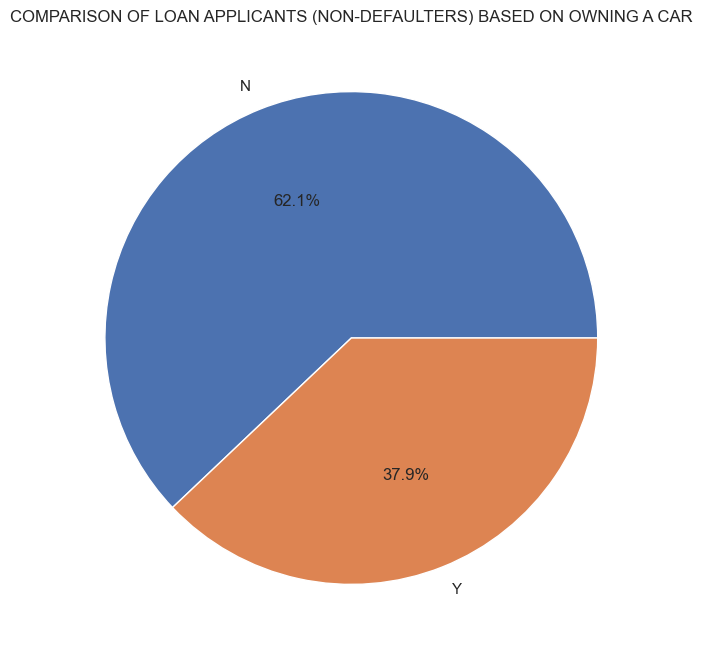

In [392]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON OWNING A CAR",
           ylabel='', autopct='%1.1f%%')

plt.show()

## 4.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON OWNING A REALTY

In [393]:
x = Default.FLAG_OWN_REALTY.value_counts()

y = Non_default.FLAG_OWN_REALTY.value_counts()

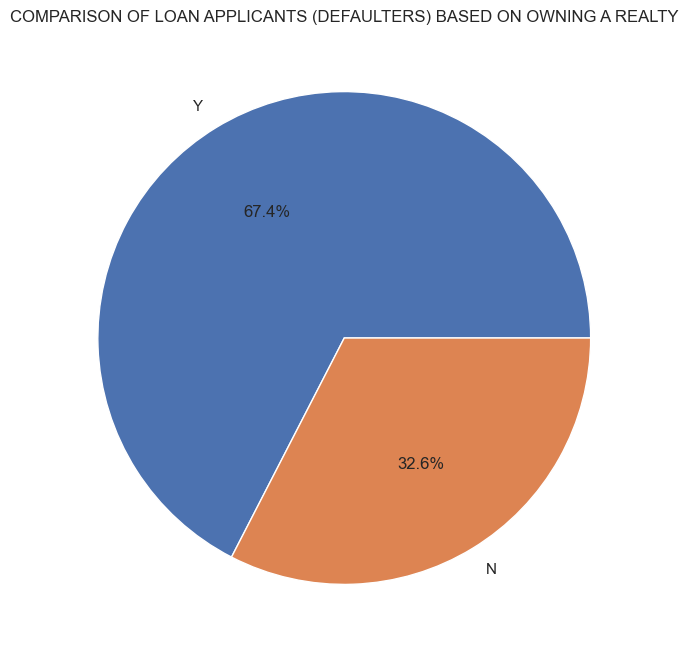

In [394]:
plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON OWNING A REALTY",
           ylabel='', autopct='%1.1f%%')

plt.show()

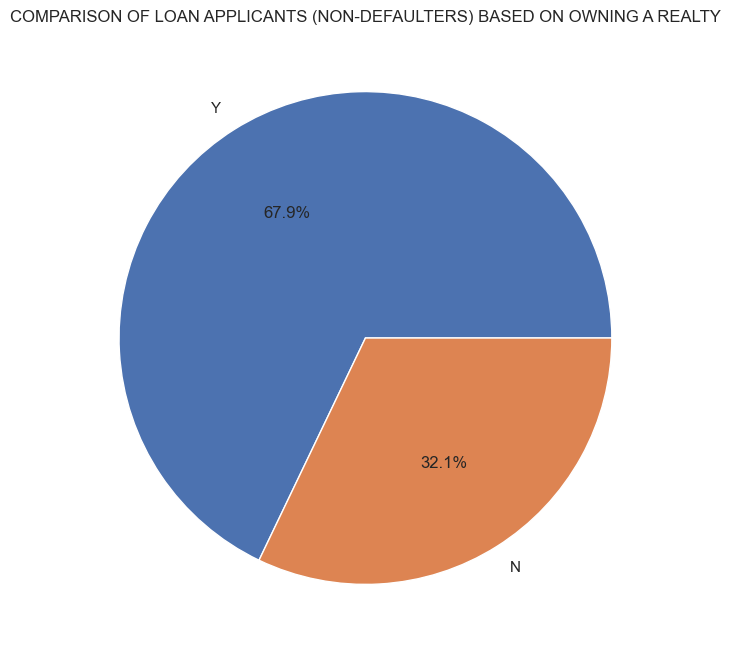

In [395]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON OWNING A REALTY",
           ylabel='', autopct='%1.1f%%')

plt.show()

## 5.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON SUITE TYPE

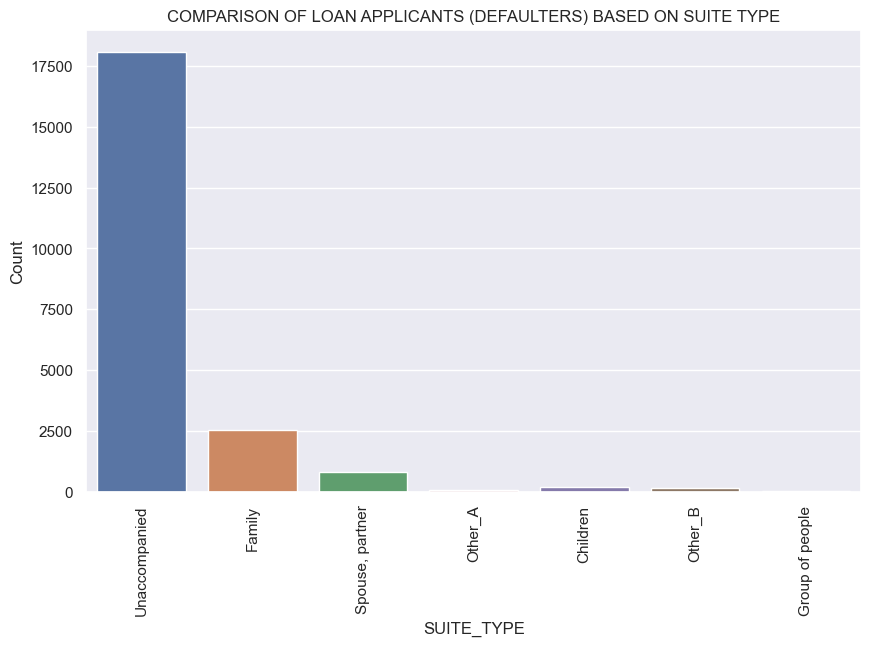

In [398]:
plt.figure(figsize = [10,6])

sns.countplot(x =Default.NAME_TYPE_SUITE )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON SUITE TYPE")

plt.xlabel("SUITE_TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

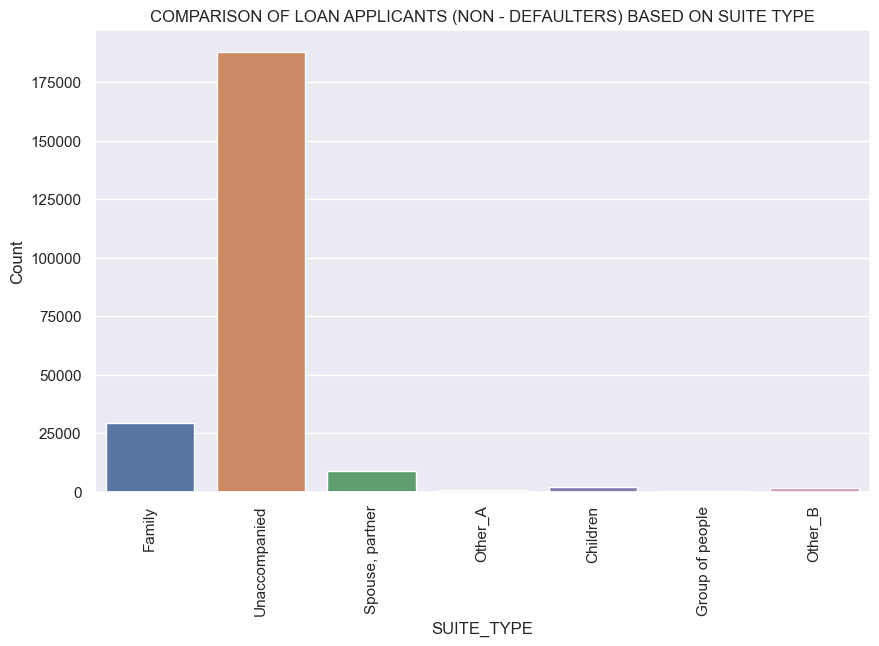

In [400]:
plt.figure(figsize = [10,6])

sns.countplot(x = Non_default.NAME_TYPE_SUITE)

plt.title("COMPARISON OF LOAN APPLICANTS (NON - DEFAULTERS) BASED ON SUITE TYPE")

plt.xlabel("SUITE_TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## 6.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON AGE GROUP

In [401]:
x = Default.AGE_GROUPS.value_counts()

y = Non_default.AGE_GROUPS.value_counts()

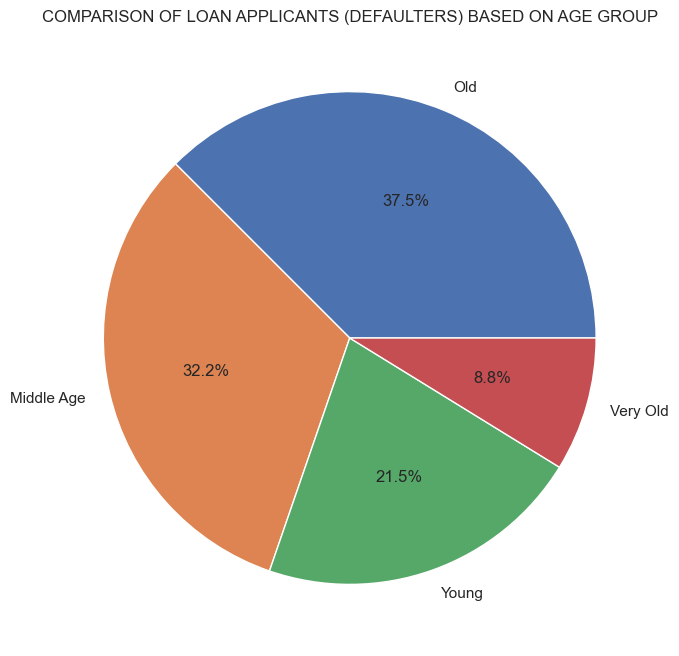

In [403]:
plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON AGE GROUP",
           ylabel='', autopct='%1.1f%%')

plt.show()

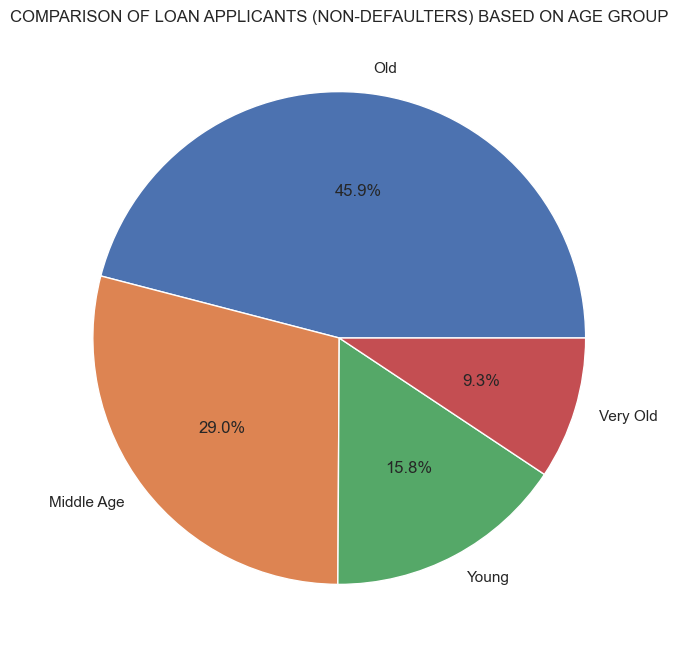

In [404]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON AGE GROUP",
           ylabel='', autopct='%1.1f%%')

plt.show()

## 7. COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON INCOME RANGE

In [405]:
x = Default.INCOME_RANGE.value_counts()

y = Non_default.INCOME_RANGE.value_counts()

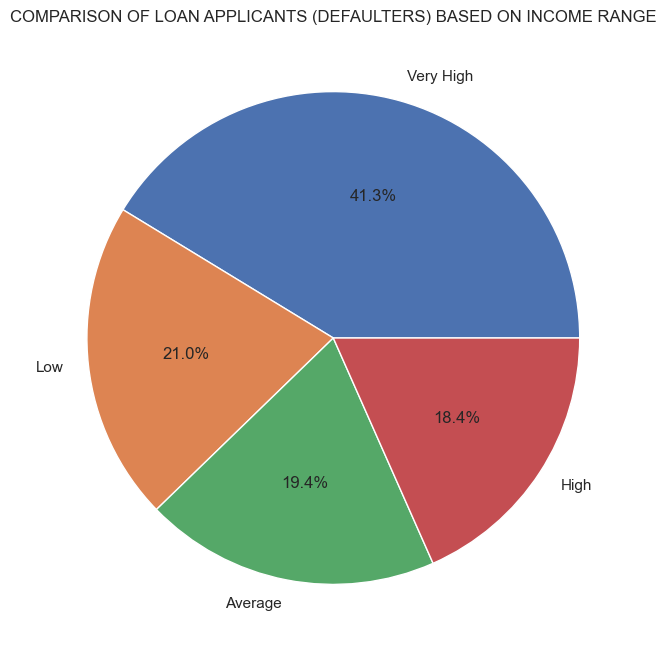

In [406]:
plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON INCOME RANGE",
           ylabel='', autopct='%1.1f%%')

plt.show()

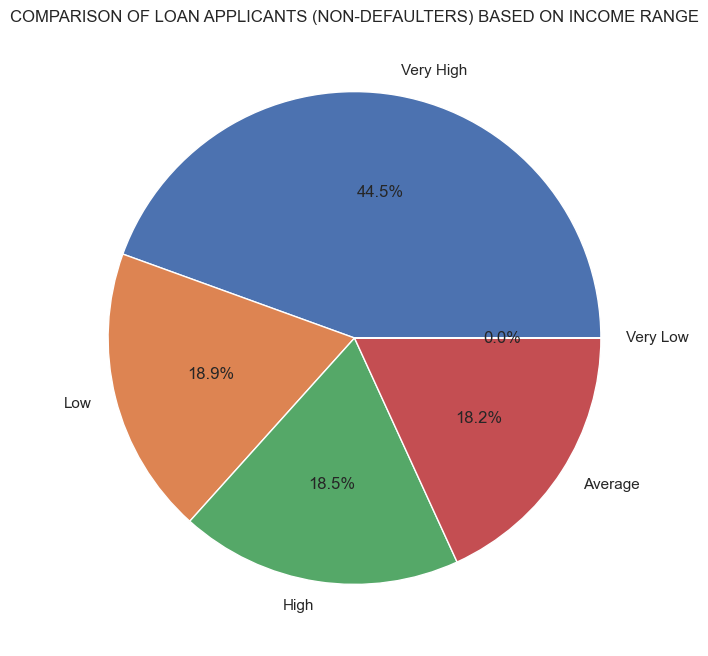

In [407]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON INCOME RANGE",
           ylabel='', autopct='%1.1f%%')

plt.show()

## 8.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON INCOME TYPE

In [408]:
x = Default.NAME_INCOME_TYPE.value_counts()

y = Non_default.NAME_INCOME_TYPE.value_counts()

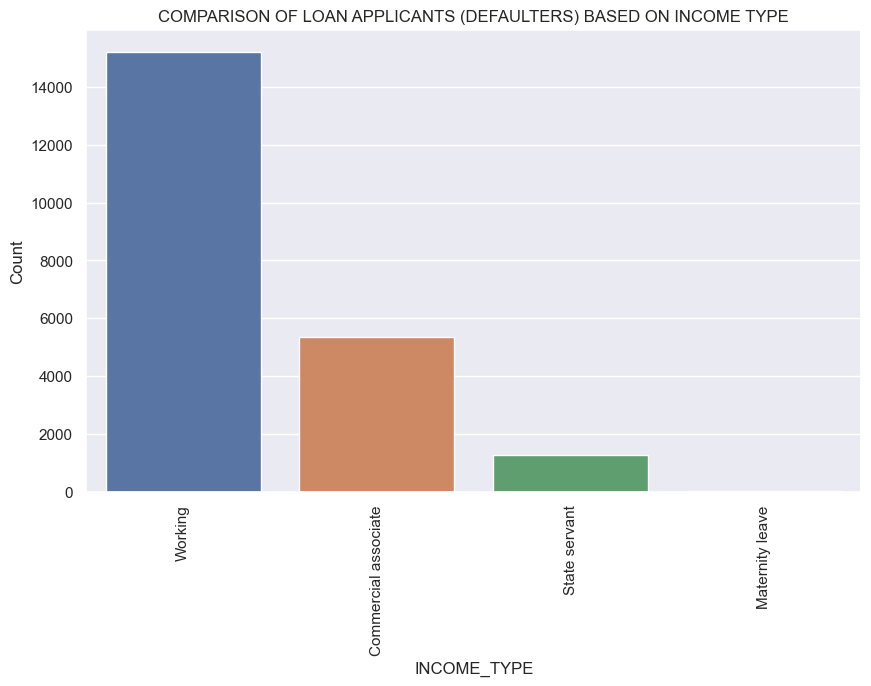

In [411]:
plt.figure(figsize = [10,6])

sns.countplot(x = Default.NAME_INCOME_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON INCOME TYPE")

plt.xlabel("INCOME_TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

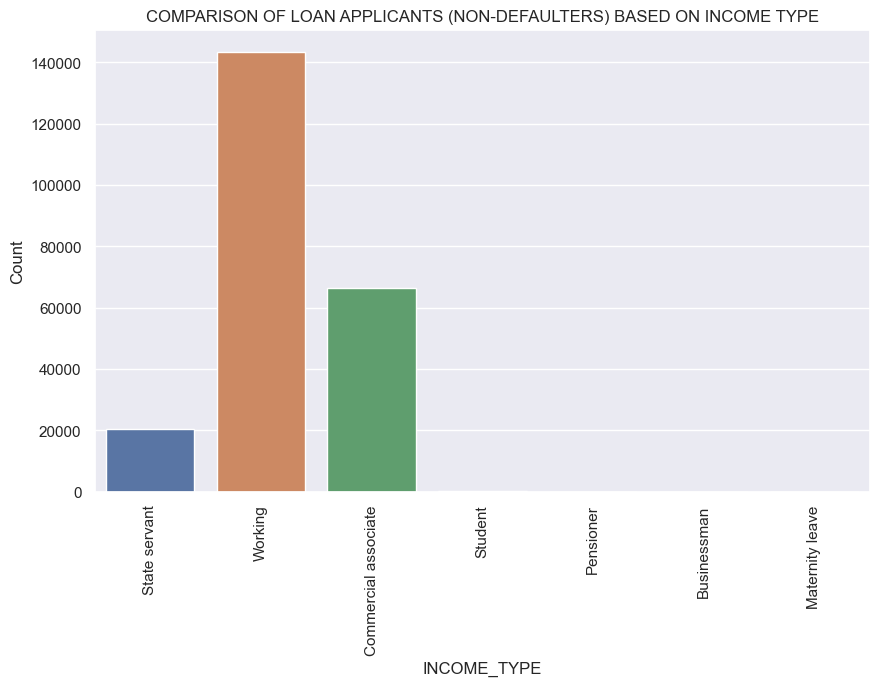

In [412]:
plt.figure(figsize = [10,6])

sns.countplot(x = Non_default.NAME_INCOME_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON INCOME TYPE")

plt.xlabel("INCOME_TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

In [413]:
x = Default.NAME_EDUCATION_TYPE.value_counts()

y = Non_default.NAME_EDUCATION_TYPE.value_counts()

## 9. COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON EDUCATION TYPE

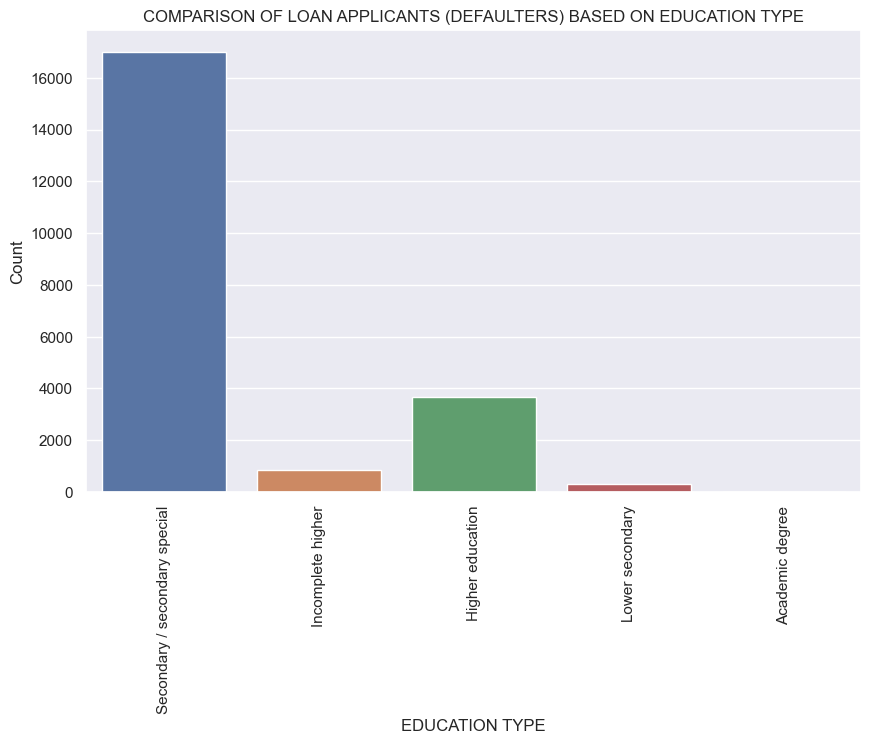

In [414]:
plt.figure(figsize = [10,6])

sns.countplot(x = Default.NAME_EDUCATION_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON EDUCATION TYPE")

plt.xlabel("EDUCATION TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

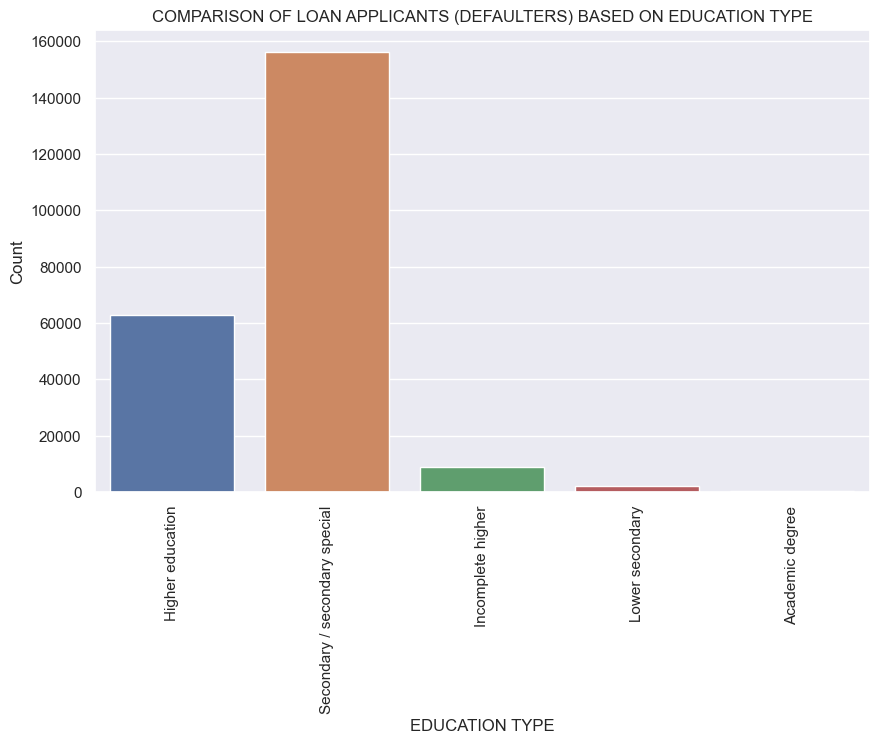

In [417]:
plt.figure(figsize = [10,6])

sns.countplot(x = Non_default.NAME_EDUCATION_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON EDUCATION TYPE")

plt.xlabel("EDUCATION TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## 10. COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON MARITAL STATUS

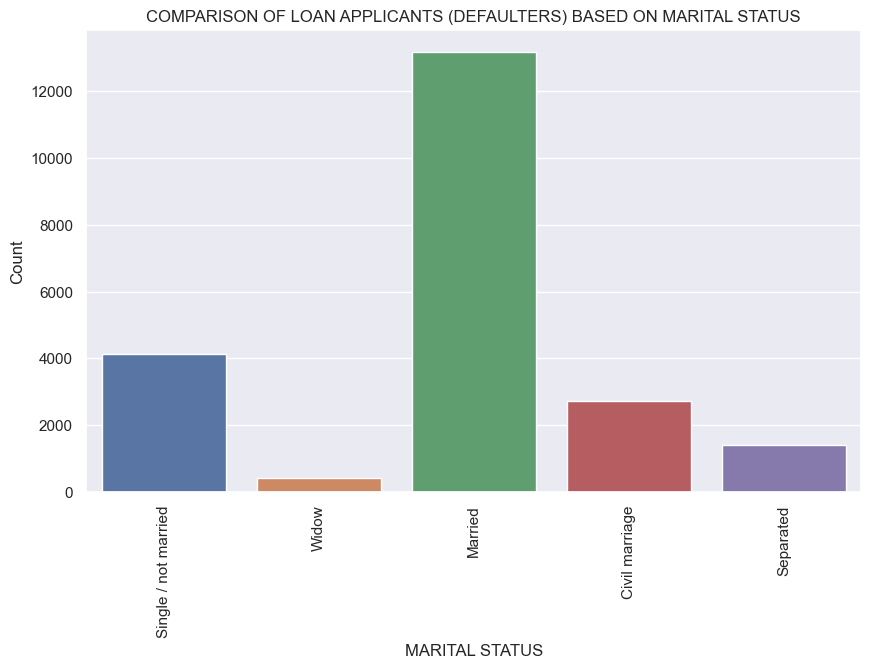

In [419]:
plt.figure(figsize = [10,6])

sns.countplot(x = Default.NAME_FAMILY_STATUS )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON MARITAL STATUS")

plt.xlabel("MARITAL STATUS")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

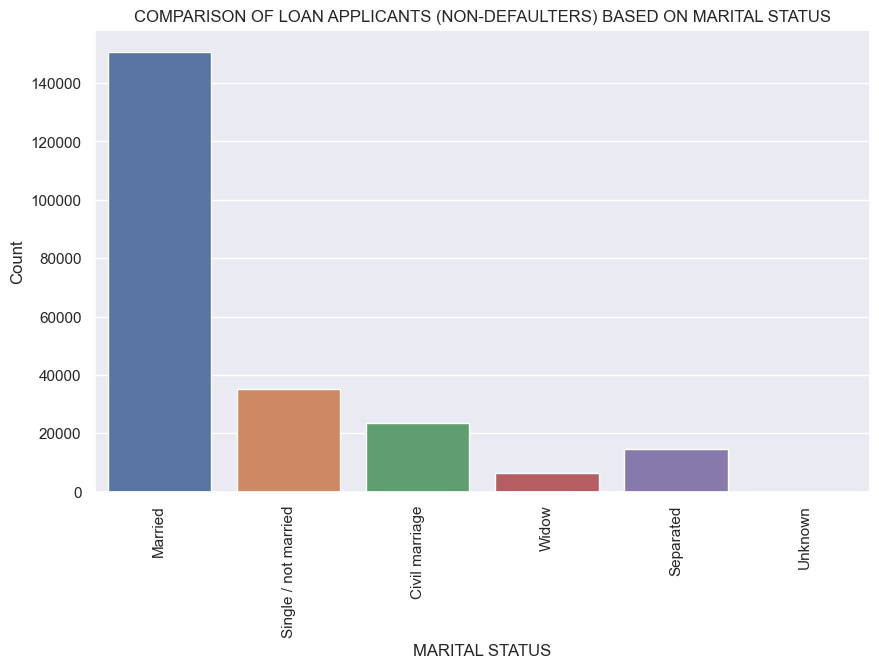

In [420]:
plt.figure(figsize = [10,6])

sns.countplot(x = Non_default.NAME_FAMILY_STATUS )

plt.title("COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON MARITAL STATUS")

plt.xlabel("MARITAL STATUS")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## 10.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON HOUSING TYPE

In [421]:
x = Default.NAME_HOUSING_TYPE.value_counts()

y = Non_default.NAME_HOUSING_TYPE.value_counts()

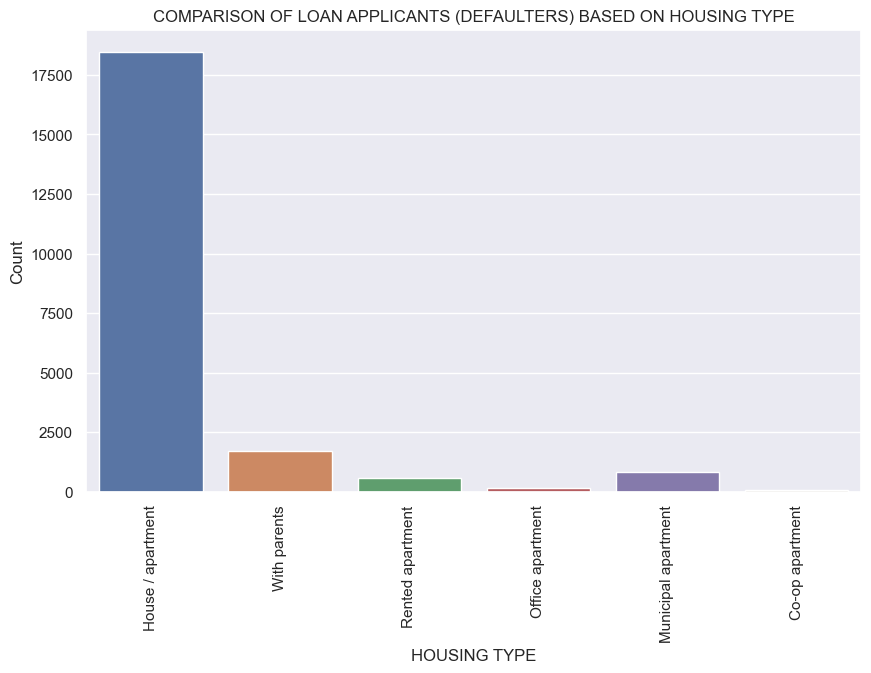

In [422]:
plt.figure(figsize = [10,6])

sns.countplot(x = Default.NAME_HOUSING_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON HOUSING TYPE")

plt.xlabel("HOUSING TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

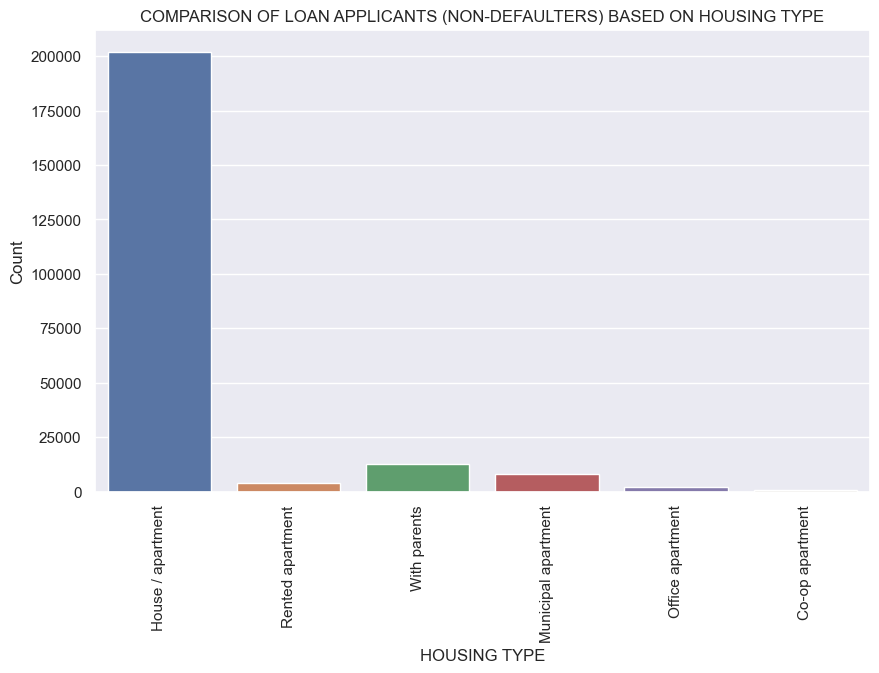

In [423]:
plt.figure(figsize = [10,6])

sns.countplot(x = Non_default.NAME_HOUSING_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON HOUSING TYPE")

plt.xlabel("HOUSING TYPE")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## 11. COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON OCCUPATION

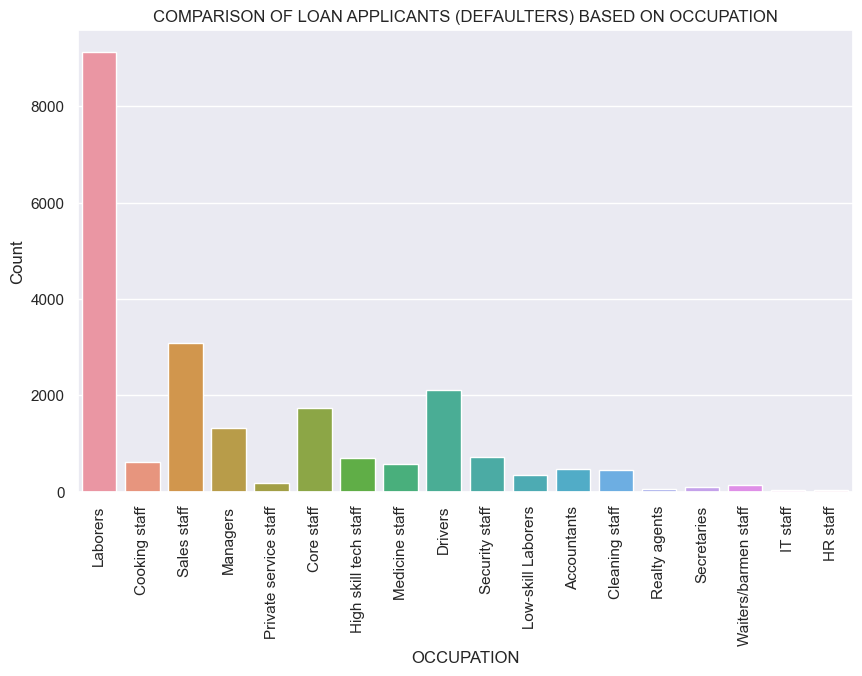

In [424]:
plt.figure(figsize = [10,6])

sns.countplot(x = Default.OCCUPATION_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON OCCUPATION")

plt.xlabel("OCCUPATION")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

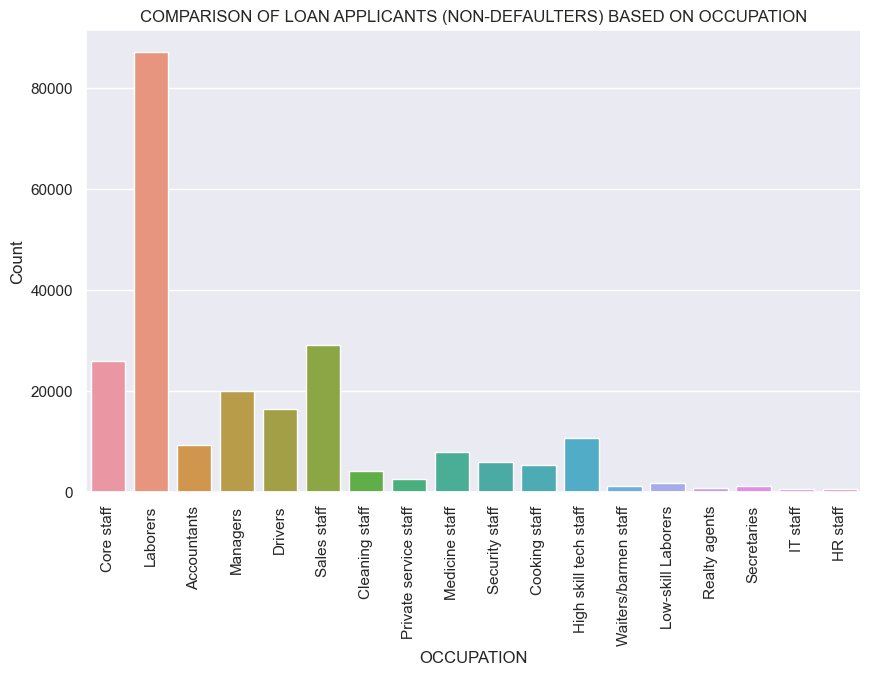

In [425]:
plt.figure(figsize = [10,6])

sns.countplot(x = Non_default.OCCUPATION_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON OCCUPATION")

plt.xlabel("OCCUPATION")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## 12. COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON REGION RATING

In [426]:
x = Default.REGION_RATING_CLIENT.value_counts()
y = Non_default.REGION_RATING_CLIENT.value_counts()

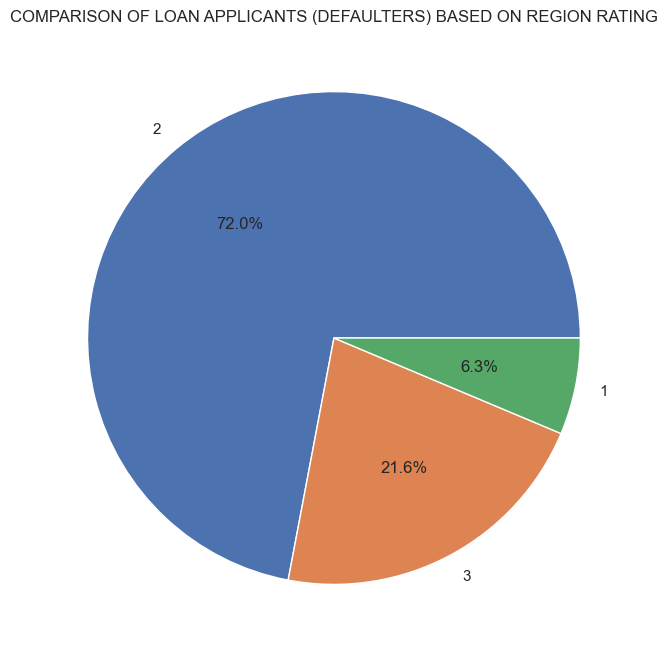

In [427]:
plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON REGION RATING",
           ylabel='', autopct='%1.1f%%')

plt.show()

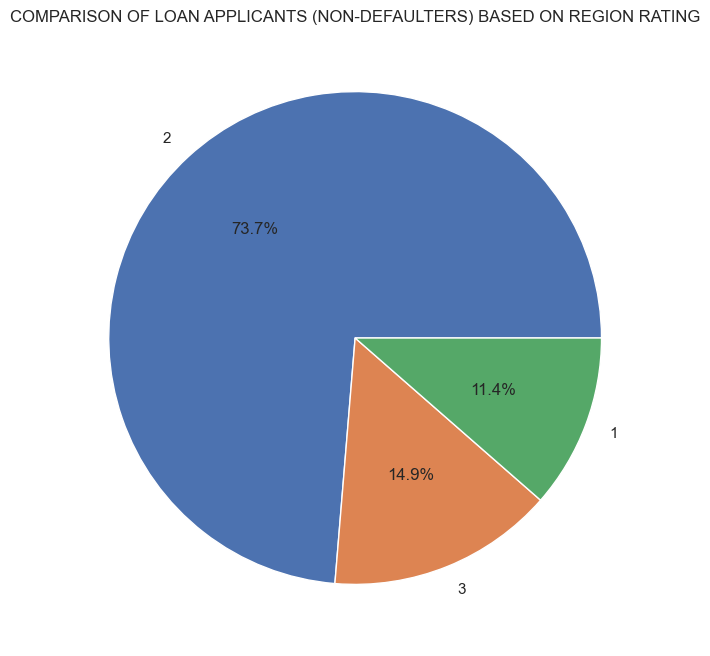

In [428]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON REGION RATING",
           ylabel='', autopct='%1.1f%%')

plt.show()

## 13.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON ORGANIZATION

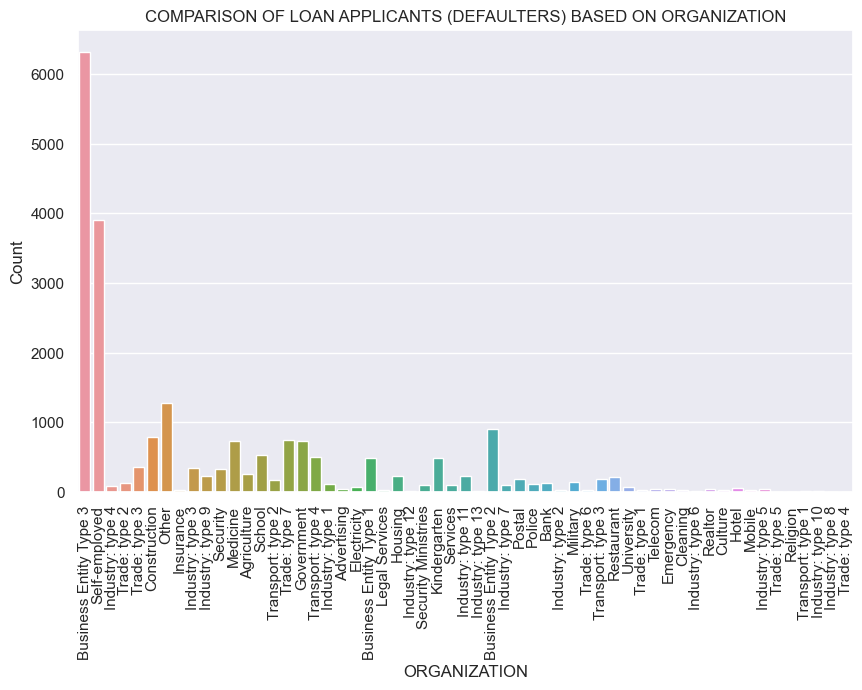

In [429]:
plt.figure(figsize = [10,6])

sns.countplot(x = Default.ORGANIZATION_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON ORGANIZATION")

plt.xlabel("ORGANIZATION")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

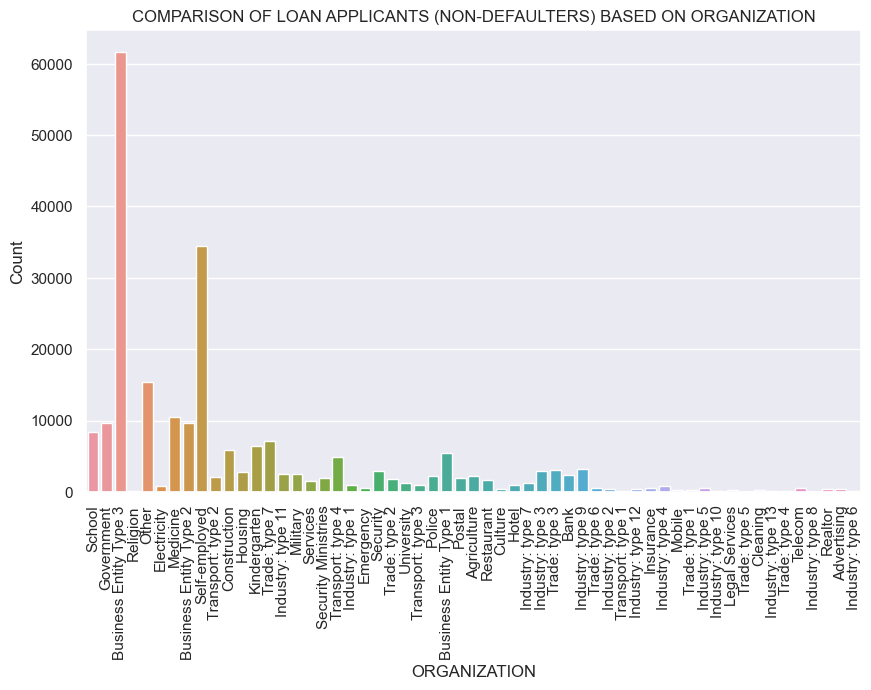

In [430]:
plt.figure(figsize = [10,6])

sns.countplot(x = Non_default.ORGANIZATION_TYPE )

plt.title("COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON ORGANIZATION")

plt.xlabel("ORGANIZATION")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## 14.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON REGIONAL POPULATION

In [431]:
x = Default.REGION_POPULATION_TYPE.value_counts()
y = Non_default.REGION_POPULATION_TYPE.value_counts()

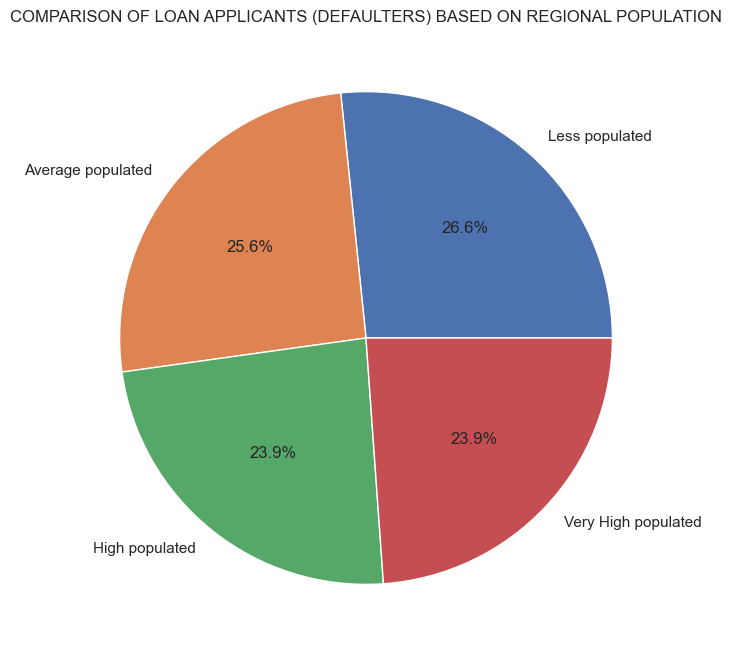

In [432]:
plt.figure(figsize=[16,8])
x.plot.pie(title="COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON REGIONAL POPULATION",
           ylabel='', autopct='%1.1f%%')

plt.show()

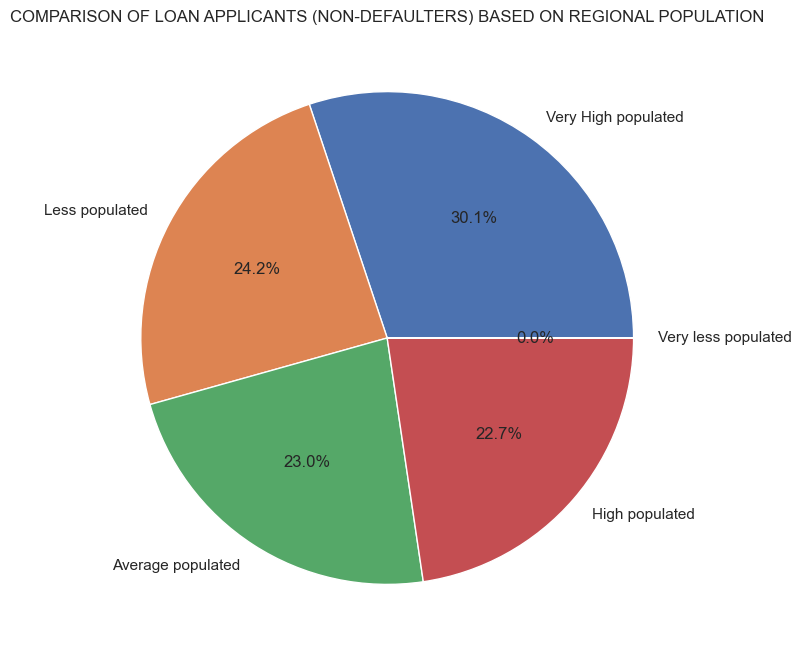

In [433]:
plt.figure(figsize=[16,8])
y.plot.pie(title="COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON REGIONAL POPULATION",
           ylabel='', autopct='%1.1f%%')

plt.show()

## 15.COMPARISON OF LOAN APPLICANTS (DEFAULTERS & NON-DEFAULTERS) BASED ON FAMILY SIZE


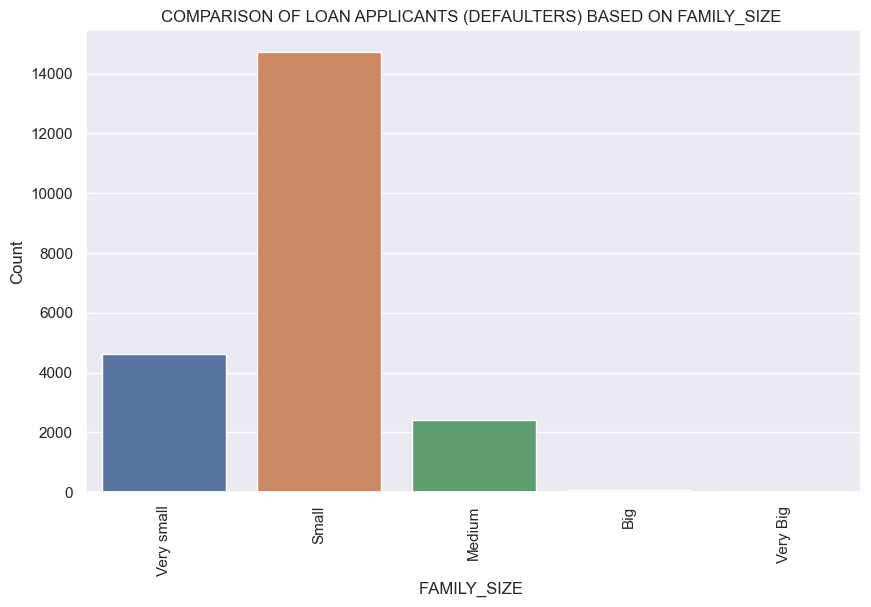

In [435]:
plt.figure(figsize = [10,6])

sns.countplot(x = Default.FAMILY_SIZE )

plt.title("COMPARISON OF LOAN APPLICANTS (DEFAULTERS) BASED ON FAMILY_SIZE ")

plt.xlabel("FAMILY_SIZE ")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

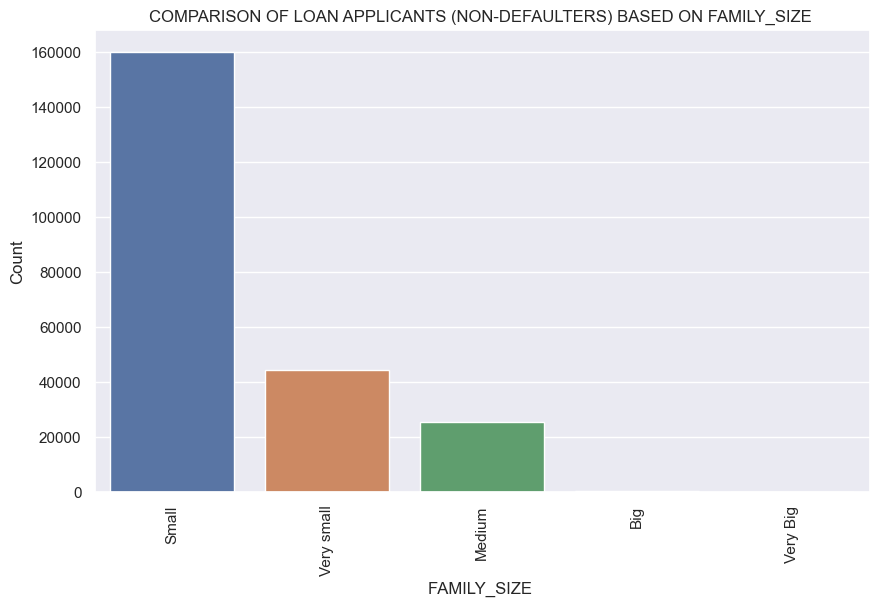

In [434]:
plt.figure(figsize = [10,6])

sns.countplot(x = Non_default.FAMILY_SIZE )

plt.title("COMPARISON OF LOAN APPLICANTS (NON-DEFAULTERS) BASED ON FAMILY_SIZE ")

plt.xlabel("FAMILY_SIZE ")

plt.xticks(rotation =90)

plt.ylabel("Count")


plt.show()

## Bi-VARIATE ANALYSIS:

## CATEGORICAL vs CATEGORICAL ANALYSIS

## 1. DEFAULTERS & NON-DEFAULTERS BASED ON LOAN TYPE

In [444]:
x_sum = Non_default.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().sum()

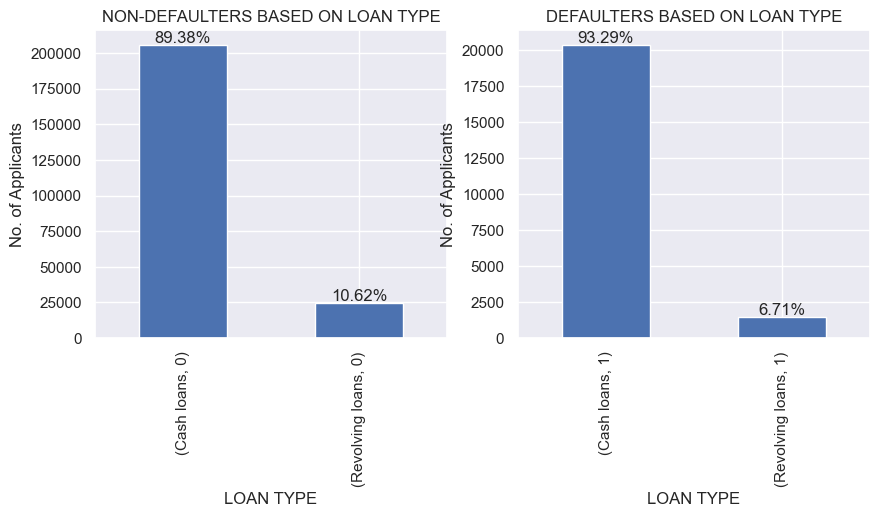

In [452]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON LOAN TYPE")

plt.xlabel("LOAN TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON LOAN TYPE")

plt.xlabel("LOAN TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show()


## 2. DEFAULTERS & NON-DEFAULTERS BASED ON SUITE TYPE

In [446]:
x_sum = Non_default.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().sum()

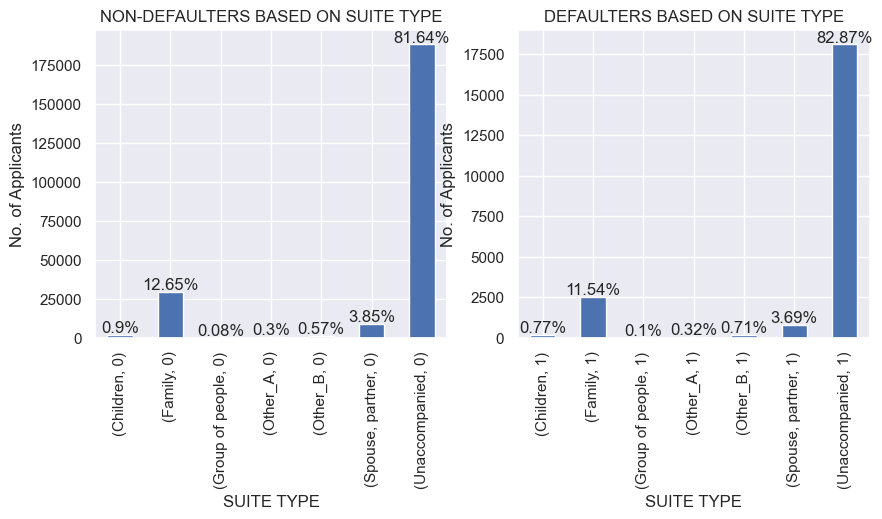

In [453]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON SUITE TYPE")

plt.xlabel("SUITE TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['NAME_TYPE_SUITE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON SUITE TYPE")

plt.xlabel("SUITE TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show()

## 3. DEFAULTERS & NON-DEFAULTERS BASED ON SOURCE OF INCOME

In [ ]:
x_sum = Non_default.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().sum()

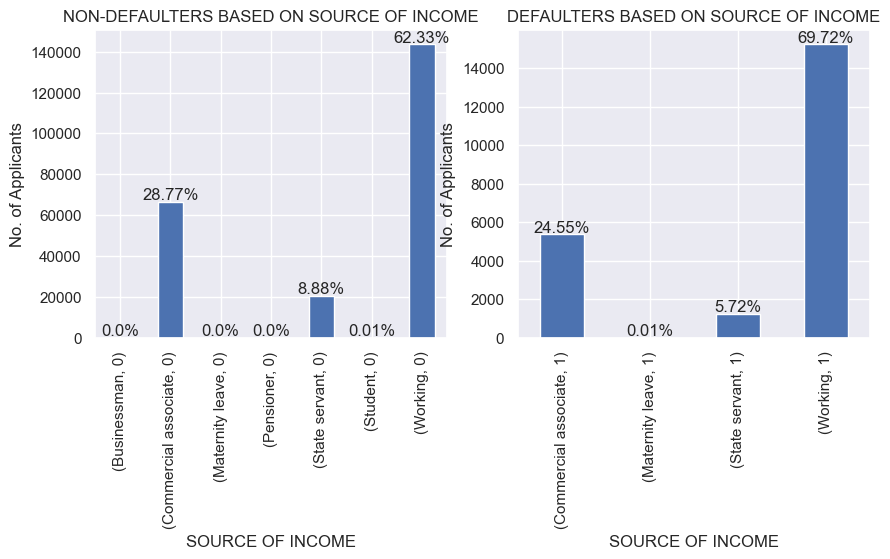

In [454]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON SOURCE OF INCOME")

plt.xlabel("SOURCE OF INCOME")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON SOURCE OF INCOME")

plt.xlabel("SOURCE OF INCOME")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show()

## 4. DEFAULTERS & NON-DEFAULTERS BASED ON EDUCATION

In [ ]:
x_sum = Non_default.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().sum()

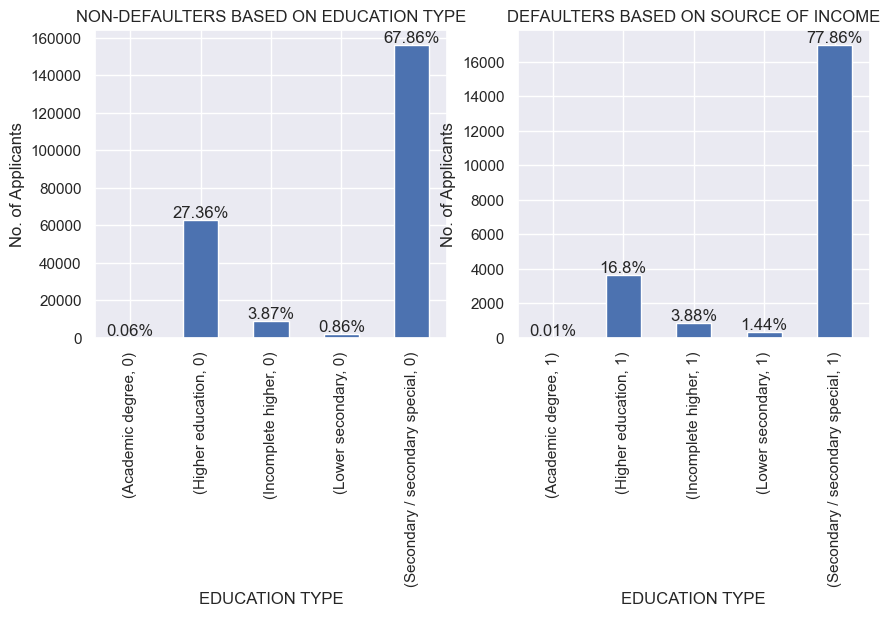

In [455]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON EDUCATION TYPE")

plt.xlabel("EDUCATION TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON SOURCE OF INCOME")

plt.xlabel("EDUCATION TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show()

## 5. DEFAULTERS & NON-DEFAULTERS BASED ON MARITAL STATUS

In [ ]:
x_sum = Non_default.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().sum()

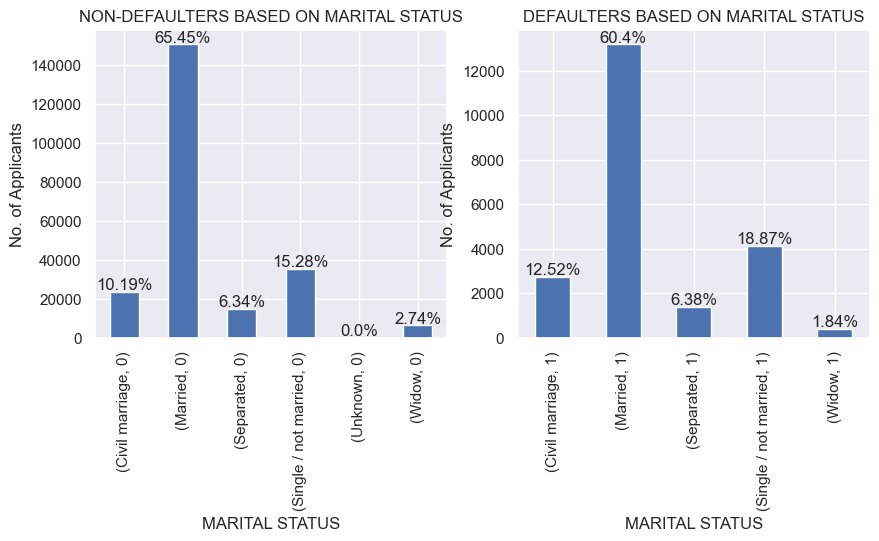

In [456]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON MARITAL STATUS")

plt.xlabel("MARITAL STATUS")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON MARITAL STATUS")

plt.xlabel("MARITAL STATUS")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show()

## 6.DEFAULTERS & NON-DEFAULTERS BASED ON HOUSING TYPE

In [457]:
x_sum = Non_default.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().sum()

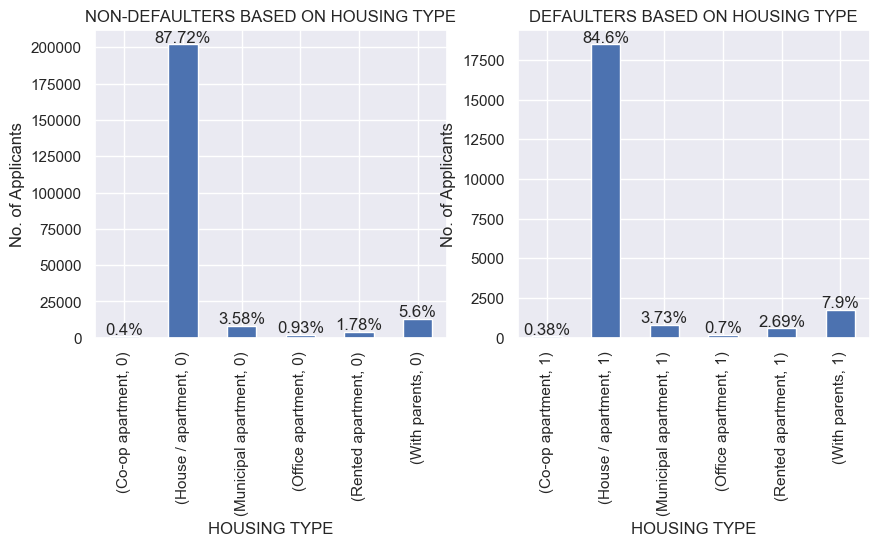

In [458]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON HOUSING TYPE")

plt.xlabel("HOUSING TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['NAME_HOUSING_TYPE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON HOUSING TYPE")

plt.xlabel("HOUSING TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show()

## 7. DEFAULTERS & NON-DEFAULTERS BASED ON AGE GROUP 

In [ ]:
x_sum = Non_default.groupby(['AGE_GROUPS'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['AGE_GROUPS'])['TARGET'].value_counts().sum()

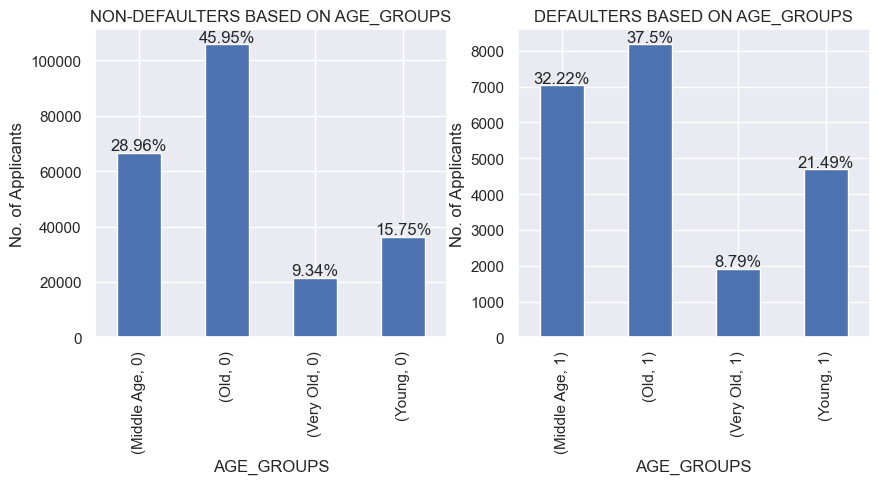

In [459]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['AGE_GROUPS'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON AGE_GROUPS")

plt.xlabel("AGE_GROUPS")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['AGE_GROUPS'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON AGE_GROUPS")

plt.xlabel("AGE_GROUPS")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show() 

## 8. DEFAULTERS & NON-DEFAULTERS BASED ON INCOME RANGE

In [ ]:
x_sum = Non_default.groupby(['INCOME_RANGE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['INCOME_RANGE'])['TARGET'].value_counts().sum()

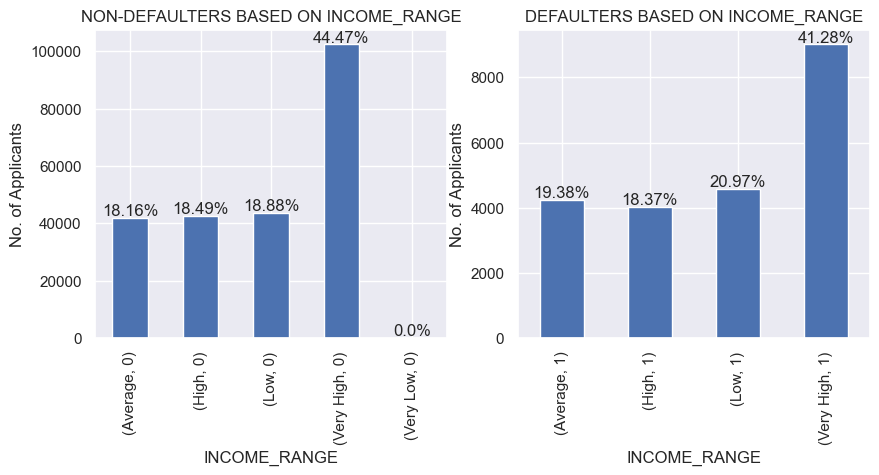

In [460]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['INCOME_RANGE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON INCOME_RANGE")

plt.xlabel("INCOME_RANGE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['INCOME_RANGE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON INCOME_RANGE")

plt.xlabel("INCOME_RANGE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show() 

## 9. DEFAULTERS & NON-DEFAULTERS BASED ON REGIONAL POPULATION

In [ ]:
x_sum = Non_default.groupby(['REGION_POPULATION_TYPE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['REGION_POPULATION_TYPE'])['TARGET'].value_counts().sum()

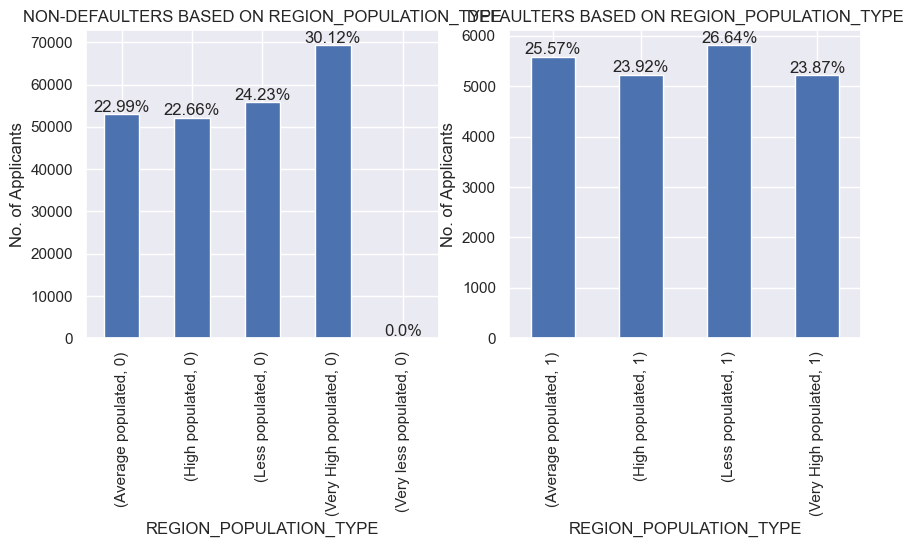

In [461]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['REGION_POPULATION_TYPE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON REGION_POPULATION_TYPE")

plt.xlabel("REGION_POPULATION_TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['REGION_POPULATION_TYPE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON REGION_POPULATION_TYPE")

plt.xlabel("REGION_POPULATION_TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show() 

## 10. DEFAULTERS & NON-DEFAULTERS BASED ON FAMILY SIZE

In [ ]:
x_sum = Non_default.groupby(['FAMILY_SIZE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['FAMILY_SIZE'])['TARGET'].value_counts().sum()

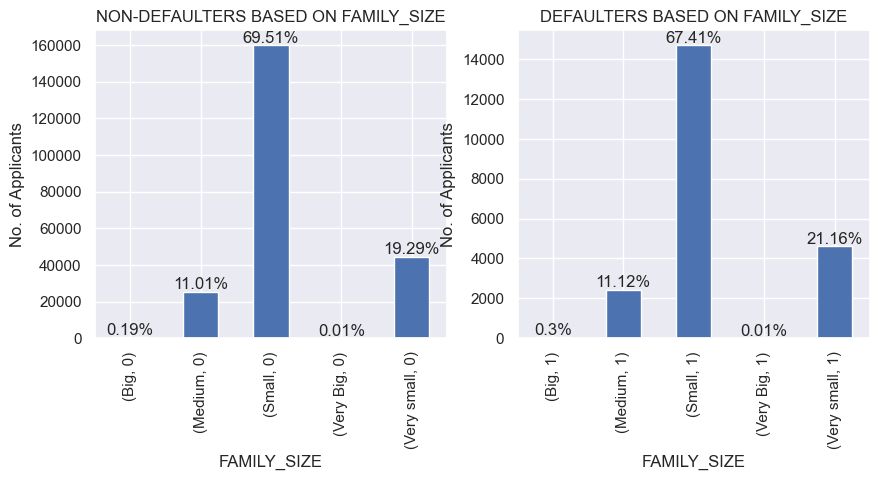

In [462]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['FAMILY_SIZE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON FAMILY_SIZE")

plt.xlabel("FAMILY_SIZE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['FAMILY_SIZE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON FAMILY_SIZE")

plt.xlabel("FAMILY_SIZE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show() 


## 11.DEFAULTERS & NON-DEFAULTERS BASED ON OCCUPATION TYPE

In [ ]:
x_sum = Non_default.groupby(['OCCUPATION_TYPE'])['TARGET'].value_counts().sum()
y_sum = Default.groupby(['OCCUPATION_TYPE'])['TARGET'].value_counts().sum()

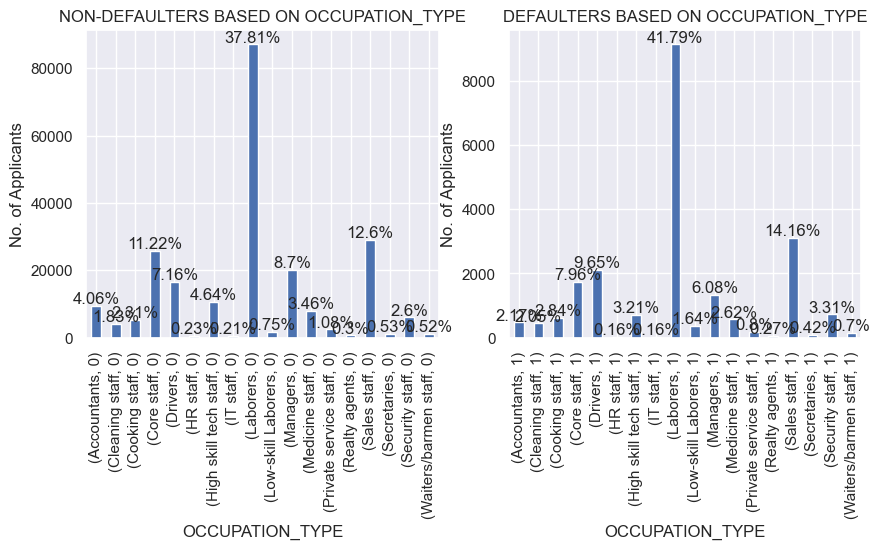

In [463]:
plt.figure(figsize =[10,4])

plt.subplot(1,2,1)

G1 = Non_default.groupby(['OCCUPATION_TYPE'])['TARGET'].value_counts().plot.bar(title = "NON-DEFAULTERS BASED ON OCCUPATION_TYPE")

plt.xlabel("OCCUPATION_TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G1.patches:
    G1.annotate(f'{str(round((p.get_height()/x_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.subplot(1,2,2)

G2 = Default.groupby(['OCCUPATION_TYPE'])['TARGET'].value_counts().plot.bar(title = "DEFAULTERS BASED ON OCCUPATION_TYPE")

plt.xlabel("OCCUPATION_TYPE")

plt.xticks(rotation = 90)

plt.ylabel("No. of Applicants")

for p in G2.patches:
    G2.annotate(f'{str(round((p.get_height()/y_sum)*100, 2)) + "%"}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=[0,5],
                   textcoords="offset points")

plt.show() 

## CATEGORICAL vs NUMERICAL ANALYSIS

## 1.COMPARISON OF DEFAULTERS & NON-DEFAULTERS BASED ON EDUCATION & AMOUNT CREDIT

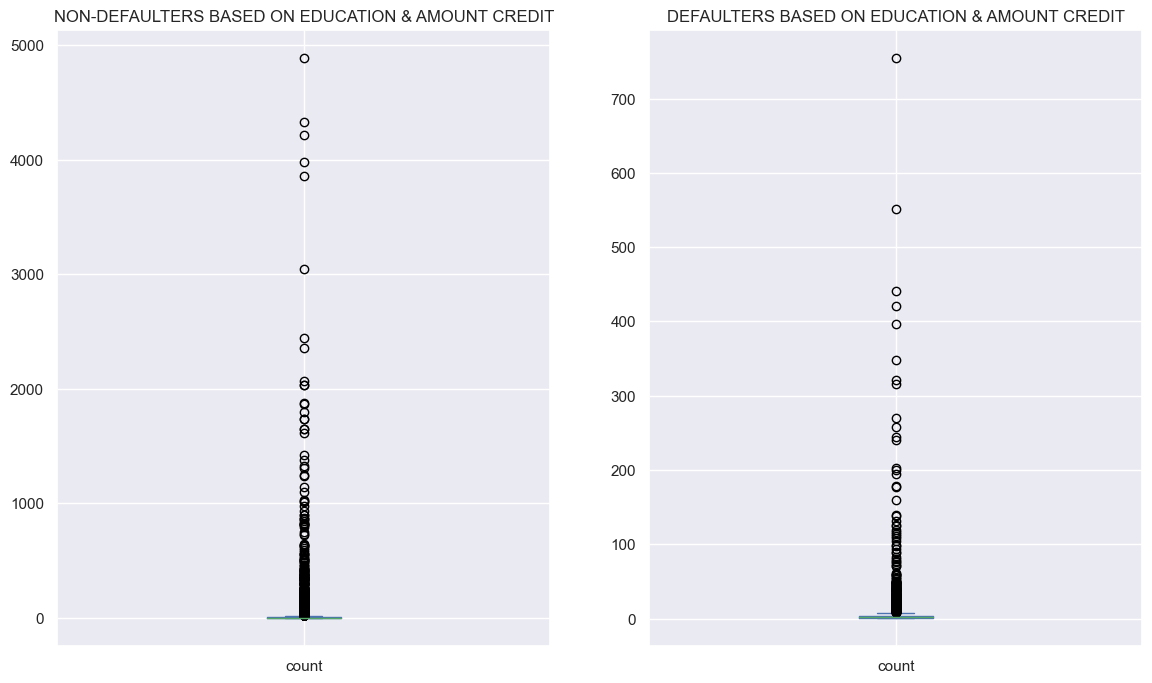

In [467]:
plt.figure(figsize=[14,8])
plt.subplot(1,2,1)
Non_default.groupby(["NAME_EDUCATION_TYPE"])["AMT_CREDIT"].value_counts().plot.box(title="NON-DEFAULTERS BASED ON EDUCATION & AMOUNT CREDIT")
plt.subplot(1,2,2)
Default.groupby(["NAME_EDUCATION_TYPE"])["AMT_CREDIT"].value_counts().plot.box(title="DEFAULTERS BASED ON EDUCATION & AMOUNT CREDIT")
plt.show()

## 2. COMPARISON OF DEFAULTERS & NON-DEFAULTERS BASED ON INCOME_RANGE & AMOUNT CREDIT

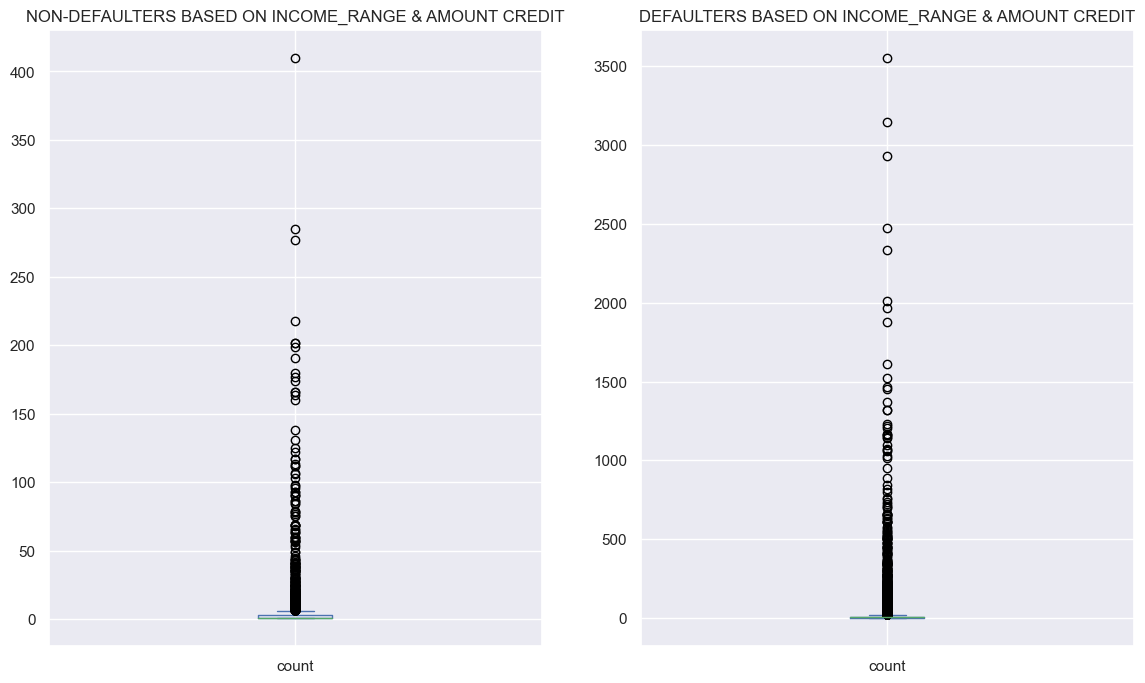

In [469]:
plt.figure(figsize=[14,8])
plt.subplot(1,2,1)
Default.groupby(["INCOME_RANGE"])["AMT_CREDIT"].value_counts().plot.box(title="NON-DEFAULTERS BASED ON INCOME_RANGE & AMOUNT CREDIT")
plt.subplot(1,2,2)
Non_default.groupby(["INCOME_RANGE"])["AMT_CREDIT"].value_counts().plot.box(title="DEFAULTERS BASED ON INCOME_RANGE & AMOUNT CREDIT")
plt.show()

## PIVOT TABLES :

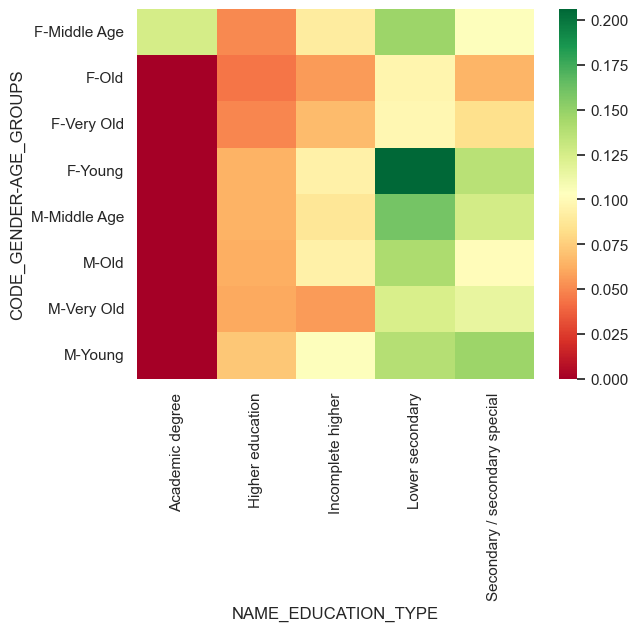

In [473]:
pivot1 = pd.pivot_table(app_data1, values = 'TARGET', index = ['CODE_GENDER','AGE_GROUPS'], columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

sns.heatmap(pivot1, cmap="RdYlGn")
plt.show()

## From the above heatmap, we can depict that people who have completed Academic degree are generally less likely to default irrespective of the GENDER & INCOME RANGE.

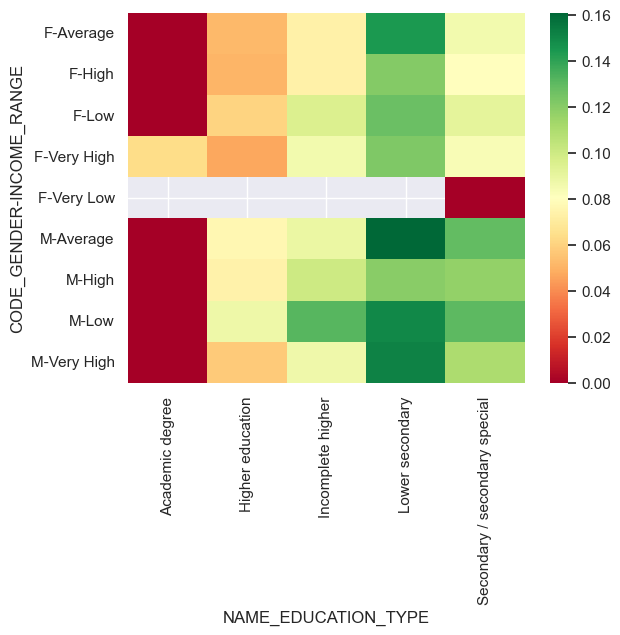

In [475]:
pivot2 = pd.pivot_table(app_data1, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
sns.heatmap(pivot2, cmap="RdYlGn")
plt.show()

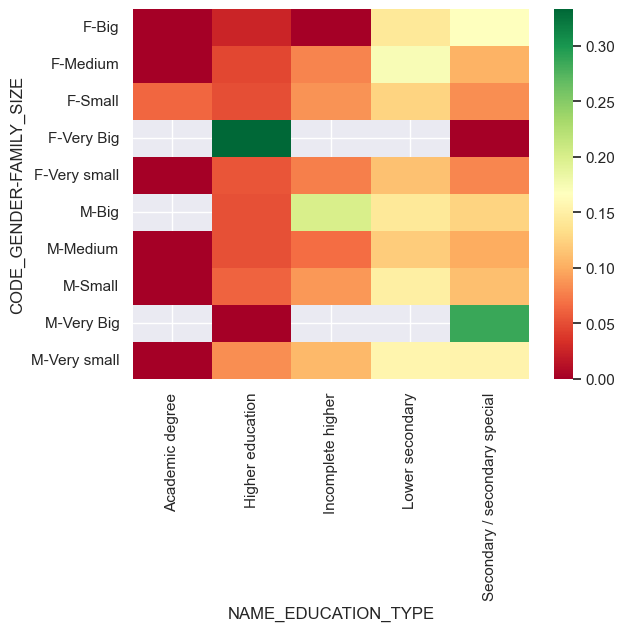

In [476]:
pivot3 = pd.pivot_table(app_data1, values='TARGET', index=['CODE_GENDER','FAMILY_SIZE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
sns.heatmap(pivot3, cmap="RdYlGn")
plt.show()

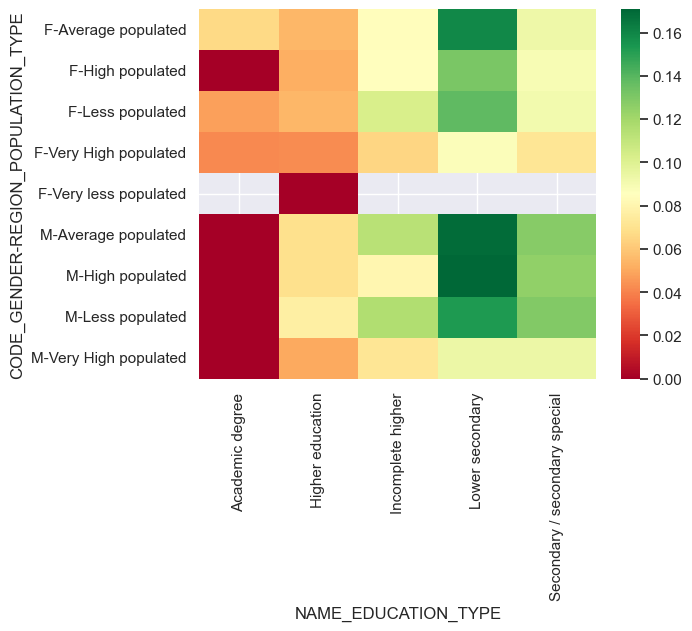

In [478]:
pivot4 = pd.pivot_table(app_data1, values='TARGET', index=['CODE_GENDER','REGION_POPULATION_TYPE'],columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)
sns.heatmap(pivot4, cmap="RdYlGn")
plt.show()

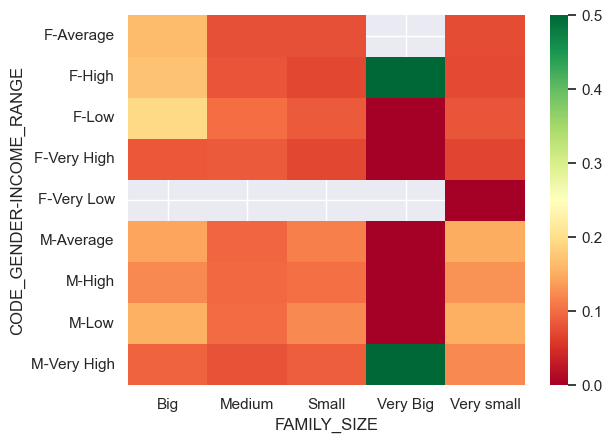

In [479]:
pivot5 = pd.pivot_table(app_data1, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],columns=['FAMILY_SIZE'], aggfunc=np.mean)
sns.heatmap(pivot5, cmap="RdYlGn")
plt.show()

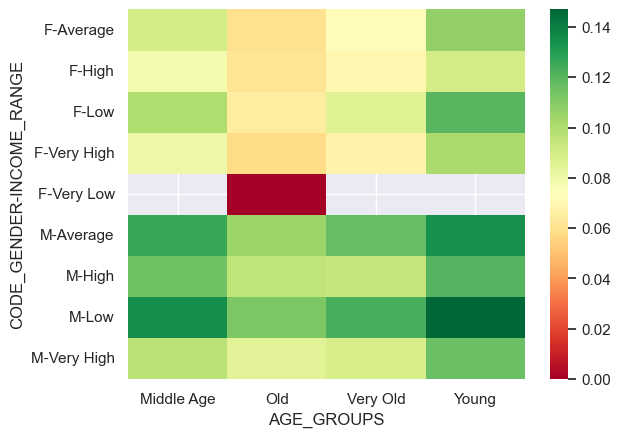

In [480]:
pivot6 = pd.pivot_table(app_data1, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],columns=['AGE_GROUPS'], aggfunc=np.mean)
sns.heatmap(pivot6, cmap="RdYlGn")
plt.show()

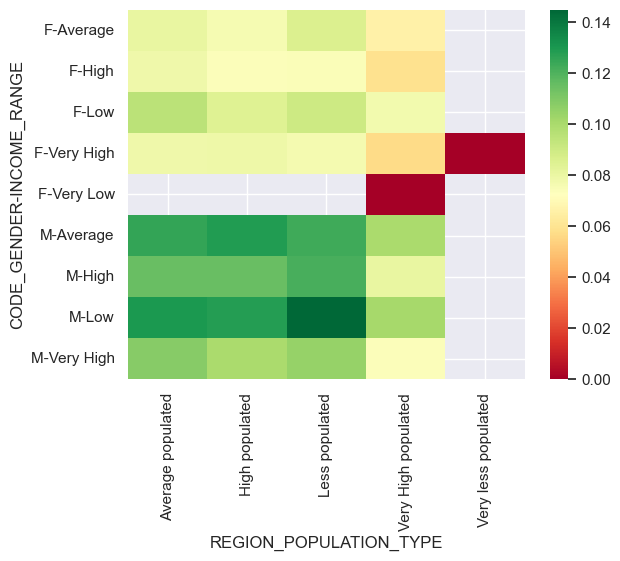

In [482]:
pivot7 = pd.pivot_table(app_data1, values='TARGET', index=['CODE_GENDER','INCOME_RANGE'],columns=['REGION_POPULATION_TYPE'], aggfunc=np.mean)
sns.heatmap(pivot7, cmap="RdYlGn")
plt.show()

## MULTI-VARIATE ANALYSIS:

## COMBINING PREVIOUS APPLICATION DATA & APPLICATION DATA

In [509]:
combine_data = pd.concat([app_data1, pre_app1], axis=1, join='inner')


In [510]:
combine_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   DAYS_EMPLOYED OCCUPATION_TYPE  REGION_RATING_CLIENT  \
0            637        Laborers                     2   
1           1188      Core staff                     1   
2            225        Laborers                     2   
3           3039        Laborers                     2   
4           3038      Core staff                     2   

   REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                            2  Business Entity Type 3   
1                            1                  School   
2                            2              Government   
3                            2  Business Entity Type 3   
4                            2                Religion   

   DAYS_LAST_PHONE_CHANGE AGE_GROUPS INCOME_RANGE REGION_POPULATION_TYPE  \
0                  1134.0      Young         High      Average populated   
1                   828.0        Old    Very High         Less populated   
2                   815.0        Old          Low      Average populated   
3                   617.0        Old      Average         Less populated   
4                  1106.0        Old      Average    Very High populated   

  FAMILY_SIZE  SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0  Very small     2030495      271877     Consumer loans     1730.430   
1       Small     2802425      108129         Cash loans    25188.615   
2  Very small     2523466      122040         Cash loans    15060.735   
3       Small     2819243      176158         Cash loans    47041.335   
4  Very small     1784265      202054         Cash loans    31924.395   

   AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0          17145.0     17145.0          17145.0                   SATURDAY   
1         607500.0    679671.0         607500.0                   THURSDAY   
2         112500.0    136444.5         112500.0                    TUESDAY   
3         450000.0    470790.0         450000.0                     MONDAY   
4         337500.0    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7    

**Creating two dataframes based on Target Variable (1 and 0)**

In [512]:
Non_df = combine_data.loc[combine_data.TARGET==0]
df = combine_data.loc[combine_data.TARGET==1]

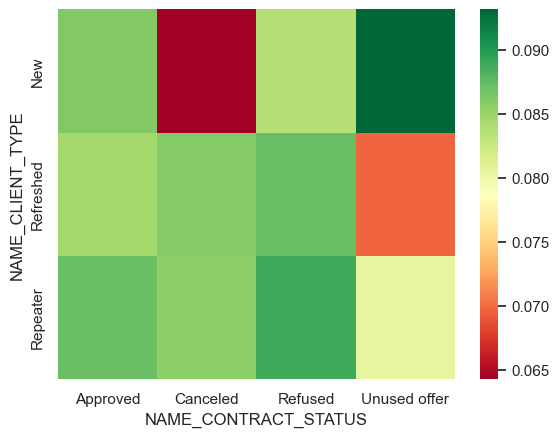

In [513]:
C1 = pd.pivot_table(combine_data, values='TARGET', index=['NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(C1, cmap="RdYlGn")
plt.show()                                                                                                                                                                                           

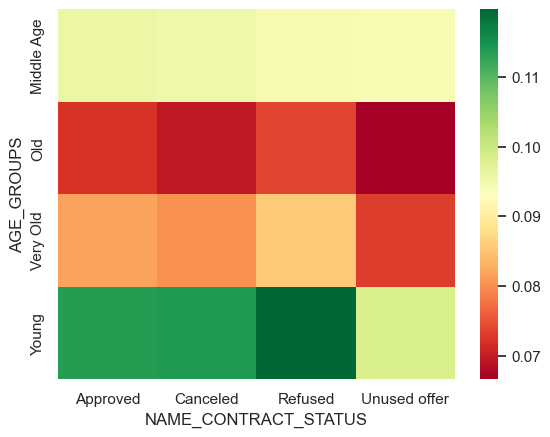

In [514]:
C2 = pd.pivot_table(combine_data, values='TARGET', index=['AGE_GROUPS'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(C2, cmap="RdYlGn")
plt.show()

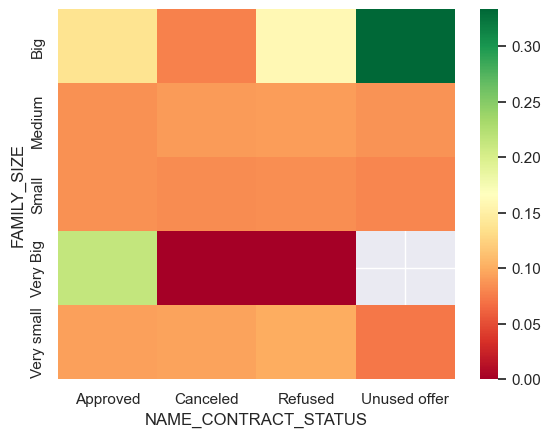

In [515]:
C3 = pd.pivot_table(combine_data, values='TARGET', index=['FAMILY_SIZE'],columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)
sns.heatmap(C3, cmap="RdYlGn")
plt.show()